# Arno's Engram 2 keyboard layout

Engram 2 is a key layout optimized for comfortable and efficient touch typing in English 
created by [Arno Klein](https://binarybottle.com), 
with [open source code](https://github.com/binarybottle/engram) to create other optimized key layouts.
You can install the Engram layout on [Windows, macOS, and Linux](https://keyman.com/keyboards/engram)
or [try it out online](https://keymanweb.com/#en,Keyboard_engram).
An article is under review (see the [preprint](https://www.preprints.org/manuscript/202103.0287/v1)).

Letters are optimally arranged according to ergonomics factors that promote reduction of lateral finger movements and more efficient typing of high-frequency letter pairs: 

             Y  P  O  X           F  C  M  W  Q
             H  I  E  A           T  S  N  R  Z
             G  K  J  U           D  V  B  L

The most common punctuation marks are logically grouped together in the middle columns and numbers are paired with mathematical and logic symbols (shown as pairs of default and Shift-key-accessed characters):

         [{ 1| 2= 3~ 4+  5<  6>  7^ 8& 9% 0* ]} /\
            yY pP oO xX  ‘(  “)  fF cC mM wW qQ #$ @`
            hH iI eE aA  ,;  .:  tT sS nN rR zZ
            gG kK jJ uU  -_  ?!  dD vV bB lL 

See below for a full description and comparisons with other key layouts.

### Standard diagonal keyboard (default and Shift-key layers)
![Standard keyboard](https://github.com/binarybottle/engram/blob/master/assets/engram-800px.png?raw=true)

### "Ergonomic" orthonormal keyboard (default and Shift-key layers)
![Orthonormal keyboard](https://github.com/binarybottle/engram/blob/master/assets/engram-ergo-squeezed-800px.png?raw=true)

(c) 2021 Arno Klein, MIT license

----------------

# Contents
1. [Why a new keyboard layout?](#why)
2. [How does Engram compare with other key layouts?](#scores)
3. [Guiding criteria](#criteria)
4. [Summary of steps and results](#summary)
5. Setup:
    - [Dependencies and functions](#import)
    - [Speed matrix](#speed)
    - [Strength matrix](#strength)
    - [Flow matrix](#flow)
6. Steps:
    - [Step 1: Define the shape of the key layout to minimize lateral finger movements](#step1)
    - [Step 2: Arrange the most frequent letters based on comfort and bigram frequencies](#step2)
    - [Step 3: Optimize assignment of the remaining letters](#step3)
    - [Step 4: Stability tests](#step4)
    - [Step 5: Arrange non-letter characters in easy-to-remember places](#step5)

## Why a new keyboard layout? <a name="why">

**Personal history** <br>
In the future, I hope to include an engaging rationale for why I took on this challenge.
Suffice to say I love solving problems, and I have battled repetitive strain injury 
ever since I worked on an old DEC workstation at the MIT Media Lab while composing 
my thesis back in the 1990s.
I have experimented with a wide variety of human interface technologies over the years --
voice dictation, one-handed keyboard, keyless keyboard, foot mouse, and ergonomic keyboards 
like the Kinesis Advantage and [Ergodox](https://configure.ergodox-ez.com/ergodox-ez/layouts/APXBR/latest/0) keyboards with different key switches.
While these technologies can significantly improve comfort and reduce strain, 
an optimized key layout can only help when typing on ergonomic or standard keyboards. 

I have used different key layouts (Qwerty, Dvorak, Colemak, etc.)
for communications and for writing and programming projects,
and have primarily relied on Colemak for the last 10 years. 
**I find that most to all of these key layouts:**

- Demand too much strain on tendons
    - *strenuous lateral extension of the index and little fingers*
- Ignore the ergonomics of the human hand
    - *different finger strengths*
    - *different finger lengths*
    - *natural roundedness of the hand*
    - *easier for shorter fingers to reach below than above longer fingers*
    - *easier for longer fingers to reach above than below shorter fingers*
    - *ease of little-to-index finger rolls vs. reverse*
- Over-emphasize alternation between hands and under-emphasize same-hand, different-finger transitions
    - *same-row, adjacent finger transitions are easy and comfortable*
    - *little-to-index finger rolls are easy and comfortable*

While I used ergonomics principles outlined below and the accompanying code to help generate the Engram layout,
I also relied on massive bigram frequency data for the English language. 
if one were to follow the procedure below and use a different set of bigram frequencies for another language or text corpus,
they could create a variant of the Engram layout, say "Engram-French", better suited to the French language.
    
**Why "Engram"?** <br>
The name is a pun, referring both to "n-gram", letter permutations and their frequencies that are used to compute the Engram layout, and "engram", or memory trace, the postulated change in neural tissue to account for the persistence of memory, as a nod to my attempt to make this layout easy to remember.

## How does Engram compare with other key layouts? <a name="scores">

Despite the fact that the Engram layout was designed to reduce strain and discomfort, not specifically to increase speed or reduce finger travel from the home row, it scores higher than all other key layouts (Colemak, Dvorak, QWERTY, etc.) for some large, representative, publicly available data (all text sources are listed below and available on [GitHub](https://github.com/binarybottle/text_data)). Below are tables of different prominent key layouts scored using the Engram Scoring Model (detailed below).
 
#### Engram Scoring Model scores (x1000) for different layouts, based on publicly available text data

| Layout | Google bigrams | Alice | Romeo | Gita | Memento | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | Google | Code |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram | 25.14 | 19.53 | 21.11 | 19.48 | 26.12 | 33.19 | 29.95 | 28.08 | 18.45 | 24.97 | 44.19 | 27.43 |
| Hieamtsrn | 24.85 | 19.32 | 20.90 | 19.28 | 25.76 | 32.87 | 29.55 | 27.75 | 18.29 | 24.71 | 43.46 | 26.85 |
| Halmak | 24.74 | 19.31 | 20.86 | 19.22 | 25.88 | 32.94 | 29.62 | 27.76 | 18.33 | 24.64 | 43.59 | 27.14 |
| Workman | 24.51 | 19.10 | 20.63 | 19.01 | 25.64 | 32.60 | 29.31 | 27.49 | 18.08 | 24.37 | 42.89 | 26.95 |
| MTGap 2.0 | 24.42 | 18.91 | 20.49 | 18.90 | 25.45 | 32.39 | 29.07 | 27.42 | 17.89 | 24.28 | 42.88 | 27.04 |
| Colemak | 24.37 | 18.86 | 20.50 | 18.89 | 25.37 | 32.38 | 28.96 | 27.31 | 17.94 | 24.24 | 42.30 | 27.11 |
| Colemak Mod-DH | 24.26 | 18.80 | 20.37 | 18.85 | 25.24 | 32.20 | 28.82 | 27.19 | 17.86 | 24.11 | 42.24 | 26.80 |
| Norman | 24.22 | 19.03 | 20.49 | 18.97 | 25.43 | 32.31 | 28.98 | 27.15 | 18.02 | 24.14 | 42.11 | 26.60 |
| Klausler | 24.12 | 18.80 | 20.37 | 18.81 | 25.25 | 32.11 | 28.78 | 26.94 | 17.89 | 24.01 | 41.95 | 26.58 |
| QGMLWB | 24.07 | 18.82 | 20.29 | 18.75 | 25.23 | 32.06 | 28.85 | 26.88 | 17.85 | 23.95 | 42.12 | 26.44 |
| BEAKL 15 | 24.05 | 18.65 | 20.25 | 18.68 | 25.04 | 32.15 | 28.80 | 27.06 | 17.77 | 23.97 | 41.99 | 26.69 |
| Capewell-Dvorak | 23.90 | 18.66 | 20.19 | 18.64 | 24.97 | 31.88 | 28.52 | 26.79 | 17.73 | 23.82 | 41.50 | 26.30 |
| Asset | 23.75 | 18.34 | 20.00 | 18.32 | 24.88 | 31.76 | 28.42 | 26.82 | 17.47 | 23.69 | 41.95 | 26.57 |
| Dvorak | 23.70 | 18.52 | 20.08 | 18.39 | 24.80 | 31.57 | 28.40 | 26.47 | 17.65 | 23.62 | 41.15 | 26.05 |
| QWERTY | 21.35 | 16.85 | 18.14 | 16.70 | 22.43 | 28.82 | 25.83 | 24.05 | 15.82 | 21.35 | 37.96 | 24.03 |

---

| Layout | Year | Website |
| --- | --- | --- |
| Engram | 2021 | https://engram.dev |
| [BEAKL 15](https://deskthority.net/wiki/BEAKL#BEAKL_15) | 2020 | https://deskthority.net/wiki/BEAKL#BEAKL_15 |
| [Halmak 2.2](https://keyboard-design.com/letterlayout.html?layout=halmak-2-2.en.ansi) | 2016 | https://github.com/MadRabbit/halmak |
| [Hieamtsrn](https://www.keyboard-design.com/letterlayout.html?layout=hieamtsrn.en.ansi) | 2014 | https://mathematicalmulticore.wordpress.com/the-keyboard-layout-project/#comment-4976 |
| [Colemak Mod-DH](https://keyboard-design.com/letterlayout.html?layout=colemak-mod-DH-full.en.ansi) | 2014 | https://colemakmods.github.io/mod-dh/ | 
| [Norman](https://keyboard-design.com/letterlayout.html?layout=norman.en.ansi) | 2013 | https://normanlayout.info/ |
| [Workman](https://keyboard-design.com/letterlayout.html?layout=workman.en.ansi) | 2010 | https://workmanlayout.org/ | 
| [MTGAP 2.0](https://www.keyboard-design.com/letterlayout.html?layout=mtgap-2-0.en.ansi) | 2010 | https://mathematicalmulticore.wordpress.com/2010/06/21/mtgaps-keyboard-layout-2-0/ |
| [QGMLWB](https://keyboard-design.com/letterlayout.html?layout=qgmlwb.en.ansi) | 2009 | http://mkweb.bcgsc.ca/carpalx/?full_optimization | 
| [Colemak](https://keyboard-design.com/letterlayout.html?layout=colemak.en.ansi) | 2006 | https://colemak.com/ | 
| [Asset](https://keyboard-design.com/letterlayout.html?layout=asset.en.ansi) | 2006 | http://millikeys.sourceforge.net/asset/ | 
| Capewell-Dvorak | 2004 | http://michaelcapewell.com/projects/keyboard/layout_capewell-dvorak.htm |
| [Klausler](https://www.keyboard-design.com/letterlayout.html?layout=klausler.en.ansi) | 2002 | https://web.archive.org/web/20031001163722/http://klausler.com/evolved.html |
| [Dvorak](https://keyboard-design.com/letterlayout.html?layout=dvorak.en.ansi) | 1936 | https://en.wikipedia.org/wiki/Dvorak_keyboard_layout | 
| [QWERTY](https://keyboard-design.com/letterlayout.html?layout=qwerty.en.ansi) | 1873 | https://en.wikipedia.org/wiki/QWERTY |

---

| Text source | Information |
| --- | --- |
| "Alice in Wonderland" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/Z36pgChl) of Alice in Wonderland (Ch.1), a standard text used for comparing layouts |
| "Romeo and Juliet" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/8lV58JvQ) of [Romeo and Juliet](https://www.fulltextarchive.com/page/Romeo-and-Juliet1/) |
| "Bhagavad Gita" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/xj8xNS6K) of [Bhagavad Gita](https://www.gutenberg.org/files/2388/2388-h/2388-h.htm) |
| "Memento screenplay" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/XRNbgCCK) of the screenplay for [Memento](https://www.dailyscript.com/scripts/memento.html) |
| "100K tweets" | 100,000 tweets from: [Sentiment140 dataset](https://data.world/data-society/twitter-user-data) training data |
| "20K tweets" | 20,000 tweets from [Gender Classifier Data](https://www.kaggle.com/crowdflower/twitter-user-gender-classification) |
| "MASC tweets" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/rfxwCPVn) of [MASC](http://www.anc.org/data/masc/corpus/) tweets (cleaned of html markup) |
| "MASC spoken" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/SgMB6n8v) of [MASC](http://www.anc.org/data/masc/corpus/) spoken transcripts (phone and face-to-face: 25,783 words) |
| "COCA blogs" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/fv3Cj2zQ) of [Corpus of Contemporary American English](https://www.english-corpora.org/coca/) [blog samples](https://www.corpusdata.org/) |
| "Google website" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/8dB6s1rL) of the [Google homepage](https://google.com) (accessed 10/20/2020) |
| "Software languages" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/97D3c58k) of the "Tower of Hanoi" (programming languages A-Z from [Rosetta Code](https://rosettacode.org/wiki/Towers_of_Hanoi)) |


## Guiding criteria   <a name="criteria">

    1.  Assign letters to keys that don't require lateral finger movements.
    2.  Promote alternating between hands over uncomfortable transitions with the same hand.
    3.  Assign the most common letters to the most comfortable keys.
    4.  Arrange letters so that more frequent bigrams are easier to type.
    5.  Promote little-to-index-finger roll-ins over index-to-little-finger roll-outs.
    6.  Balance finger loads according to their relative strength.
    7.  Avoid stretching shorter fingers up and longer fingers down.
    8.  Avoid using the same finger.
    9.  Avoid skipping over the home row.
    10. Assign the most common punctuation to keys in the middle of the keyboard.
    11. Assign easy-to-remember symbols to the Shift-number keys.
    
### Factors used to compute the Engram layout <a name="factors">
  - **N-gram letter frequencies** <br>
    
    [Peter Norvig's analysis](http://www.norvig.com/mayzner.html) of data from Google's book scanning project
  - **Flow factors** (transitions between ordered key pairs) <br>
    These factors are influenced by Dvorak's 11 criteria (1936).

## Summary of steps and results  <a name="summary">


### Step 1: Define the shape of the key layout to minimize lateral finger movements

We will assign 24 letters to 8 columns of keys separated by two middle columns reserved for punctuation. These 8 columns require no lateral finger movements when touch typing, since there is one column per finger. The most comfortable keys include the left and right home rows (keys 5-8 and 17-20), the top-center keys (2,3 and 14,15) that allow the longer middle and ring fingers to uncurl upwards, as well as the bottom corner keys (9,12 and 21,24) that allow the shorter fingers to curl downwards. We will assign the two least frequent letters, Z and Q, to the two hardest-to-reach keys lying outside the 24-key columns in the upper right:

        Left:            Right:
     1  2  3  4       13 14 15 16  Z/Q
     5  6  7  8       17 18 19 20  Q/Z
     9 10 11 12       21 22 23 24

### Step 2: Arrange the most frequent letters based on comfort, their frequencies, and bigram frequencies

We will assign letters to keys by choosing the arrangement with the highest score according to our scoring model. However, there are over four hundred septillion, or four hundred trillion trillion (26! = 403,291,461,126,605,635,584,000,000, or 4.032914611 E+26) possible arrangements of 26 letters (24! = 6.204484017 E+23), so we will arrange the letters in stages, based on ergonomics principles.
    
In prior experiments using the methods below, all vowels consistently automatically clustered together. Below, we will arrange vowels on one side and the most frequent consonants to the other side to encourage balance and alternation across hands. Since aside from the letters Z and Q there is symmetry across left and right sides, we will decide later which side the vowels and which side the most frequent consonants should go.

#### Vowels
    
**E**, T, **A, O, I**, N, S, R, H, L, D, C, **U**, M, F, P, G, W, **Y**, B, V, K, X, J, Q, Z

The high-frequency bigrams that contain these vowels are listed below in bold, with more than 10 billion instances:

**OU, IO, EA, IE**, AI, IA, EI, UE, UA, AU, UI, OI, EO, OA, OE 
    
     OU  24531132241
     IO  23542263265
     EA  19403941063
     IE  10845731320
     AI   8922759715
     IA   8072199471   
     EI   5169898489
     UE   4158448570       
     UA   3844138094   
     AU   3356322923
     UI   2852182384
     OI   2474275212
     EO   2044268477
     OA   1620913259
     OE   1089254517 
   
We will assign the vowels (E,A,O,I,U) to the most comfortable keys (keys 5-8, 2-3, 12) of one side, with the letter E, the most frequent in the English language, assigned to either of the strongest keys (7 and 8, the middle and index fingers on the left home row). We will arrange the vowels such that any top-frequency bigram (more than 1 billion instances in Peter Norvig's analysis of Google data) reads from left to right (ex: TH, not HT) for ease of typing (roll-in from little to index finger vs. roll-out from index to little finger). These constraints lead to comfortable and efficient layouts:
    
    (1)  -  O  U  -
         I  -  E  A    

    (2)  -  -  U  - 
         I  O  E  A      

    (3)  -  -  -  - 
         I  O  E  A
         -  -  -  U
    
    (4)  -  O  -  - 
         I  -  E  A
         -  -  -  U 

    (5)  -  -  O  - 
         I  -  E  A
         -  -  -  U 

    (6)  -  -  O  - 
         -  I  E  A
         -  -  -  U 

#### Consonants

Some of the vowel arrangements above are missing a letter in the home row. For these layouts, we will assign the five most frequent consonants (T,N,S,R,H) to this key and to the home row keys on the other side of the keyboard. Otherwise, we will assign the four most frequent consonants to the home row keys on the other side of the keyboard. 
 
To maximize the number of bigrams we can comfortably type, we select 4-consonant sequences from among the five consonants that contain the maximum number of most frequent (>1 billion instances) bigrams. For example, RNST contains NS, ST, RS, NT, and RT, all of which are included in the most frequent consonant bigrams: TH, ND, ST, NT, CH, NS, CT, TR, RS, NC, RT, SH, LD, RD, LS, DS, LT, TL, RL, HR, NL, SL
    
     TH 100272945963  3.56% 
     ND  38129777631  1.35%
     ST  29704461829  1.05%
     NT  29359771944  1.04%
     CH  16854985236  0.60%
     NS  14350320288   
     CT  12997849406
     TR  12006693396       
     RS  11180732354   
     NC  11722631112
     RT  10198055461 
 
The resulting 4-consonant sequences are:

    NSTH: NS, NT, ST, SH, TH
    NRST: NS, NT, RS, RT, ST
    RNST: RS, RT, NS, NT, ST
    
The resulting 6 arrangements of 5 vowels with or without a consonant on the left and 3 sequences of 4 consonants on the right gives us 18 layouts, each with 14 or 15 unassigned keys (letters on the right side are reversed, in case Hand 2 is assigned to the right hand):

        Hand 1            Hand 2
    -OU- IREA ----    ---- HTSN ----
    -OU- IHEA ----    ---- TSRN ----
    -OU- IHEA ----    ---- TSNR ----
    --U- IOEA ----    ---- HTSN ----
    --U- IOEA ----    ---- TSRN ----
    --U- IOEA ----    ---- TSNR ----
    ---- IOEA ---U    ---- HTSN ----
    ---- IOEA ---U    ---- TSRN ----
    ---- IOEA ---U    ---- TSNR ----
    -O-- IREA ---U    ---- HTSN ----
    -O-- IHEA ---U    ---- TSRN ----
    -O-- IHEA ---U    ---- TSNR ----
    --O- IREA ---U    ---- HTSN ----
    --O- IHEA ---U    ---- TSRN ----
    --O- IHEA ---U    ---- TSNR ----
    --O- RIEA ---U    ---- HTSN ----
    --O- HIEA ---U    ---- TSRN ----
    --O- HIEA ---U    ---- TSNR ----
    
    
### Step 3: Optimize assignment of the remaining letters
    
We want to assign letters to the 14 or 15 unassigned keys in each of the above 18 layouts based on our scoring model. That would mean scoring all possible arrangements for each layout and choosing the arrangement with the highest score, but since there are over 87 billion (14!) or 1.3 trillion (15!) possible ways of arranging 14 or 15 letters, we will break up the assignment into two stages for the most frequent and least frequent remaining letters.  
    
#### **Engram Scoring Model**
    
The optimization algorithm finds every permutation of a given set of letters, maps these letter permutations to a set of keys, and ranks these letter-key mappings according to a score reflecting ease of typing key pairs and frequency of letter pairs (bigrams). The score is the average of the scores for all possible bigrams in this arrangement. The score for each bigram is a product of the frequency of occurrence of that bigram, the frequency of each of the bigram’s characters, and flow, speed (and optional speed) factors for the key pair.
    
#### Flow factors to penalize strenuous key transitions

Strength: accounted for by the strength matrix

Repetition:
    
    - same_finger: same finger used again for a different key
        - cannot accompany outward, side_above, or adjacent_shorter_above 

Distance:
    
    - skip_row: keys skip over a row (e.g., one on bottom row, the other on top row)

Dexterity:
    
    - lateral: lateral movement of (index or little) finger outside of 8 vertical columns
         - always accompanied by same_finger parameter
    - side_above: index or little finger types key one or more rows above the other key
    - adjacent_shorter_above: adjacent shorter finger on one key positioned above other key's finger
         - finger length in ascending order assumed to be: little, index, ring, middle
    
Direction:
    
    - outward: outward roll of fingers from the index to little finger
        - can be multiplied by all but the same_finger parameter
        - small enough to influence direction for a given pair
        - small enough to create intermediate penalties without jumping Penalty classes below
    
### Most frequent letters
First we will compute scores for every possible arrangement of all but the least frequent 6 remaining letters (aside from Z and Q, in bold below), assigned to all but the least comfortable 6 keys. The least comfortable keys are assumed to be the corner keys accessed by the little fingers and the top corner keys accessed by the index finger.

E, T, A, O, I, N, S, **R, H, L, D, C**, U, **M, F, P, G, W**, Y, B, V, K, X, J, Q, Z

       Hand 1:          Hand 2:
     -  2  3  -        - 14 15  -
     x  x  x  x        x  x  x  x
     - 10 11 12       21 22 23  -
    
Since there are 8! = 40,320 possible combinations for 6 of the layouts and 9! = 362,880 combinations for 12 of the layouts, we need to score and evaluate 4,596,480 combinations.  
    
To score each arrangement of letters, we construct a frequency matrix of each ordered pair of letters (bigram), and multiply this frequency matrix by our speed-strength-flow matrix to compute a score.     

### Least frequent letters
Next we will compute scores for every possible arrangement of the least frequent 8 letters besides Z and Q, reassigning 2 previous letter assignments and incorporating 6 unused letters (in bold below), after substituting in the results above:

E, T, A, O, I, N, S, R, H, L, D, C, U, M, F, P, **G, W, Y, B, V, K, X, J**, Q, Z

       Hand 1:          Hand 2:
     1  x  x  4        13 x  x 16
     x  x  x  x        x  x  x  x
     9  x  x 12        21 x  x 24  

Since there are 8! = 40,320 possible combinations, and we have 18 layouts, we need to score and evaluate 725,760 combinations.

#### Exchange letters among rows

If we relax the above fixed initializations and permit further exchange of letters, then we can search for even higher-scoring layouts. As a final optimization step we exchange letters, 8 keys at a time (8! = 40,320) selected 36 times in each of the above 18 layouts, to score a total of 26,127,360 more combinations. We allow the following keys to exchange letters:

    1. Center of the top and bottom rows on both sides
    2. Top and bottom rows on the left side 
    3. Top and bottom rows on the right side
    4. Bottom rows
    5. Top rows
    6. Top left and bottom right rows 
    7. Top right and bottom left rows
    8. Left half of the top and bottom rows on both sides 
    9. Right half of the top and bottom rows on both sides
    10. Left half of non-home rows on the left and right half of the same rows on the right 
    11. Right half of non-home rows on the left and left half of the same rows on the right 
    12. The eight corners
    13. Repeat 1-12 three times
    
### Step 4: Stability Tests

We will run three stability tests on the winning layouts:
    
    1. Compare score of the winning layout after rearranging random letters 
    2. Compare ranking of all final layouts based only on interkey speed
    3. Compare ranking of all final layouts after removing each scoring parameter

The first test is to see if allowing random sets of letters to rearrange in every possible combination improves the score of the winning layout. We repeat this test 1,000 times, randomly selecting eight of the 24 letters, and another 1,000 times, randomly selecting eight of the 16 letters in the non-home rows, for a total of 80,640,000 additional layout tests. 

In the second test, we rescore all of the final layouts, replacing the flow matrix with the inter-key speed matrix to see if this affects their ranking. In the third test we remove each Engram scoring parameter one at a time and rescore all of the final layouts to see if this affects their ranking.

For test 1, the top-scoring layout remains unchanged, attesting to its stability. For tests 2 and 3, the top-scored layout remains at the top, attesting to its efficiency with respect to speed and its robustness to parameter perturbations.

We therefore corroborate the choice of the top-scoring layout as our Engram layout:

    Y P O X    F C L B Q
    H I E A    T S R N Z
    G K J U    D V W M    
    
### Step 5. Arrange non-letter characters in easy-to-remember places

Now that we have all 26 letters accounted for, we turn our attention to non-letter characters, taking into account frequency of punctuation and ease of recall.
    
### Frequency of punctuation marks

  - Statistical values of punctuation frequency in 20 English-speaking countries (Table 1): <br>
Sun, Kun & Wang, Rong. (2018). Frequency Distributions of Punctuation Marks in English: Evidence from Large-scale Corpora. English Today. 10.1017/S0266078418000512. <br> 
https://www.researchgate.net/publication/328512136_Frequency_Distributions_of_Punctuation_Marks_in_English_Evidence_from_Large-scale_Corpora
  <br>"frequency of punctuation marks attested for twenty English-speaking countries and regions... The data were acquired through GloWbE."
  "The corpus of GloWbE (2013) is a large English corpus collecting international English from the internet, containing about 1.9 billion words of text from twenty different countries. For further information on the corpora used, see https://corpus.byu.edu/."
  
  - Google N-grams and Twitter analysis: <br>
"Punctuation Input on Touchscreen Keyboards: Analyzing Frequency of Use and Costs" <br>
S Malik, L Findlater - College Park: The Human-Computer Interaction Lab. 2013 <br>
https://www.cs.umd.edu/sites/default/files/scholarly_papers/Malik.pdf <br>
 "the Twitter corpora included substantially higher punctuation use than the Google corpus,  <br>
 comprising 7.5% of characters in the mobile tweets and 7.6% in desktop versus only 4.4%...  <br>
With the Google corpus,only 6 punctuation symbols (. -’ ( ) “) appeared more frequently than [q]"

  - "Frequencies for English Punctuation Marks" by Vivian Cook <br>
http://www.viviancook.uk/Punctuation/PunctFigs.htm  <br>
 "Based on a writing system corpus some 459 thousand words long.  <br> 
 This includes three novels of different types (276 thousand words),  <br>
 selections of articles from two newspapers (55 thousand), <br> 
one bureaucratic report (94 thousand), and assorted academic papers <br>
on language topics (34 thousand). More information is in <br>
Cook, V.J. (2013) ‘Standard punctuation and the punctuation of the street’ <br>
in M. Pawlak and L. Aronin (eds.), Essential Topics in Applied Linguistics and Multilingualism,  <br>
 Springer International Publishing Switzerland (2013), 267-290"

  - "A Statistical Study of Current Usage in Punctuation": <br>
Ruhlen, H., & Pressey, S. (1924). A Statistical Study of Current Usage in Punctuation. The English Journal, 13(5), 325-331. doi:10.2307/802253

  - "Computer Languages Character Frequency"
by Xah Lee.  <br>
Date: 2013-05-23. Last updated: 2020-06-29. <br>
http://xahlee.info/comp/computer_language_char_distribution.html <br>
NOTE: biased toward C (19.8%) and Py (18.5%), which have high use of "_".

Frequency: 

             Sun:     Malik:   Ruhlen:    Cook:            Xah:
              /1M   N-gram %   /10,000   /1,000       All%  JS%   Py%

    .    42840.02      1.151       535     65.3       6.6   9.4  10.3
    ,    44189.96                  556     61.6       5.8   8.9   7.5
    "                  2.284        44     26.7       3.9   1.6   6.2
    '     2980.35      0.200        40     24.3       4.4   4.0   8.6
    -     9529.78      0.217        21     15.3       4.1   1.9   3.0
    ()    4500.81      0.140         7                7.4   9.8   8.1
    ;     1355.22      0.096        22      3.2       3.8   8.6
    z                  0.09                   -         -
    :     3221.82      0.087        11      3.4       3.5   2.8   4.7
    ?     4154.78      0.032        14      5.6       0.3
    /                  0.019                          4.0   4.9   1.1
    !     2057.22      0.013         3      3.3       0.4
    _                  0.001                         11.0   2.9  10.5


### Add punctuation keys and number keys

We will assign the most frequent punctuation according to Sun, et al (2018) to the six keys in the middle two columns:  . , " ' - ? ; : () ! _

    
             Y  P  O  X   '   "   F  C  M  W  Q
             H  I  E  A   ,   .   T  S  N  R  Z
             G  K  J  U   -   ?   D  V  B  L

We will use the Shift key to group similar punctuation marks (separating and joining marks in the left middle column and closing marks in the right middle column):

          {  |  =  ~  +    <   >    ^  &  %  *  }  \
          [  1  2  3  4    5   6    7  8  9  0  ]  /

             Y  P  O  X  '(   ")  F  C  M  W  Q  #$  @
             H  I  E  A  ,;   .:  T  S  N  R  Z
             G  K  J  U  -_   ?!  D  V  B  L
 
**Separating marks (left)**: The comma separates text in lists; the semicolon can be used in place of the comma to separate items in a list (especially if these items contain commas); open parenthesis sets off an explanatory word, phrase, or sentence. 

**Joining marks (left)**: The apostrophe joins words as contractions; the hyphen joins words as compounds; the underscore joins words in cases where whitespace characters are not permitted (such as in variables or file names). 

**Closing marks (right)**: A sentence usually ends with a period, question mark, or exclamation mark. The colon ends one statement but precedes the following: an explanation, quotation, list, etc. Double quotes and close parenthesis closes a word, clause, or sentence separated by an open parenthesis.

**Number keys**: 
The numbers are flanked to the left and right by [square brackets], and {curly brackets} accessed by the Shift key. Each of the numbers is paired with a mathematical or logic symbol accessed by the Shift key:
    
          {  |  =  ~  +    <   >    ^  &  %  *  }  \
          [  1  2  3  4    5   6    7  8  9  0  ]  /

    1: | (vertical bar or "pipe" represents the logical OR operator: 1 stroke, looks like the number one)
    2: = (equal: 2 strokes, like the Chinese character for "2")
    3: ~ (tilde: "almost equal", often written with 3 strokes, like the Chinese character for "3")
    4: + (plus: has four quadrants; resembles "4")
    5 & 6: < > ("less/greater than"; these angle brackets are directly above the other bracket keys)
    7: ^ (caret for logical XOR operator as well as exponentiation; resembles "7")
    8: & (ampersand: logical AND operator; resembles "8")
    9: % (percent: related to division; resembles "9")
    0: * (asterisk: for multiplication; resembles "0") 

The three remaining keys in many common keyboards (flanking the upper right hand corner Backspace key) are displaced in special keyboards, such as the Kinesis Advantage and Ergodox. For the top right key, we will assign the forward slash and backslash: / \\. For the remaining two keys, we will assign two symbols that in modern usage have significance in social media: the hash/pound sign and the "at sign". The hash or hashtag identifies digital content on a specific topic (the Shift key accesses the dollar sign). The "at sign" identifies a location or affiliation (such as in email addresses) and acts as a "handle" to identify users in popular social media platforms and online forums.

The resulting Engram layout:

          {  |  =  ~  +    <   >    ^  &  %  *  }  \
          [  1  2  3  4    5   6    7  8  9  0  ]  /

             Y  P  O  X  '(   ")  F  C  M  W  Q  #$  @
             H  I  E  A  ,;   .:  T  S  N  R  Z
             G  K  J  U  -_   ?!  D  V  B  L


### Import dependencies and functions  <a name="import">

In [57]:
# Import dependencies
import xlrd
import numpy as np
from sympy.utilities.iterables import multiset_permutations
import matplotlib
import matplotlib.pyplot as plt    
import seaborn as sns

# Print .png figures and .txt text files
print_output = False # True

# Influence of strength data
apply_strength = True
strength_factor = 0.95  # Weight published finger strength data.

# Influence of speed data
apply_speed = False
speed_factor = 0.95  # Weight published inter-key speed data (for evaluation).

# Find all permutations of letters, optimize layout, and generate output:
def permute_optimize(letters, all_letters, all_keys, data_matrix, bigrams, bigram_frequencies, verbose=False, ntop=0):
    matrix_selected = select_keys(data_matrix, all_keys, verbose=False)
    move_positions = []
    fixed_positions = [] 
    move_letters = []
    fixed_letters = []
    assigned_letters = []
    for iletter, letter in enumerate(letters):
        if letter.strip() == "":
            move_positions.append(iletter)
            for all_letter in all_letters:
                if all_letter not in letters and all_letter not in assigned_letters:
                    move_letters.append(all_letter)
                    assigned_letters.append(all_letter)
                    break
        else:
            fixed_positions.append(iletter)
            fixed_letters.append(letter)
    #print(move_positions, fixed_positions, move_letters, fixed_letters)
    letter_permutations = permute_letters(move_letters, verbose)
    top_permutation, scores = optimize_layout(matrix_selected, bigrams, bigram_frequencies, letter_permutations, move_positions, fixed_letters, fixed_positions, verbose)
    if ntop > 0:
        print_top_scores(letter_permutations, scores, ntop)
    
    return top_permutation, letter_permutations, scores


# Select keys to quantify pairwise relationships:
def select_keys(data_matrix, keys, verbose=False):

    # Extract pairwise entries for the keys:
    nkeys = len(keys)
    Select = np.zeros((nkeys, nkeys))
    u = 0
    for i in keys:
        u += 1
        v = 0
        for j in keys:
            v += 1
            Select[u-1,v-1] = data_matrix[i-1,j-1]

    # Normalize matrix with min-max scaling to a range with max 1:
    newMin = np.min(Select) / np.max(Select)
    newMax = 1.0
    Select = newMin + (Select - np.min(Select)) * (newMax - newMin) / (np.max(Select) - np.min(Select))
    
    if verbose:
        #print("Matrix:")
        #np.set_printoptions(precision=2); print(Select)

        # Heatmap of array
        heatmap(data=Select, title="Matrix heatmap", xlabel="Key 1", ylabel="Key 2", print_output=False); plt.show()
    
    return Select


# Find all permutations of a given set of letters (max: 8-10 letters)
def permute_letters(letters, verbose=False):
    letter_permutations = []
    for p in multiset_permutations(letters):
        letter_permutations.append(p)
    letter_permutations = np.array(letter_permutations)
    #if verbose:
    #    print("First permutation: {0}".format(letter_permutations[0])) 
    
    return letter_permutations


# Compute the score for a given letter-key layout (NOTE normalization step):
def score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False):

    use_onegram_frequencies = False 

    # Create a matrix of bigram frequencies:
    nletters = len(letters)
    F2 = np.zeros((nletters, nletters))
    if use_onegram_frequencies:
        F1 = np.zeros((nletters, nletters))

    # Find the bigram frequency for each ordered pair of letters in the permutation:
    for i1 in range(nletters):
        if use_onegram_frequencies:
            i1gramA = np.where(onegrams == letters[i1])
        for i2 in range(nletters):
            if use_onegram_frequencies:
                i1gramB = np.where(onegrams == letters[i2])
            bigram = letters[i1] + letters[i2]
            i2gram = np.where(bigrams == bigram)
            if np.size(i2gram) > 0:
                F2[i1, i2] = bigram_frequencies[i2gram][0]
                if use_onegram_frequencies:
                    F1[i1, i2] = onegram_frequencies[i1gramA][0] * onegram_frequencies[i1gramB][0]

    # Normalize matrices with min-max scaling to a range with max 1:
    newMax = 1
    newMin = np.min(F2) / np.max(F2)
    F2 = newMin + (F2 - np.min(F2)) * (newMax - newMin) / (np.max(F2) - np.min(F2))
   
    if use_onegram_frequencies:
        newMin = np.min(F1) / np.max(F1)
        F1 = newMin + (F1 - np.min(F1)) * (newMax - newMin) / (np.max(F1) - np.min(F1))
        F3 = F1 * F2
        newMin = np.min(F3) / np.max(F3)
        F3 = newMin + (F3 - np.min(F3)) * (newMax - newMin) / (np.max(F3) - np.min(F3))
        F = F3
    else:
        F = F2

    # Compute the score for this permutation:
    score  = np.average(data_matrix * F) 

    if verbose:
        print("Score for letter permutation {0}: {1}".format(letters, score))

    return score


# Compute the score for a given letter-key layout (NOTE normalization step):
def tally_bigrams(input_text, bigrams, normalize=True, verbose=False):
   
    # Find the bigram frequency for each ordered pair of letters in the input text
    #input_text = [str.upper(str(x)) for x in input_text]
    input_text = [str.upper(x) for x in input_text]
    nchars = len(input_text)
    F = np.zeros(len(bigrams))

    for ichar in range(0, nchars-1):
        bigram = input_text[ichar] + input_text[ichar + 1]
        i2gram = np.where(bigrams == bigram)
        if np.size(i2gram) > 0:
            F[i2gram] += 1

    # Normalize matrix with min-max scaling to a range with max 1:
    if normalize:
        newMax = 1
        newMin = np.min(F) / np.max(F)
        F = newMin + (F - np.min(F)) * (newMax - newMin) / (np.max(F) - np.min(F))

    bigram_frequencies_for_input = F

    if verbose:
        print("Bigram frequencies for input: {0}".format(bigram_frequencies_for_input))

    return bigram_frequencies_for_input


# Compute scores for all letter-key layouts:
def optimize_layout(data_matrix, bigrams, bigram_frequencies, letter_permutations, move_positions, fixed_letters, fixed_positions=[], verbose=False):
    iter = 0
    top_score = 0
    scores = []
    use_score_function = False
    use_onegram_frequencies = False 

    nletters = len(move_positions) + len(fixed_positions)
    top_permutation = np.array(['E' for x in range(nletters)])
    F2 = np.zeros((nletters, nletters))
    if use_onegram_frequencies:
        F1 = np.zeros((nletters, nletters))

    # Loop through the permutations of the selected letters:
    for p in letter_permutations:
        letters = np.array(['E' for x in range(nletters)])  # KEEP to initialize!
        for imove, move_position in enumerate(move_positions):
            letters[move_position] = p[imove]
        for ifixed, fixed_position in enumerate(fixed_positions):
            letters[fixed_position] = fixed_letters[ifixed]

        # Compute the score for this permutation:
        if use_score_function:
            score = score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False)
        else:
            # Find the bigram frequency for each ordered pair of letters in the permutation:
            for i1 in range(nletters):
                if use_onegram_frequencies:
                    i1gramA = np.where(onegrams == letters[i1])
                for i2 in range(nletters):
                    if use_onegram_frequencies:
                        i1gramB = np.where(onegrams == letters[i2])
                    bigram = letters[i1] + letters[i2]
                    i2gram = np.where(bigrams == bigram)
                    if np.size(i2gram) > 0:
                        F2[i1, i2] = bigram_frequencies[i2gram][0]
                        if use_onegram_frequencies:
                            F1[i1, i2] = onegram_frequencies[i1gramA][0] * onegram_frequencies[i1gramB][0]

            # Normalize matrices with min-max scaling to a range with max 1:
            newMax = 1
            minF2 = np.min(F2)
            maxF2 = np.max(F2)
            newMin2 = minF2 / maxF2
            F2 = newMin + (F2 - minF2) * (newMax - newMin2) / (maxF2 - minF2)
            
            if use_onegram_frequencies:
                minF1 = np.min(F1)
                maxF1 = np.max(F1)
                newMin1 = minF1 / maxF1
                F1 = newMin + (F1 - minF1) * (newMax - newMin1) / (maxF1 - minF1)
                F3 = F1 * F2
                minF3 = np.min(F3)
                maxF3 = np.max(F3)
                newMin3 = minF3 / maxF3
                F3 = newMin + (F3 - minF3) * (newMax - newMin3) / (maxF3 - minF3)
                F = F3
            else:
                F = F2

            # Compute the score for this permutation:
            score  = np.average(data_matrix * F) 

        # Store all scores and the top score and permutation:
        scores.append(score)
        if score > top_score:
            top_score = score
            top_permutation = letters
            
    #print("Topmost of {0} permutations: {1}".format(len(letter_permutations), top_score))
    print("{0:0.8f}".format(top_score))
    print(*top_permutation)
        
    return top_permutation, scores


# Print top-scored letter permutations:
def print_top_scores(letter_permutations, scores, ntop):
    scores_negative = -np.array(scores)
    isort = np.argsort(scores_negative)[:ntop]
    sorted_scores = [scores[isort[x]] for x in range(len(isort))]
    sorted_letter_permutations = [letter_permutations[isort[x]].tolist() for x in range(len(isort))]
    for ix, x in enumerate(sorted_letter_permutations):
        print("{0:0.8f}".format(sorted_scores[ix]))
        print(*x)
    
# Print matrix output:
def print_matrix_info(matrix_data, matrix_label, nkeys, nlines=10):
    print("{0} min = {1}, max = {2}".format(matrix_label, np.min(matrix_data), np.max(matrix_data)))
    matrix_flat = matrix_data.flatten()
    argsort = np.argsort(matrix_flat)
    print("{0} key number pairs with minimum values:".format(matrix_label))
    for x in argsort[0:nlines]:
        if x % nkeys == 0:
            min_row = np.int(np.ceil(x / nkeys)) + 1
            min_col = 1
        else:
            min_row = np.int(np.ceil(x / nkeys))
            min_col = x - nkeys * (min_row-1) + 1                
        print("        {0} -> {1}        ({2})".format(min_row, min_col, matrix_flat[x]))
    print("{0} key number pairs with maximum values:".format(matrix_label))
    max_sort = argsort[-nlines::]
    for x in max_sort[::-1]:
        if x % nkeys == 0:
            max_row = np.int(np.ceil(x / nkeys)) + 1
            max_col = 1
        else:
            max_row = np.int(np.ceil(x / nkeys))
            max_col = x - nkeys * (max_row-1) + 1                
        print("        {0} -> {1}        ({2})".format(max_row, max_col, matrix_flat[x]))


# Plot heatmap of matrix:
def heatmap(data, title="", xlabel="", ylabel="", print_output=True):
    # use heatmap function, set the color as viridis and
    # make each cell seperate using linewidth parameter
    sns_plot = sns.heatmap(data, linewidths=1, cmap="viridis", square=True, vmin=np.min(data), vmax=np.max(data))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if print_output:
        sns_plot.figure.savefig("{0}_heatmap.png".format(title))
    
    
# Plot histogram:
def histmap(data, title="", print_output=True):
    sns.distplot(data)
    plt.title(title)
    if print_output:
        sns_plot.figure.savefig("{0}_histogram.png".format(title))

### Bigram frequencies <a name="ngrams">

[Peter Norvig's ngrams table](http://www.norvig.com/mayzner.html](http://www.norvig.com/mayzner.html)
    
[NOTE: If you want to compute an optimized layout for another language, or based on another corpus, you can run the tally_bigrams() function above and replace bigram_frequencies below before running the rest of the code.]

In [58]:
load_original_ngram_files = False
if load_original_ngram_files:
    ngrams_table = "data/bigrams-trigrams-frequencies.xlsx"
    wb = xlrd.open_workbook(ngrams_table) 
    ngrams_sheet = wb.sheet_by_index(0)
    # 1-grams and frequencies
    onegrams = np.array(())
    onegram_frequencies = np.array(())
    i = 0
    start1 = 0
    stop1 = 0
    while stop1 == 0:
        if ngrams_sheet.cell_value(i, 0) == "2-gram":
            stop1 = 1
        elif ngrams_sheet.cell_value(i, 0) == "1-gram":
            start1 = 1
        elif start1 == 1:
            onegrams = np.append(onegrams, ngrams_sheet.cell_value(i, 0))
            onegram_frequencies = np.append(onegram_frequencies, ngrams_sheet.cell_value(i, 1))
        i += 1
    onegram_frequencies = onegram_frequencies / np.sum(onegram_frequencies)

    # 2-grams and frequencies
    bigrams = np.array(())
    bigram_frequencies = np.array(())
    i = 0
    start1 = 0
    stop1 = 0
    while stop1 == 0:
        if ngrams_sheet.cell_value(i, 0) == "3-gram":
            stop1 = 1
        elif ngrams_sheet.cell_value(i, 0) == "2-gram":
            start1 = 1
        elif start1 == 1:
            bigrams = np.append(bigrams, ngrams_sheet.cell_value(i, 0))
            bigram_frequencies = np.append(bigram_frequencies, ngrams_sheet.cell_value(i, 1))
        i += 1
    bigram_frequencies = bigram_frequencies / np.sum(bigram_frequencies)

    # Save:
    if print_output:
        file = open("onegrams.txt", "w+")
        file.write(str(onegrams))
        file.close()
        file = open("onegram_frequencies.txt", "w+")
        file.write(str(onegram_frequencies))
        file.close()
        file = open("bigrams.txt", "w+")
        file.write(str(bigrams))
        file.close()
        file = open("bigram_frequencies.txt", "w+")
        file.write(str(bigram_frequencies))
        file.close()

    # Print:
    print(repr(onegrams))
    print(repr(onegram_frequencies))
    print(repr(bigrams))
    print(repr(bigram_frequencies))

else:
    onegrams = np.array(['E', 'T', 'A', 'O', 'I', 'N', 'S', 'R', 'H', 'L', 'D', 'C', 'U',
       'M', 'F', 'P', 'G', 'W', 'Y', 'B', 'V', 'K', 'X', 'J', 'Q', 'Z'],
      dtype='<U32')
    onegram_frequencies = np.array([0.12492063, 0.09275565, 0.08040605, 0.07640693, 0.07569278,
       0.07233629, 0.06512767, 0.06279421, 0.05053301, 0.04068986,
       0.03816958, 0.03343774, 0.02729702, 0.02511761, 0.02403123,
       0.02135891, 0.01869376, 0.01675664, 0.0166498 , 0.01484649,
       0.01053252, 0.00540513, 0.00234857, 0.00158774, 0.00120469,
       0.00089951])
    bigrams = np.array(['TH', 'HE', 'IN', 'ER', 'AN', 'RE', 'ON', 'AT', 'EN', 'ND', 'TI',
       'ES', 'OR', 'TE', 'OF', 'ED', 'IS', 'IT', 'AL', 'AR', 'ST', 'TO',
       'NT', 'NG', 'SE', 'HA', 'AS', 'OU', 'IO', 'LE', 'VE', 'CO', 'ME',
       'DE', 'HI', 'RI', 'RO', 'IC', 'NE', 'EA', 'RA', 'CE', 'LI', 'CH',
       'LL', 'BE', 'MA', 'SI', 'OM', 'UR', 'CA', 'EL', 'TA', 'LA', 'NS',
       'DI', 'FO', 'HO', 'PE', 'EC', 'PR', 'NO', 'CT', 'US', 'AC', 'OT',
       'IL', 'TR', 'LY', 'NC', 'ET', 'UT', 'SS', 'SO', 'RS', 'UN', 'LO',
       'WA', 'GE', 'IE', 'WH', 'EE', 'WI', 'EM', 'AD', 'OL', 'RT', 'PO',
       'WE', 'NA', 'UL', 'NI', 'TS', 'MO', 'OW', 'PA', 'IM', 'MI', 'AI',
       'SH', 'IR', 'SU', 'ID', 'OS', 'IV', 'IA', 'AM', 'FI', 'CI', 'VI',
       'PL', 'IG', 'TU', 'EV', 'LD', 'RY', 'MP', 'FE', 'BL', 'AB', 'GH',
       'TY', 'OP', 'WO', 'SA', 'AY', 'EX', 'KE', 'FR', 'OO', 'AV', 'AG',
       'IF', 'AP', 'GR', 'OD', 'BO', 'SP', 'RD', 'DO', 'UC', 'BU', 'EI',
       'OV', 'BY', 'RM', 'EP', 'TT', 'OC', 'FA', 'EF', 'CU', 'RN', 'SC',
       'GI', 'DA', 'YO', 'CR', 'CL', 'DU', 'GA', 'QU', 'UE', 'FF', 'BA',
       'EY', 'LS', 'VA', 'UM', 'PP', 'UA', 'UP', 'LU', 'GO', 'HT', 'RU',
       'UG', 'DS', 'LT', 'PI', 'RC', 'RR', 'EG', 'AU', 'CK', 'EW', 'MU',
       'BR', 'BI', 'PT', 'AK', 'PU', 'UI', 'RG', 'IB', 'TL', 'NY', 'KI',
       'RK', 'YS', 'OB', 'MM', 'FU', 'PH', 'OG', 'MS', 'YE', 'UD', 'MB',
       'IP', 'UB', 'OI', 'RL', 'GU', 'DR', 'HR', 'CC', 'TW', 'FT', 'WN',
       'NU', 'AF', 'HU', 'NN', 'EO', 'VO', 'RV', 'NF', 'XP', 'GN', 'SM',
       'FL', 'IZ', 'OK', 'NL', 'MY', 'GL', 'AW', 'JU', 'OA', 'EQ', 'SY',
       'SL', 'PS', 'JO', 'LF', 'NV', 'JE', 'NK', 'KN', 'GS', 'DY', 'HY',
       'ZE', 'KS', 'XT', 'BS', 'IK', 'DD', 'CY', 'RP', 'SK', 'XI', 'OE',
       'OY', 'WS', 'LV', 'DL', 'RF', 'EU', 'DG', 'WR', 'XA', 'YI', 'NM',
       'EB', 'RB', 'TM', 'XC', 'EH', 'TC', 'GY', 'JA', 'HN', 'YP', 'ZA',
       'GG', 'YM', 'SW', 'BJ', 'LM', 'CS', 'II', 'IX', 'XE', 'OH', 'LK',
       'DV', 'LP', 'AX', 'OX', 'UF', 'DM', 'IU', 'SF', 'BT', 'KA', 'YT',
       'EK', 'PM', 'YA', 'GT', 'WL', 'RH', 'YL', 'HS', 'AH', 'YC', 'YN',
       'RW', 'HM', 'LW', 'HL', 'AE', 'ZI', 'AZ', 'LC', 'PY', 'AJ', 'IQ',
       'NJ', 'BB', 'NH', 'UO', 'KL', 'LR', 'TN', 'GM', 'SN', 'NR', 'FY',
       'MN', 'DW', 'SB', 'YR', 'DN', 'SQ', 'ZO', 'OJ', 'YD', 'LB', 'WT',
       'LG', 'KO', 'NP', 'SR', 'NQ', 'KY', 'LN', 'NW', 'TF', 'FS', 'CQ',
       'DH', 'SD', 'VY', 'DJ', 'HW', 'XU', 'AO', 'ML', 'UK', 'UY', 'EJ',
       'EZ', 'HB', 'NZ', 'NB', 'MC', 'YB', 'TP', 'XH', 'UX', 'TZ', 'BV',
       'MF', 'WD', 'OZ', 'YW', 'KH', 'GD', 'BM', 'MR', 'KU', 'UV', 'DT',
       'HD', 'AA', 'XX', 'DF', 'DB', 'JI', 'KR', 'XO', 'CM', 'ZZ', 'NX',
       'YG', 'XY', 'KG', 'TB', 'DC', 'BD', 'SG', 'WY', 'ZY', 'AQ', 'HF',
       'CD', 'VU', 'KW', 'ZU', 'BN', 'IH', 'TG', 'XV', 'UZ', 'BC', 'XF',
       'YZ', 'KM', 'DP', 'LH', 'WF', 'KF', 'PF', 'CF', 'MT', 'YU', 'CP',
       'PB', 'TD', 'ZL', 'SV', 'HC', 'MG', 'PW', 'GF', 'PD', 'PN', 'PC',
       'RX', 'TV', 'IJ', 'WM', 'UH', 'WK', 'WB', 'BH', 'OQ', 'KT', 'RQ',
       'KB', 'CG', 'VR', 'CN', 'PK', 'UU', 'YF', 'WP', 'CZ', 'KP', 'DQ',
       'WU', 'FM', 'WC', 'MD', 'KD', 'ZH', 'GW', 'RZ', 'CB', 'IW', 'XL',
       'HP', 'MW', 'VS', 'FC', 'RJ', 'BP', 'MH', 'HH', 'YH', 'UJ', 'FG',
       'FD', 'GB', 'PG', 'TK', 'KK', 'HQ', 'FN', 'LZ', 'VL', 'GP', 'HZ',
       'DK', 'YK', 'QI', 'LX', 'VD', 'ZS', 'BW', 'XQ', 'MV', 'UW', 'HG',
       'FB', 'SJ', 'WW', 'GK', 'UQ', 'BG', 'SZ', 'JR', 'QL', 'ZT', 'HK',
       'VC', 'XM', 'GC', 'FW', 'PZ', 'KC', 'HV', 'XW', 'ZW', 'FP', 'IY',
       'PV', 'VT', 'JP', 'CV', 'ZB', 'VP', 'ZR', 'FH', 'YV', 'ZG', 'ZM',
       'ZV', 'QS', 'KV', 'VN', 'ZN', 'QA', 'YX', 'JN', 'BF', 'MK', 'CW',
       'JM', 'LQ', 'JH', 'KJ', 'JC', 'GZ', 'JS', 'TX', 'FK', 'JL', 'VM',
       'LJ', 'TJ', 'JJ', 'CJ', 'VG', 'MJ', 'JT', 'PJ', 'WG', 'VH', 'BK',
       'VV', 'JD', 'TQ', 'VB', 'JF', 'DZ', 'XB', 'JB', 'ZC', 'FJ', 'YY',
       'QN', 'XS', 'QR', 'JK', 'JV', 'QQ', 'XN', 'VF', 'PX', 'ZD', 'QT',
       'ZP', 'QO', 'DX', 'HJ', 'GV', 'JW', 'QC', 'JY', 'GJ', 'QB', 'PQ',
       'JG', 'BZ', 'MX', 'QM', 'MZ', 'QF', 'WJ', 'ZQ', 'XR', 'ZK', 'CX',
       'FX', 'FV', 'BX', 'VW', 'VJ', 'MQ', 'QV', 'ZF', 'QE', 'YJ', 'GX',
       'KX', 'XG', 'QD', 'XJ', 'SX', 'VZ', 'VX', 'WV', 'YQ', 'BQ', 'GQ',
       'VK', 'ZJ', 'XK', 'QP', 'HX', 'FZ', 'QH', 'QJ', 'JZ', 'VQ', 'KQ',
       'XD', 'QW', 'JX', 'QX', 'KZ', 'WX', 'FQ', 'XZ', 'ZX'], dtype='<U32')
    bigram_frequencies = np.array([3.55620339e-02, 3.07474124e-02, 2.43274529e-02, 2.04826481e-02,
       1.98515108e-02, 1.85432319e-02, 1.75804642e-02, 1.48673230e-02,
       1.45424846e-02, 1.35228145e-02, 1.34257882e-02, 1.33939375e-02,
       1.27653906e-02, 1.20486963e-02, 1.17497528e-02, 1.16812337e-02,
       1.12842988e-02, 1.12327374e-02, 1.08744953e-02, 1.07489847e-02,
       1.05347566e-02, 1.04126653e-02, 1.04125115e-02, 9.53014842e-03,
       9.32114579e-03, 9.25763559e-03, 8.71095073e-03, 8.70002319e-03,
       8.34931851e-03, 8.29254235e-03, 8.25280566e-03, 7.93859725e-03,
       7.93006486e-03, 7.64818391e-03, 7.63241814e-03, 7.27618866e-03,
       7.26724441e-03, 6.98707488e-03, 6.91722265e-03, 6.88165290e-03,
       6.85633031e-03, 6.51417363e-03, 6.24352184e-03, 5.97765978e-03,
       5.76571076e-03, 5.76283716e-03, 5.65269345e-03, 5.50057242e-03,
       5.46256885e-03, 5.42747781e-03, 5.38164098e-03, 5.30301559e-03,
       5.29886071e-03, 5.27529444e-03, 5.08937452e-03, 4.92966405e-03,
       4.87753568e-03, 4.84902069e-03, 4.77989185e-03, 4.77282719e-03,
       4.74470916e-03, 4.64574958e-03, 4.60971757e-03, 4.54257059e-03,
       4.47772200e-03, 4.42103298e-03, 4.31534618e-03, 4.25820178e-03,
       4.25013516e-03, 4.15745843e-03, 4.12608242e-03, 4.05151268e-03,
       4.05075209e-03, 3.97732158e-03, 3.96527277e-03, 3.94413046e-03,
       3.86884200e-03, 3.85337077e-03, 3.85189513e-03, 3.84646388e-03,
       3.78793431e-03, 3.77605408e-03, 3.74420703e-03, 3.73663638e-03,
       3.67956418e-03, 3.65492648e-03, 3.61676413e-03, 3.61373182e-03,
       3.60899233e-03, 3.47234973e-03, 3.45829494e-03, 3.39212478e-03,
       3.37488213e-03, 3.36877623e-03, 3.30478042e-03, 3.23572471e-03,
       3.17759946e-03, 3.17691369e-03, 3.16447752e-03, 3.15240004e-03,
       3.15172398e-03, 3.11176534e-03, 2.95503911e-03, 2.89966768e-03,
       2.87848219e-03, 2.86282435e-03, 2.84865969e-03, 2.84585627e-03,
       2.81484803e-03, 2.69544349e-03, 2.62987083e-03, 2.54961380e-03,
       2.54906719e-03, 2.54783715e-03, 2.52606379e-03, 2.47740122e-03,
       2.39175226e-03, 2.36573195e-03, 2.33400171e-03, 2.29786417e-03,
       2.27503360e-03, 2.27277101e-03, 2.23911052e-03, 2.21754315e-03,
       2.18017446e-03, 2.17360835e-03, 2.14044590e-03, 2.13767970e-03,
       2.13188615e-03, 2.10259217e-03, 2.04932647e-03, 2.04724906e-03,
       2.03256516e-03, 2.02845908e-03, 1.96777866e-03, 1.95449429e-03,
       1.95410531e-03, 1.91254221e-03, 1.89316385e-03, 1.88234971e-03,
       1.87652262e-03, 1.84944194e-03, 1.83351654e-03, 1.78086545e-03,
       1.76468430e-03, 1.75132925e-03, 1.71573739e-03, 1.70683303e-03,
       1.66405086e-03, 1.63999785e-03, 1.62732115e-03, 1.62613977e-03,
       1.60361051e-03, 1.54749379e-03, 1.51636562e-03, 1.51067364e-03,
       1.49901610e-03, 1.49455831e-03, 1.49011351e-03, 1.48460771e-03,
       1.48077067e-03, 1.47541326e-03, 1.47480347e-03, 1.46316579e-03,
       1.46204465e-03, 1.43745726e-03, 1.41513491e-03, 1.39980075e-03,
       1.38382616e-03, 1.36545598e-03, 1.36333253e-03, 1.36012483e-03,
       1.35189358e-03, 1.32127808e-03, 1.30185876e-03, 1.28328757e-03,
       1.27907576e-03, 1.26260675e-03, 1.23637099e-03, 1.23094105e-03,
       1.21386641e-03, 1.20743055e-03, 1.19536134e-03, 1.19032774e-03,
       1.17626124e-03, 1.16805780e-03, 1.14618533e-03, 1.11559852e-03,
       1.06597119e-03, 1.05782134e-03, 1.04699320e-03, 1.04540205e-03,
       1.01153313e-03, 9.97734501e-04, 9.86028683e-04, 9.84491816e-04,
       9.79174450e-04, 9.78784303e-04, 9.70343472e-04, 9.68322624e-04,
       9.66708177e-04, 9.60690121e-04, 9.59749105e-04, 9.43900197e-04,
       9.40242103e-04, 9.28331656e-04, 9.26685761e-04, 9.14014864e-04,
       9.02555222e-04, 8.92112065e-04, 8.85803335e-04, 8.77507468e-04,
       8.62646840e-04, 8.57695087e-04, 8.54499050e-04, 8.43925356e-04,
       8.31382851e-04, 8.23722323e-04, 8.16643644e-04, 7.89875969e-04,
       7.86444549e-04, 7.42072946e-04, 7.36927617e-04, 7.27646949e-04,
       7.25004577e-04, 7.11071849e-04, 6.92833068e-04, 6.71807283e-04,
       6.68638321e-04, 6.56391013e-04, 6.51990243e-04, 6.49048818e-04,
       6.43397537e-04, 6.43118050e-04, 6.37839069e-04, 6.21864133e-04,
       6.06367626e-04, 5.99162639e-04, 5.87024289e-04, 5.74860663e-04,
       5.72519573e-04, 5.68447140e-04, 5.58806800e-04, 5.45711864e-04,
       5.37896691e-04, 5.34768852e-04, 5.20071483e-04, 5.18874875e-04,
       5.16054649e-04, 5.14388309e-04, 5.11931727e-04, 5.04227393e-04,
       5.00890900e-04, 4.97325634e-04, 4.75088970e-04, 4.66605249e-04,
       4.58324041e-04, 4.29127437e-04, 4.27514542e-04, 4.17186146e-04,
       4.16199437e-04, 3.94646924e-04, 3.94183167e-04, 3.86306652e-04,
       3.61812839e-04, 3.50841120e-04, 3.49059129e-04, 3.23402665e-04,
       3.22604151e-04, 3.11527347e-04, 3.10032877e-04, 3.07611603e-04,
       2.96010489e-04, 2.88197255e-04, 2.77494857e-04, 2.70735751e-04,
       2.67122244e-04, 2.64790886e-04, 2.64597695e-04, 2.63237166e-04,
       2.61362824e-04, 2.59399816e-04, 2.58614910e-04, 2.57579773e-04,
       2.49143242e-04, 2.49036616e-04, 2.47547306e-04, 2.36748821e-04,
       2.35282013e-04, 2.32245156e-04, 2.30209194e-04, 2.28229670e-04,
       2.27822992e-04, 2.20319919e-04, 2.17945603e-04, 2.13543715e-04,
       1.97145202e-04, 1.90526970e-04, 1.90304866e-04, 1.88393786e-04,
       1.85754127e-04, 1.85322815e-04, 1.81767370e-04, 1.74089940e-04,
       1.71644610e-04, 1.71039222e-04, 1.69557657e-04, 1.66839046e-04,
       1.64718022e-04, 1.59561636e-04, 1.57658164e-04, 1.54026397e-04,
       1.52211752e-04, 1.51115808e-04, 1.47564559e-04, 1.46841709e-04,
       1.36432949e-04, 1.35005671e-04, 1.32141796e-04, 1.27573620e-04,
       1.27432415e-04, 1.26388914e-04, 1.25919175e-04, 1.23965197e-04,
       1.21174483e-04, 1.18691292e-04, 1.18219114e-04, 1.17637524e-04,
       1.17526303e-04, 1.13037594e-04, 1.10863960e-04, 1.09331046e-04,
       1.08837112e-04, 1.06567401e-04, 1.05698197e-04, 1.00512685e-04,
       1.00106518e-04, 9.85814937e-05, 9.17495595e-05, 9.15174736e-05,
       9.09807382e-05, 8.79007001e-05, 8.16240791e-05, 7.91627682e-05,
       7.79158645e-05, 7.56940333e-05, 7.44394656e-05, 7.18101849e-05,
       6.97589276e-05, 6.81802488e-05, 6.69029567e-05, 6.54143249e-05,
       6.08786925e-05, 6.07607969e-05, 6.03570614e-05, 5.98994801e-05,
       5.95001291e-05, 5.94970869e-05, 5.86983574e-05, 5.79700512e-05,
       5.66119466e-05, 5.50952209e-05, 5.47453912e-05, 5.43839597e-05,
       5.25861529e-05, 4.89722417e-05, 4.78187439e-05, 4.77415865e-05,
       4.77107257e-05, 4.62616737e-05, 4.60653783e-05, 4.60409299e-05,
       4.56730211e-05, 4.54645078e-05, 4.52324283e-05, 4.38982745e-05,
       4.36906610e-05, 4.33593810e-05, 4.31226640e-05, 4.29912118e-05,
       4.29446346e-05, 4.17137339e-05, 3.93478837e-05, 3.84895449e-05,
       3.84390172e-05, 3.81834469e-05, 3.53827628e-05, 3.47222349e-05,
       3.37168917e-05, 3.18518637e-05, 3.15951703e-05, 3.12905207e-05,
       3.10605585e-05, 3.02567524e-05, 2.91709879e-05, 2.89567711e-05,
       2.85652293e-05, 2.82994071e-05, 2.80417376e-05, 2.77861205e-05,
       2.77303518e-05, 2.76273746e-05, 2.72172235e-05, 2.69880432e-05,
       2.66503046e-05, 2.66033916e-05, 2.62086568e-05, 2.59259584e-05,
       2.57640153e-05, 2.56299050e-05, 2.54449453e-05, 2.51909823e-05,
       2.47409597e-05, 2.46797892e-05, 2.42472084e-05, 2.35748710e-05,
       2.24438116e-05, 2.24317329e-05, 2.23097275e-05, 2.21249597e-05,
       2.17815183e-05, 2.15248592e-05, 2.09465192e-05, 2.09125513e-05,
       1.96913177e-05, 1.95330853e-05, 1.91064697e-05, 1.88952009e-05,
       1.85746459e-05, 1.81220081e-05, 1.78919334e-05, 1.73267658e-05,
       1.61874055e-05, 1.60765855e-05, 1.58740992e-05, 1.45486411e-05,
       1.40812264e-05, 1.36678429e-05, 1.32768479e-05, 1.31460479e-05,
       1.30872012e-05, 1.29588223e-05, 1.25748548e-05, 1.24146066e-05,
       1.22821602e-05, 1.22486357e-05, 1.20714645e-05, 1.20448925e-05,
       1.19866728e-05, 1.18936663e-05, 1.17590888e-05, 1.17001978e-05,
       1.16346360e-05, 1.11092945e-05, 1.08992577e-05, 1.06740258e-05,
       1.06735218e-05, 1.06144296e-05, 1.05679067e-05, 1.03656570e-05,
       1.03317955e-05, 9.98437559e-06, 9.01036943e-06, 8.85768061e-06,
       8.76035160e-06, 8.60019167e-06, 8.19227801e-06, 7.80479658e-06,
       7.53516931e-06, 7.44150882e-06, 7.30644125e-06, 7.26777599e-06,
       7.06747616e-06, 6.95177332e-06, 6.85925126e-06, 6.74132156e-06,
       6.71322068e-06, 6.70106994e-06, 6.66133186e-06, 6.47626505e-06,
       6.38130476e-06, 6.29576510e-06, 6.24612583e-06, 5.93271496e-06,
       5.92132104e-06, 5.83947722e-06, 5.76779879e-06, 5.76465728e-06,
       5.53187023e-06, 5.47131015e-06, 5.33180695e-06, 5.22417954e-06,
       5.20732008e-06, 5.15949060e-06, 5.11569104e-06, 4.95336950e-06,
       4.94557425e-06, 4.73636484e-06, 4.63955858e-06, 4.53340156e-06,
       4.22935422e-06, 4.19307790e-06, 4.17347414e-06, 4.12142146e-06,
       4.11855764e-06, 3.80541311e-06, 3.36707879e-06, 3.29563656e-06,
       3.17577578e-06, 3.05442971e-06, 2.98983688e-06, 2.97762691e-06,
       2.95066092e-06, 2.91720550e-06, 2.89840858e-06, 2.77497857e-06,
       2.76265227e-06, 2.74176112e-06, 2.70310579e-06, 2.61648976e-06,
       2.60275585e-06, 2.56616744e-06, 2.55465117e-06, 2.49712549e-06,
       2.42815484e-06, 2.37933375e-06, 2.35040476e-06, 2.33914845e-06,
       2.33036549e-06, 2.32978989e-06, 2.28930419e-06, 2.28804340e-06,
       2.26346210e-06, 2.24353844e-06, 2.23182640e-06, 2.23165865e-06,
       2.22696341e-06, 2.22115030e-06, 2.21572164e-06, 2.20668084e-06,
       2.19243658e-06, 2.17382266e-06, 2.08159887e-06, 2.07762818e-06,
       1.95415065e-06, 1.88693410e-06, 1.83219245e-06, 1.81431726e-06,
       1.67631850e-06, 1.67169206e-06, 1.63803449e-06, 1.57770706e-06,
       1.56577585e-06, 1.53130790e-06, 1.52519015e-06, 1.52439998e-06,
       1.49350905e-06, 1.47212210e-06, 1.45715861e-06, 1.40331777e-06,
       1.38641504e-06, 1.29786439e-06, 1.27069447e-06, 1.25613209e-06,
       1.23105569e-06, 1.22268909e-06, 1.21688094e-06, 1.18065108e-06,
       1.18060143e-06, 1.16794389e-06, 1.13216621e-06, 1.12716419e-06,
       1.12418866e-06, 1.12412659e-06, 1.05684621e-06, 1.05049722e-06,
       1.04986594e-06, 1.03676402e-06, 1.03482230e-06, 9.96847192e-07,
       9.75926251e-07, 9.54397081e-07, 9.36101632e-07, 9.30100914e-07,
       9.27467975e-07, 8.92801774e-07, 8.85217179e-07, 8.58891337e-07,
       7.80484800e-07, 7.67724409e-07, 7.54031637e-07, 7.45052550e-07,
       7.32511689e-07, 7.06828122e-07, 6.59585949e-07, 6.40055245e-07,
       6.18628925e-07, 6.17142222e-07, 6.09904832e-07, 6.07242457e-07,
       5.72270900e-07, 5.49823535e-07, 5.22568859e-07, 5.01838721e-07,
       4.91372576e-07, 4.82981856e-07, 4.69688423e-07, 4.59727658e-07,
       4.54795508e-07, 4.22875379e-07, 4.13494116e-07, 3.99834682e-07,
       3.97288987e-07, 3.87644926e-07, 3.84245584e-07, 3.81268632e-07,
       3.67029696e-07, 3.57267536e-07, 3.52642869e-07, 3.51058992e-07,
       3.44112772e-07, 3.36167495e-07, 3.24215712e-07, 3.23810344e-07,
       3.21814716e-07, 3.21505459e-07, 3.10936465e-07, 2.88018831e-07,
       2.86309762e-07, 2.76140106e-07, 2.63218703e-07, 2.56899508e-07,
       2.51244222e-07, 2.25386521e-07, 2.15766576e-07, 2.03018243e-07,
       1.99078411e-07, 1.97551987e-07, 1.96981706e-07, 1.92415912e-07,
       1.84391194e-07, 1.81253585e-07, 1.78663913e-07, 1.77747846e-07,
       1.59541769e-07, 1.38003378e-07, 1.36499298e-07, 1.22889160e-07,
       1.22576357e-07, 1.19711121e-07, 1.09597855e-07, 9.97477409e-08,
       9.65292710e-08, 9.36271510e-08, 9.35785637e-08, 9.34540807e-08,
       8.40270671e-08, 7.82629028e-08, 7.54898762e-08, 6.64058115e-08,
       5.96748649e-08, 5.79118882e-08, 5.73650143e-08, 5.65688198e-08,
       5.34673852e-08, 5.34237630e-08, 5.29956976e-08, 4.84174907e-08,
       3.83818937e-08])

## Speed matrix  <a name="speed">
### 24x24 relative Speed matrix between key pair (averaged for left/right symmetry)

  - does not take into account order of key pairs (see Flow24x24 matrix)
  - the original version was constructed with data from right-handed people
  - 24 keys that don't require extending index or little fingers ("home block keys")

### Home block keys

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

Interkey stroke times in milliseconds from Table 3 of <br>
"Estimation of digraph costs for keyboard layout optimization", <br>
A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015. <br>
Key numbering in article and in spreadsheet:

         Left:           Right:
     1 4 7 10 13   16 19 22 25 28 31
     2 5 8 11 14   17 20 23 26 29 32
     3 6 9 12 15   18 21 24 27 30
     
### Load table of interkey speeds

Speed24x24 min = 0.95, max = 1.0
Speed24x24 key number pairs with minimum values:
        10 -> 1        (0.95)
        16 -> 23        (0.95)
        1 -> 10        (0.95)
        23 -> 16        (0.95)
        1 -> 9        (0.960467706013363)
        16 -> 24        (0.960467706013363)
        9 -> 1        (0.960467706013363)
        24 -> 16        (0.960467706013363)
        20 -> 23        (0.9641425389755011)
        23 -> 20        (0.9641425389755011)
        10 -> 5        (0.9641425389755011)
        5 -> 10        (0.9641425389755011)
        15 -> 23        (0.9669265033407572)
        23 -> 15        (0.9669265033407572)
        10 -> 2        (0.9669265033407572)
        2 -> 10        (0.9669265033407572)
        11 -> 1        (0.9673719376391982)
        22 -> 16        (0.9673719376391982)
        16 -> 22        (0.9673719376391982)
        1 -> 11        (0.9673719376391982)
        9 -> 2        (0.9692650334075723)
        15 -> 24        (0.9692650334075723)
  

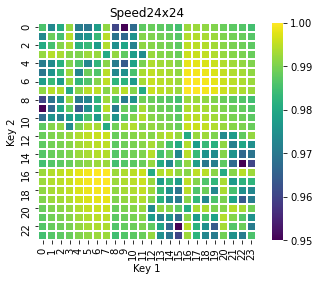

In [59]:
load_original_interkey_timings_table = False
if load_original_interkey_timings_table:

    interkey_table = "data/interkey-timings.xlsx"
    wb = xlrd.open_workbook(interkey_table) 
    interkey_sheet = wb.sheet_by_index(0)

    # Convert interkey stroke times table to array:
    Time32x32 = np.zeros((32,32))
    for i in range(1,33):
        for j in range(1,33):
            if interkey_sheet.cell_value(i,j):
                Time32x32[i-1,j-1] = interkey_sheet.cell_value(i,j)

    # Fill empty (symmetric) portion of the array:
    for i in range(1,33):
        for j in range(1,33):
            if interkey_sheet.cell_value(i,j):
                Time32x32[j-1,i-1] = interkey_sheet.cell_value(i,j)

    # Extract pairwise entries for the 24 vertical range keys:
    table_24_positions = [1,4,7,10, 2,5,8,11, 3,6,9,12,  19,22,25,28, 20,23,26,29, 21,24,27,30]
    Time24x24 = np.zeros((24, 24))
    u = 0
    for i in table_24_positions:
        u += 1
        v = 0
        for j in table_24_positions:
            v += 1
            Time24x24[u-1,v-1] = Time32x32[i-1,j-1]

    # Save:
    if print_output:
        file = open("Time24x24.txt", "w+")
        file.write(str(Time24x24))
        file.close()

    # Print:
    print(repr(Time24x24))

else:
    Time24x24 = np.array([[196., 225., 204., 164., 266., 258., 231., 166., 357., 325., 263.,
        186., 169., 176., 178., 186., 156., 156., 158., 163., 171., 175., 177., 185.],
       [225., 181., 182., 147., 239., 245., 196., 150., 289., 296., 229.,
        167., 162., 169., 170., 178., 148., 148., 150., 155., 163., 167., 169., 177.],
       [204., 182., 170., 149., 196., 194., 232., 155., 237., 214., 263.,
        166., 157., 164., 165., 173., 143., 143., 145., 150., 158., 163., 164., 172.],
       [164., 147., 149., 169., 160., 161., 157., 226., 165., 185., 234.,
        257., 154., 162., 163., 171., 141., 141., 143., 148., 156., 160., 162., 170.],
       [266., 239., 196., 160., 196., 240., 208., 166., 271., 267., 208.,
        169., 143., 150., 151., 160., 129., 129., 132., 137., 145., 149., 151., 159.],
       [258., 245., 194., 161., 240., 181., 183., 149., 245., 256., 184.,
        150., 138., 145., 146., 154., 124., 124., 126., 131., 139., 144., 145., 153.],
       [231., 196., 232., 157., 208., 183., 170., 149., 201., 215., 239.,
        151., 134., 141., 142., 150., 120., 120., 122., 127., 135., 140., 141., 149.],
       [166., 150., 155., 226., 166., 149., 149., 169., 160., 147., 170.,
        221., 133., 140., 141., 150., 119., 119., 122., 126., 135., 139., 141., 149.],
       [357., 289., 237., 165., 271., 245., 201., 160., 196., 236., 194.,
        161., 171., 178., 179., 188., 157., 157., 160., 164., 173., 177., 179., 187.],
       [325., 296., 214., 185., 267., 256., 215., 147., 236., 181., 184.,
        157., 166., 173., 174., 182., 152., 152., 154., 159., 167., 172., 173., 181.],
       [263., 229., 263., 234., 208., 184., 239., 170., 194., 184., 170.,
        150., 159., 166., 167., 176., 145., 145., 148., 153., 161., 165., 167., 175.],
       [186., 167., 166., 257., 169., 150., 151., 221., 161., 157., 150.,
        169., 153., 160., 161., 169., 139., 139., 141., 146., 154., 159., 160., 168.],
       [169., 162., 157., 154., 143., 138., 134., 133., 171., 166., 159.,
        153., 151., 147., 141., 145., 188., 151., 142., 164., 213., 204., 162., 145.],
       [176., 169., 164., 162., 150., 145., 141., 140., 178., 173., 166.,
        160., 147., 151., 189., 209., 137., 207., 191., 206., 149., 227.,  208., 226.],
       [178., 170., 165., 163., 151., 146., 142., 141., 179., 174., 167.,
        161., 141., 189., 157., 253., 136., 188., 210., 231., 155., 226.,   239., 225.],
       [186., 178., 173., 171., 160., 154., 150., 150., 188., 182., 176.,
        169., 145., 209., 253., 170., 147., 206., 251., 233., 164., 268.,  362., 236.],
       [156., 148., 143., 141., 129., 124., 120., 119., 157., 152., 145.,
        139., 188., 137., 136., 147., 151., 133., 138., 152., 192., 149.,  139., 143.],
       [156., 148., 143., 141., 129., 124., 120., 119., 157., 152., 145.,
        139., 151., 207., 188., 206., 133., 151., 179., 183., 145., 204.,  183., 194.],
       [158., 150., 145., 143., 132., 126., 122., 122., 160., 154., 148.,
        141., 142., 191., 210., 251., 138., 179., 157., 240., 145., 185.,  208., 235.],
       [163., 155., 150., 148., 137., 131., 127., 126., 164., 159., 153.,
        146., 164., 206., 231., 233., 152., 183., 240., 170., 160., 220.,  293., 230.],
       [171., 163., 158., 156., 145., 139., 135., 135., 173., 167., 161.,
        154., 213., 149., 155., 164., 192., 145., 145., 160., 151., 140.,  142., 175.],
       [175., 167., 163., 160., 149., 144., 140., 139., 177., 172., 165.,
        159., 204., 227., 226., 268., 149., 204., 185., 220., 140., 151.,  175., 265.],
       [177., 169., 164., 162., 151., 145., 141., 141., 179., 173., 167.,
        160., 162., 208., 239., 362., 139., 183., 208., 293., 142., 175.,  157., 265.],
       [185., 177., 172., 170., 159., 153., 149., 149., 187., 181., 175.,
        168., 145., 226., 225., 236., 143., 194., 235., 230., 175., 265.,  265., 170.]])

# Left/right symmetric version of the Time24x24 matrix
# (The original version was constructed with data from right-handed people.)
TimeSymmetric24x24 = np.ones((24,24))

#        Left:            Right:
#     1  2  3  4       13 14 15 16 
#     5  6  7  8       17 18 19 20
#     9 10 11 12       21 22 23 24

I = [1,2,3,4, 5,6,7,8, 9,10,11,12,  16,15,14,13, 20,19,18,17, 24,23,22,21]
J = [16,15,14,13, 20,19,18,17, 24,23,22,21,  1,2,3,4, 5,6,7,8, 9,10,11,12]

for i1, I1 in enumerate(I):
    for i2, I2 in enumerate(I):
        J1 = J[i1] - 1
        J2 = J[i2] - 1
        #print(i1,i2,I1-1,I2-1,J1,J2)
        avgvalue = (Time24x24[I1-1,I2-1] + Time24x24[J1,J2]) / 2 
        TimeSymmetric24x24[I1-1,I2-1] = avgvalue
        TimeSymmetric24x24[J1,J2] = avgvalue

# Normalize matrix with min-max scaling to a range with maximum = 1:
newMin = speed_factor  # np.min(TimeSymmetric24x24) / np.max(TimeSymmetric24x24)
newMax = 1.0
TimeSymmetric24x24 = newMin + (TimeSymmetric24x24 - np.min(TimeSymmetric24x24)) * (newMax - newMin) / (np.max(TimeSymmetric24x24) - np.min(TimeSymmetric24x24))

# Convert relative interkey stroke times to relative speeds by subtracting from 1:
Speed24x24 = 1 - TimeSymmetric24x24 + np.min(TimeSymmetric24x24)

# Print:
print_matrix_info(matrix_data=Speed24x24, matrix_label="Speed24x24", nkeys=24, nlines=50)
heatmap(data=Speed24x24, title="Speed24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Print:
#print(repr(Speed24x24))

# Save:
if print_output:
    file = open("Speed24x24.txt", "w+")
    file.write(str(Speed24x24))
    file.close()


/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


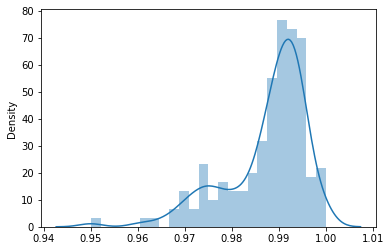

In [60]:
# Histogram
#if apply_speed:
sns_plot = sns.distplot(Speed24x24)
if print_output:
    sns_plot.figure.savefig("{0}_histogram.png".format("Speed24x24"))

Output:

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Speed24x24 min = 0.95, max = 1.0
    Speed24x24 key number pairs with minimum values:
        10 -> 1        (0.95)
        16 -> 23        (0.95)
        1 -> 10        (0.95)
        23 -> 16        (0.95)
        1 -> 9        (0.960467706013363)
        16 -> 24        (0.960467706013363)
        9 -> 1        (0.960467706013363)
        24 -> 16        (0.960467706013363)
        20 -> 23        (0.9641425389755011)
        23 -> 20        (0.9641425389755011)
        10 -> 5        (0.9641425389755011)
        5 -> 10        (0.9641425389755011)
        15 -> 23        (0.9669265033407572)
        23 -> 15        (0.9669265033407572)
        10 -> 2        (0.9669265033407572)
        2 -> 10        (0.9669265033407572)
        11 -> 1        (0.9673719376391982)
        22 -> 16        (0.9673719376391982)
        16 -> 22        (0.9673719376391982)
        1 -> 11        (0.9673719376391982)
        9 -> 2        (0.9692650334075723)
        15 -> 24        (0.9692650334075723)
        2 -> 9        (0.9692650334075723)
        24 -> 15        (0.9692650334075723)
        19 -> 16        (0.9698218262806236)
        1 -> 6        (0.9698218262806236)
        16 -> 19        (0.9698218262806236)
        6 -> 1        (0.9698218262806236)
        20 -> 24        (0.9707126948775056)
        10 -> 9        (0.9707126948775056)
        24 -> 23        (0.9707126948775056)
        5 -> 9        (0.9707126948775056)
        23 -> 24        (0.9707126948775056)
        9 -> 10        (0.9707126948775056)
        9 -> 5        (0.9707126948775056)
        24 -> 20        (0.9707126948775056)
        5 -> 1        (0.9709354120267261)
        20 -> 16        (0.9709354120267261)
        16 -> 20        (0.9709354120267261)
        1 -> 5        (0.9709354120267261)
        3 -> 11        (0.9719376391982182)
        14 -> 22        (0.9719376391982182)
        22 -> 14        (0.9719376391982182)
        11 -> 3        (0.9719376391982182)
        6 -> 5        (0.9730512249443207)
        6 -> 9        (0.9730512249443207)
        19 -> 24        (0.9730512249443207)
        20 -> 19        (0.9730512249443207)
        19 -> 20        (0.9730512249443207)
        24 -> 19        (0.9730512249443207)
    Speed24x24 key number pairs with maximum values:
        17 -> 8        (1.0)
        8 -> 17        (1.0)
        17 -> 7        (0.9998886414253898)
        18 -> 8        (0.9998886414253898)
        7 -> 17        (0.9998886414253898)
        8 -> 18        (0.9998886414253898)
        7 -> 18        (0.9997772828507795)
        18 -> 7        (0.9997772828507795)
        17 -> 6        (0.9991091314031181)
        7 -> 19        (0.9991091314031181)
        18 -> 6        (0.9991091314031181)
        19 -> 8        (0.9991091314031181)
        6 -> 18        (0.9991091314031181)
        19 -> 7        (0.9991091314031181)
        6 -> 17        (0.9991091314031181)
        8 -> 19        (0.9991091314031181)
        6 -> 19        (0.9984409799554566)
        19 -> 6        (0.9984409799554566)
        17 -> 5        (0.9981069042316258)
        5 -> 17        (0.9981069042316258)
        20 -> 8        (0.9981069042316258)
        8 -> 20        (0.9981069042316258)
        5 -> 18        (0.9979955456570155)
        7 -> 20        (0.9979955456570155)
        20 -> 7        (0.9979955456570155)
        18 -> 5        (0.9979955456570155)
        6 -> 20        (0.9972160356347439)
        19 -> 5        (0.9972160356347439)
        5 -> 19        (0.9972160356347439)
        20 -> 6        (0.9972160356347439)
        20 -> 5        (0.9959910913140312)
        8 -> 13        (0.9959910913140312)
        21 -> 8        (0.9959910913140312)
        21 -> 7        (0.9959910913140312)
        18 -> 12        (0.9959910913140312)
        17 -> 12        (0.9959910913140312)
        8 -> 21        (0.9959910913140312)
        7 -> 21        (0.9959910913140312)
        13 -> 8        (0.9959910913140312)
        17 -> 4        (0.9959910913140312)
        5 -> 20        (0.9959910913140312)
        12 -> 17        (0.9959910913140312)
        12 -> 18        (0.9959910913140312)
        4 -> 17        (0.9959910913140312)
        4 -> 18        (0.995879732739421)
        18 -> 4        (0.995879732739421)
        13 -> 7        (0.995879732739421)
        7 -> 13        (0.995879732739421)
        21 -> 6        (0.9953229398663697)
        19 -> 12        (0.9953229398663697)

## Strength matrix  <a name="strength">

### 24x24 relative finger position STRENGTH matrix

Finger strengths are based on peak keyboard reaction forces (in newtons) from Table 4 of <br>
"Keyboard Reaction Force and Finger Flexor Electromyograms during Computer Keyboard Work" <br>
BJ Martin, TJ Armstrong, JA Foulke, S Natarajan, Human Factors,1996,38(4),654-664:
   
    middle     2.36
    index      2.26
    ring       2.02
    little     1.84
    
    2.36/1.84 = 1.28
    2.36/2.02 = 1.17

For reference, Table 1 of "Ergonomic keyboard layout designed for the Filipino language", 2016 (doi: 10.1007/978-3-319-41694-6_41) presents "average finger strength of Filipinos [n=30, ages 16-36] measured in pounds":
   
                L       R
    little     3.77   4.27
    ring       4.54   5.08
    middle     5.65   6.37
    index      6.09   6.57
    
    6.57/4.27 = 1.54
    6.09/3.77 = 1.62
    6.37/5.08 = 1.25
    5.65/4.54 = 1.24
    
We won't use these results as I don't feel they represent relative strength relevant for typing: "Respondents were asked to sit in upright position, with their wrists resting on a flat surface. A pinch gauge was placed within each finger's reach. The respondents were asked to exert maximum pressure on the device."
    
The following does not take into account order of key pairs (see Flow matrix).


Strength24x24 min = 0.95, max = 1.0
Strength24x24 key number pairs with minimum values:
        1 -> 1        (0.95)
        5 -> 9        (0.95)
        5 -> 16        (0.95)
        5 -> 20        (0.95)
        5 -> 24        (0.95)
        9 -> 1        (0.95)
        9 -> 5        (0.95)
        9 -> 9        (0.95)
        9 -> 16        (0.95)
        9 -> 20        (0.95)
Strength24x24 key number pairs with maximum values:
        18 -> 11        (1.0)
        22 -> 14        (1.0)
        3 -> 14        (1.0)
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        18 -> 14        (1.0)
        3 -> 18        (1.0)
        18 -> 18        (1.0)
        22 -> 22        (1.0)
        18 -> 22        (1.0)


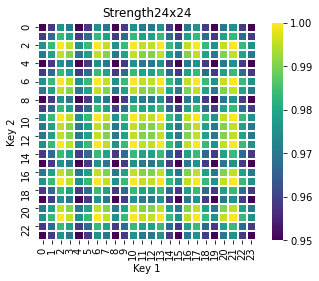

In [61]:
if apply_strength:

    # Normalize by the highest peak force (middle finger):
    middle_force = 2.36
    index_force = 2.26
    ring_force = 2.02
    little_force = 1.84
    middle_norm = 1.0
    index_norm = index_force / middle_force
    ring_norm = ring_force / middle_force
    little_norm = little_force / middle_force

    # Relative left/right hand strength (assume equal):
    lf = 1.0
    rf = 1.0
    
    strengths24 = np.array((lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm))

    # Create a finger-pair position strength matrix by adding pairs of strength values:
    Strength24x24 = np.zeros((24, 24))
    for i in range(24):
        Strength24x24[i,:] = strengths24
    Strength24x24 = (Strength24x24 + Strength24x24.transpose())

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = strength_factor  # np.min(Strength24x24) / np.max(Strength24x24)
    newMax = 1.0
    Strength24x24 = newMin + (Strength24x24 - np.min(Strength24x24)) * (newMax - newMin) / (np.max(Strength24x24) - np.min(Strength24x24))

    # Print:
    print_matrix_info(matrix_data=Strength24x24, matrix_label="Strength24x24", nkeys=24, nlines=10)
    heatmap(data=Strength24x24, title="Strength24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

    # Save:
    if print_output:
        file = open("Strength24x24.txt", "w+")
        file.write(str(Strength24x24))
        file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


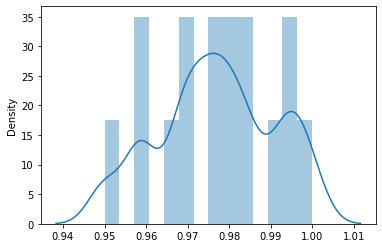

In [62]:
if apply_strength:

    # Histogram
    sns_plot = sns.distplot(Strength24x24)
    if print_output:
        sns_plot.figure.savefig("{0}_histogram.png".format("Strength24x24"))

Strength32x32 min = 0.95, max = 1.0
Strength32x32 key number pairs with minimum values:
        1 -> 1        (0.95)
        20 -> 5        (0.95)
        20 -> 1        (0.95)
        32 -> 31        (0.95)
        16 -> 31        (0.95)
        16 -> 24        (0.95)
        16 -> 20        (0.95)
        16 -> 16        (0.95)
        16 -> 9        (0.95)
        16 -> 5        (0.95)
Strength32x32 key number pairs with maximum values:
        22 -> 3        (1.0)
        18 -> 22        (1.0)
        3 -> 22        (1.0)
        22 -> 7        (1.0)
        11 -> 11        (1.0)
        7 -> 18        (1.0)
        11 -> 14        (1.0)
        7 -> 22        (1.0)
        11 -> 18        (1.0)
        14 -> 18        (1.0)


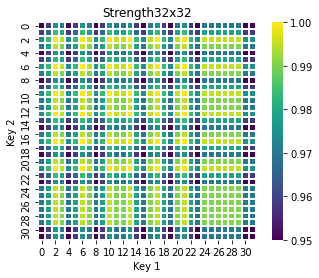

In [63]:
if apply_strength:

    penalty = 1.0  # Penalty for lateral (index, little) finger placement (1 = no penalty)

    strengths32 = np.array((lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                            lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                            lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                            rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                            rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                            rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                            lf * index_norm * penalty, lf * index_norm * penalty, lf * index_norm * penalty,
                            rf * index_norm * penalty, rf * index_norm * penalty, rf * index_norm * penalty,
                            rf * little_norm * penalty, rf * little_norm * penalty))

    # Create a finger-pair position strength matrix by adding pairs of strength values:
    Strength32x32 = np.zeros((32, 32))
    for i in range(32):
        Strength32x32[i,:] = strengths32
    Strength32x32 = (Strength32x32 + Strength32x32.transpose())

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = strength_factor  # np.min(Strength32x32) / np.max(Strength32x32)
    newMax = 1.0
    Strength32x32 = newMin + (Strength32x32 - np.min(Strength32x32)) * (newMax - newMin) / (np.max(Strength32x32) - np.min(Strength32x32))

    # Print:
    print_matrix_info(matrix_data=Strength32x32, matrix_label="Strength32x32", nkeys=32, nlines=10)
    heatmap(data=Strength32x32, title="Strength32x32", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

    # Save:
    if print_output:
        file = open("Strength32x32.txt", "w+")
        file.write(str(Strength32x32))
        file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


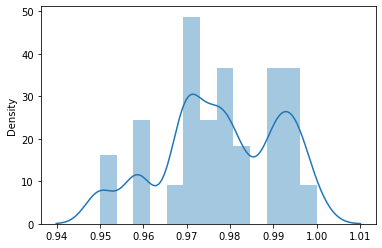

In [64]:
if apply_strength:

    # Histogram
    sns_plot = sns.distplot(Strength32x32)
    if print_output:
        sns_plot.figure.savefig("{0}_histogram.png".format("Strength32x32"))

### Strength output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Strength24x24 min = 0.95, max = 1.0
    Strength24x24 key number pairs with minimum values:
            1 -> 1        (0.95)
            5 -> 9        (0.95)
            5 -> 16        (0.95)
            5 -> 20        (0.95)
            5 -> 24        (0.95)
            9 -> 1        (0.95)
            9 -> 5        (0.95)
            9 -> 9        (0.95)
            9 -> 16        (0.95)
            9 -> 20        (0.95)
    Strength32x32 min = 0.95, max = 1.0
    Strength32x32 key number pairs with minimum values:
            1 -> 1        (0.95)
            20 -> 5        (0.95)
            20 -> 1        (0.95)
            32 -> 31        (0.95)
            16 -> 31        (0.95)
            16 -> 24        (0.95)
            16 -> 20        (0.95)
            16 -> 16        (0.95)
            16 -> 9        (0.95)
            16 -> 5        (0.95)

## Flow matrix  <a name="flow">

The Flow24x24 matrix takes into account ease of transition between ordered pairs of keys

#### Dvorak et al. (1936) defined eleven criteria for the design and evaluation of keyboard layouts:
1.  Deviation from the balance of hand and finger loads should be as low as possible.
2.  Percentage of tapping with the same fingers should be as low as possible.
3.  Percentage of tapping that includes top row should be as low as possible.
4.  Percentage of tapping that includes bottom row should be as low as possible.
5.  Percentage of tapping in the home row should be as high as possible.
6.  Percentage of tapping by alternating hands should be as high as possible.
7.  Percentage of hurdles with the same finger should be as low as possible.
8.  Percentage of hurdles with adjacent_offset fingers should be as low as possible.
9.  Percentage of hurdles with remote fingers should be as low as possible.
10. Percentage of reach with the same finger should be as low as possible.
11. Percentage of reach with adjacent_offset fingers should be as low as possible.

#### Synopsis of above criteria for pairwise key presses when touch typing:
1. Alternate between hands.
2. Balance finger loads, and avoid using the same finger.
3. Avoid the upper and lower rows, and avoid skip_rowping over the home row.
4. Avoid tapping adjacent_offset rows with the same or adjacent_offset fingers.

#### The approach here advocates the following criteria:
1.  Assign letters to keys that don't require lateral finger movements.
2.  **Promote alternating between hands over uncomfortable transitions with the same hand.**
3.  Assign the most common letters to the most comfortable keys.
4.  Arrange letters so that more frequent bigrams are easier to type.
5.  Promote little-to-index-finger roll-ins over index-to-little-finger roll-outs.
6.  **Balance finger loads according to their relative strength.**
7.  Avoid stretching shorter fingers up and longer fingers down.
8.  **Avoid using the same finger.**
9.  **Avoid skipping over the home row.**
10. Assign the most common punctuation to keys in the middle of the keyboard.
11. Assign easy-to-remember symbols to the Shift-number keys.
    
#### Factors to penalize strenuous key transitions

Repetition:
    
    - same_finger = 0.9^3 = 0.729: use same finger again for a different key
        - cannot accompany outward, side_above, or adjacent_shorter_above 

Distance:
    
    - skip_row = 0.9^3 = 0.729: keys skip over a row (e.g., one on bottom row, the other on top row)

Dexterity:
    
    - lateral = 0.9: lateral movement of (index or little) finger outside of 8 vertical columns
         - always accompanied by same_finger parameter
    - side_above = 0.9: index or little finger types key one or more rows above the other key
    - adjacent_shorter_above = 0.9: adjacent shorter finger on one key positioned above other key's finger
         - finger length in ascending order assumed to be: little, index, ring, middle
    
Direction:
    
    - outward = 0.95: outward roll of fingers from the index to little finger
        - can be multiplied by all but the same_finger parameter
        - small enough to influence direction for a given pair
        - small enough to create intermediate penalties without jumping Penalty classes below

Strength: Accounted for by the strength matrix (minimum value for the little finger = 0.95)
        - small enough to create intermediate penalties without jumping penalty classes below


#### Example flow values for left side home block 
    
No penalty (both keys in the same row in an inward roll or repeating the same key):

    1  2  3  4
    5  6  7  8
    9 10 11 12

    2=>2, 2=>3, 3=>4, 2=>4, 1=>4

Penalty = 0.95:
    
    7=>6 = outward

    1  2  3  4
    5  6  7  8
    9 10 11 12
    
Penalty = 0.9:
    
    6=>4 = side_above
    2=>7 = adjacent_shorter_above
    
Penalty = 0.9^2 = 0.81:

    7=>4 = side_above * adjacent_shorter_above

Penalty = 0.9^3 = 0.729:

    3=>7 = same_finger
    2=>12 = skip_row

Penalty = 0.9^4 = 0.6561:

    10=>4 = skip_row * side_above
    2=>11 = skip_row * adjacent_shorter_above

Penalty = 0.9^5 = 0.59049:

    11=>4 = skip_row * side_above * adjacent_shorter_above

Penalty = 0.9^6 = 0.531441

    3=>11 = same_finger * skip_row


Try outward = 0.9:

    1  2  3  4
    5  6  7  8
    9 10 11 12

Penalty = 0.9:

    7=>6 = outward
    6=>4 = side_above
    2=>7 = adjacent_shorter_above

Penalty = 0.9^2 = 0.81:

    7=>1 = outward * side_above
    7=>2 = outward * adjacent_shorter_above
    7=>4 = side_above * adjacent_shorter_above

Penalty = 0.9^3 = 0.729:

    3=>7 = same_finger
    2=>12 = skip_row
    6=>1 = outward * side_above * adjacent_shorter_above

Penalty = 0.9^4 = 0.6561:

    12=>2 = skip_row * outward
    10=>4 = skip_row * side_above
    2=>11 = skip_row * adjacent_shorter_above

Penalty = 0.9^5 = 0.59049:

    4=>10 = skip_row * side_above * outward
    11=>2 = skip_row * adjacent_shorter_above * outward
    11=>4 = skip_row * side_above * adjacent_shorter_above

Penalty = 0.9^6 = 0.531441

    3=>11 = same_finger * skip_row     
    10=>1 = skip_row * outward * side_above * adjacent_shorter_above


Try outward = 0.9, same_finger = 9^4:

    1  2  3  4
    5  6  7  8
    9 10 11 12

Penalty = 0.9:

    7=>6 = outward
    6=>4 = side_above
    2=>7 = adjacent_shorter_above

Penalty = 0.9^2 = 0.81:

    7=>1 = outward * side_above
    7=>2 = outward * adjacent_shorter_above
    7=>4 = side_above * adjacent_shorter_above

Penalty = 0.9^3 = 0.729:

    2=>12 = skip_row
    6=>1 = outward * side_above * adjacent_shorter_above

Penalty = 0.9^4 = 0.6561:

    3=>7 = same_finger
    12=>2 = skip_row * outward
    10=>4 = skip_row * side_above
    2=>11 = skip_row * adjacent_shorter_above

Penalty = 0.9^5 = 0.59049:

    4=>10 = skip_row * side_above * outward
    11=>2 = skip_row * adjacent_shorter_above * outward
    11=>4 = skip_row * side_above * adjacent_shorter_above

Penalty = 0.9^6 = 0.531441

    10=>1 = skip_row * outward * side_above * adjacent_shorter_above

Penalty = 0.9^7 = 0.531441 * 0.9

    3=>11 = same_finger * skip_row     


Skip #s:

    1  2  3  4
    5  6  7  8
    9 10 11 12

outward = 0.9

shorter_above_1away = 0.9^5

side_above_3away = 0.9
side_above_2away = 0.9^2
side_above_1away = 0.9^3

skip_row_3away = 0.9^2
skip_row_2away = 0.9^3
skip_row_1away = 0.9^4
skip_row_0away = 0.9^5

same_finger = 0.9^5


Penalty = 0.9:

    7=>6 = outward
    6=>4 = side_above
    2=>7 = adjacent_shorter_above

Penalty = 0.9^2 = 0.81:

    7=>1 = outward * side_above
    7=>2 = outward * adjacent_shorter_above
    7=>4 = side_above * adjacent_shorter_above

Penalty = 0.9^3 = 0.729:

    2=>12 = skip_row
    6=>1 = outward * side_above * adjacent_shorter_above

Penalty = 0.9^4 = 0.6561:

    3=>7 = same_finger
    12=>2 = skip_row * outward
    10=>4 = skip_row * side_above
    2=>11 = skip_row * adjacent_shorter_above

Penalty = 0.9^5 = 0.59049:

    4=>10 = skip_row * side_above * outward
    11=>2 = skip_row * adjacent_shorter_above * outward
    11=>4 = skip_row * side_above * adjacent_shorter_above

Penalty = 0.9^6 = 0.531441

    10=>1 = skip_row * outward * side_above * adjacent_shorter_above

Penalty = 0.9^7 = 0.531441 * 0.9

    3=>11 = same_finger * skip_row     


In [65]:
# Penalizing factors for 24 keys  (1 = no penalty; set to less than 1 to penalize):

# Repetition
same_hand = 1.0  # taken care of by splitting up the most frequent letters across left/right sides above
same_finger = 0.6561  # use same finger again for a different key

# Distance
not_home_row = 1.0  # at least one key not on home row
skip_row = 0.729  # keys skip over a row (e.g., one on bottom row, the other on top row)

# Dexterity
side_above = 0.9  # index or little finger types key one or more rows above the other key
adjacent_shorter_above = 0.9  # adjacent shorter finger on one key positioned above other key's finger
lateral = 0.9  # lateral movement of (index or little) finger outside of 8 vertical columns

# Direction
outward = 0.9  # outward roll of fingers from the index to little finger

# Unused
shorter_above = 1.0
adjacent_offset = 1.0

#### 24 keys:

Flow24x24 min = 0.4782969, max = 1.0
Flow24x24 key number pairs with minimum values:
        9 -> 1        (0.4782969)
        3 -> 11        (0.4782969)
        12 -> 4        (0.4782969)
        23 -> 15        (0.4782969)
        4 -> 12        (0.4782969)
        22 -> 14        (0.4782969)
        14 -> 22        (0.4782969)
        2 -> 10        (0.4782969)
        13 -> 21        (0.4782969)
        15 -> 23        (0.4782969)
Flow24x24 key number pairs with maximum values:
        24 -> 24        (1.0)
        11 -> 22        (1.0)
        10 -> 10        (1.0)
        10 -> 11        (1.0)
        10 -> 12        (1.0)
        10 -> 13        (1.0)
        10 -> 14        (1.0)
        10 -> 15        (1.0)
        10 -> 16        (1.0)
        10 -> 17        (1.0)


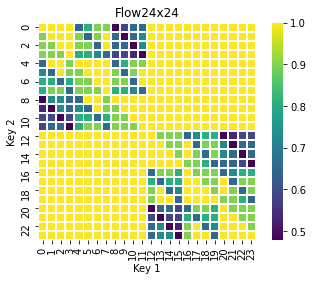

In [66]:
def create_24x24_flow_matrix(same_hand, same_finger, not_home_row, skip_row, outward, adjacent_offset, shorter_above, side_above):

    all_24_keys = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]

    # Create a matrix and multiply by flow factors that promote easy interkey transitions:
    T = np.ones((24, 24))

    # 7.  Promote alternating between hands over uncomfortable transitions with the same hand.
    if same_hand < 1.0:
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
        for i in range(0,12):
            for j in range(0,12):
                T[i,j] *= same_hand
        for i in range(12,24):
            for j in range(12,24):
                T[i,j] *= same_hand

    # 8.  Promote little-to-index-finger roll-ins over index-to-little-finger outwards.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if outward < 1.0:

        # same-row roll-outs:
        roll_ins = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21]]
        for x in roll_ins:
            T[x[1]-1, x[0]-1] *= outward

        # same-row roll-outs, skipping keys:
        roll_ins_skip_keys = [[1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                              [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21]]
        for x in roll_ins_skip_keys:
            T[x[1]-1, x[0]-1] *= outward

        # adjacent-row roll-outs:
        roll_ins_adj_rows = [[1,6],[1,7],[1,8],[2,7],[2,8],[3,8], [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                             [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                             [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                             [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], [24,19],[24,18],[24,17],[23,18],[23,17],[22,17]]
        for x in roll_ins_adj_rows:
            T[x[1]-1, x[0]-1] *= outward

        # upper<->lower row roll-outs:
        roll_ins_skip_home = [[1,10],[1,11],[1,12],[2,11],[2,12],[3,12], [9,2],[9,3],[9,4],[10,3],[10,4],[11,4],
                              [16,23],[16,22],[16,21],[15,22],[15,21],[14,21], [24,15],[24,14],[24,13],[23,14],[23,13],[22,13]]
        for x in roll_ins_skip_home:
            T[x[1]-1, x[0]-1] *= outward

    # 9.  Avoid stretching shorter fingers up and longer fingers down.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if side_above:
        for x in [1]:
            for y in [6,7,8,10,11,12]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [5]:
            for y in [10,11,12]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [4]:
            for y in [5,6,7,9,10,11]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [8]:
            for y in [9,10,11]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [13]:
            for y in [18,19,20,22,23,24]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [17]:
            for y in [22,23,24]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [16]:
            for y in [17,18,19,21,22,23]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [20]:
            for y in [21,22,23]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
    if shorter_above:
        for x in [1]:
            for y in [6,7,8,10,11,12]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [2]:
            for y in [7,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [4]:
            for y in [6,7,10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [5]:
            for y in [10,11,12]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [6]:
            for y in [11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [8]:
            for y in [10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [16]:
            for y in [17,18,19,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [15]:
            for y in [18,22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [13]:
            for y in [18,19,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [20]:
            for y in [21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [19]:
            for y in [22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [17]:
            for y in [22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

    if adjacent_offset < 1.0:
        adjacent_offsets =  [[1,6],[1,10],[5,2],[5,10],[9,2],[9,6],
                            [2,7],[2,11],[6,3],[6,11],[10,3],[10,7],
                            [3,8],[3,12],[7,4],[7,12],[11,4],[11,8],
                            [13,18],[13,22],[17,14],[17,22],[21,14],[21,18],
                            [14,19],[14,23],[18,15],[18,23],[22,15],[22,19],
                            [15,20],[15,24],[19,16],[19,24],[23,16],[23,20]]
        for x in adjacent_offsets:
            T[x[0]-1, x[1]-1] *= adjacent_offset
            T[x[1]-1, x[0]-1] *= adjacent_offset

    if adjacent_shorter_above < 1.0:
        adjacent_shorter_aboves =  [[1,6],[1,10],[5,10],
                            [2,7],[2,11],[6,11],
                            [7,4],[11,4],[11,8],
                            [13,18],[13,22],[17,22],
                            [18,15],[22,15],[22,19],
                            [19,16],[23,16],[23,20]]
        for x in adjacent_shorter_aboves:
            T[x[0]-1, x[1]-1] *= adjacent_shorter_above
            T[x[1]-1, x[0]-1] *= adjacent_shorter_above

    # 10. Avoid using the same finger.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if same_finger < 1.0:
        same_fingers = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
        for x in same_fingers:
            T[x[0]-1, x[1]-1] *= same_finger
            T[x[1]-1, x[0]-1] *= same_finger

    # 11. Avoid the upper and lower rows.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if not_home_row < 1.0:
        not_home_row_keys = [1,2,3,4, 9,10,11,12, 13,14,15,16, 21,22,23,24]
        home_row_keys = [5,6,7,8, 17,18,19,20]
        for x in not_home_row_keys:
            for y in not_home_row_keys:
                T[x-1, y-1] *= not_home_row
        for x in not_home_row_keys:
            for y in home_row_keys:
                T[x-1, y-1] *= not_home_row
                T[y-1, x-1] *= not_home_row

    # 12. Avoid skipping over the home row.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if skip_row < 1.0:
        skip_rows_left = [[1,2,3,4], [9,10,11,12]] 
        skip_rows_right = [[13,14,15,16], [21,22,23,24]] 
        for x in skip_rows_left[0]:
            for y in skip_rows_left[1]:
                T[x-1, y-1] *= skip_row
                T[y-1, x-1] *= skip_row
        for x in skip_rows_right[0]:
            for y in skip_rows_right[1]:
                T[x-1, y-1] *= skip_row
                T[y-1, x-1] *= skip_row

    Flow24x24 = T

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Flow24x24) / np.max(Flow24x24)
    newMax = 1.0
    Flow24x24 = newMin + (Flow24x24 - np.min(Flow24x24)) * (newMax - newMin) / (np.max(Flow24x24) - np.min(Flow24x24))

    return Flow24x24

Flow24x24 = create_24x24_flow_matrix(same_hand, same_finger, not_home_row, skip_row, outward, adjacent_offset, shorter_above, side_above)

# Print:
print_matrix_info(matrix_data=Flow24x24, matrix_label="Flow24x24", nkeys=24, nlines=10)
heatmap(data=Flow24x24, title="Flow24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Flow24x24.txt", "w+")
    file.write(str(Flow24x24))
    file.close()

#    1  2  3  4   13 14 15 16  
#    5  6  7  8   17 18 19 20 
#    9 10 11 12   21 22 23 24

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


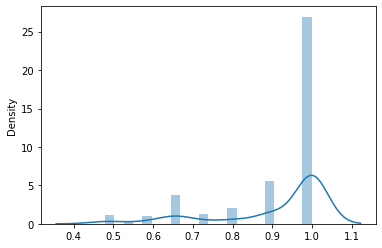

In [67]:
# Histogram
sns_plot = sns.distplot(Flow24x24)
if print_output:
    sns_plot.figure.savefig("{0}_histogram.png".format("Flow24x24"))

#### 32 keys:

         Left:             Right:
     1  2  3  4 25   28 13 14 15 16 31 
     5  6  7  8 26   29 17 18 19 20 32
     9 10 11 12 27   30 21 22 23 24


Flow32x32 min = 0.38742048900000003, max = 1.0
Flow32x32 key number pairs with minimum values:
        30 -> 28        (0.38742048900000003)
        27 -> 4        (0.38742048900000003)
        30 -> 13        (0.38742048900000003)
        28 -> 21        (0.38742048900000003)
        25 -> 27        (0.38742048900000003)
        27 -> 25        (0.38742048900000003)
        28 -> 30        (0.38742048900000003)
        25 -> 12        (0.38742048900000003)
        24 -> 31        (0.38742048900000003)
        31 -> 24        (0.43046721000000004)
Flow32x32 key number pairs with maximum values:
        1 -> 1        (1.0)
        20 -> 9        (1.0)
        19 -> 19        (1.0)
        19 -> 21        (1.0)
        8 -> 18        (1.0)
        8 -> 17        (1.0)
        8 -> 16        (1.0)
        8 -> 15        (1.0)
        20 -> 1        (1.0)
        20 -> 2        (1.0)


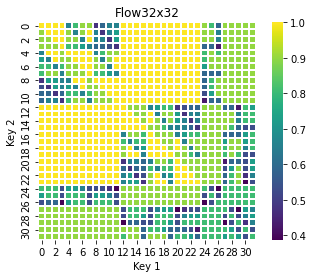

In [68]:
def create_32x32_flow_matrix(same_hand, same_finger, not_home_row, skip_row, outward, adjacent_offset, shorter_above, side_above):

    all_32_keys = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24, 
                   25,26,27, 28,29,30, 31,32]

    # Create a matrix and multiply by flow factors that promote easy interkey transitions:
    T = np.ones((32, 32))

    if lateral < 1.0:
        for x in all_32_keys:
            for y in [25,26,27, 28,29,30, 31,32]:
                T[x-1, y-1] *= lateral
                T[y-1, x-1] *= lateral    

    # 7.  Promote alternating between hands over uncomfortable transitions with the same hand.
    if same_hand < 1.0:
        for i in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
            for j in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
                T[i-1,j-1] *= same_hand
        for i in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
            for j in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
                T[i-1,j-1] *= same_hand

    # 8.  Promote little-to-index-finger roll-ins over index-to-little-finger outsward rolls.
    # Penalize (index, little) finger lateral movements:
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if outward < 1.0:

        # same-row roll-outs:
        roll_ins = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [4,25],[8,26],[12,27],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21],
                    [13,28],[17,29],[21,30], [31,16],[32,20]]
        for x in roll_ins:
            T[x[1]-1, x[0]-1] *= outward

        # same-row roll-outs, skipping keys:
        roll_ins_skip_keys = [[1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                              [1,25],[2,25],[3,25],
                              [5,26],[6,26],[7,26],
                              [9,27],[10,27],[11,27],
                              [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21],
                              [16,28],[15,28],[14,28],
                              [20,29],[19,29],[18,29],
                              [24,30],[23,30],[22,30],
                              [31,15],[31,14],[31,13],[31,28],
                              [32,19],[32,18],[32,17],[32,29]]
        for x in roll_ins_skip_keys:
            T[x[1]-1, x[0]-1] *= outward

        # adjacent-row roll-outs:
        #  1  2  3  4 25   28 13 14 15 16 31 
        #  5  6  7  8 26   29 17 18 19 20 32
        #  9 10 11 12 27   30 21 22 23 24
        roll_ins_adj_rows = [[1,6],[1,7],[1,8],[2,7],[2,8],[3,8], 
                             [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                             [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], 
                             [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                             [5,25],[6,25],[7,25],[8,25],
                             [5,27],[6,27],[7,27],[8,27],
                             [1,26],[2,26],[3,26],[4,26],
                             [9,26],[10,26],[11,26],[12,26],
                             [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], 
                             [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                             [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], 
                             [24,19],[24,18],[24,17],[23,18],[23,17],[22,17],
                             [16,29],[15,29],[14,29],[13,29],
                             [24,29],[23,29],[22,29],[21,29],
                             [20,28],[19,28],[18,28],[17,28],
                             [20,30],[19,30],[18,30],[17,30],
                             [31,20],[31,19],[31,18],[31,17],[31,29],
                             [32,16],[32,15],[32,14],[32,13],[32,28],
                             [32,24],[32,23],[32,22],[32,21],[32,30]]
        for x in roll_ins_adj_rows:
            T[x[1]-1, x[0]-1] *= outward

        # upper<->lower row roll-outs:
        roll_ins_skip_home = [[1,10],[1,11],[1,12],[1,27],[2,11],[2,12],[2,27],[3,12],[3,27],[4,27], 
                              [9,2],[9,3],[9,4],[9,25],[10,3],[10,4],[10,25],[11,4],[11,25],[12,25],
                              [16,23],[16,22],[16,21],[16,30],[15,22],[15,21],[15,30],[14,21],[14,30],[13,30],
                              [24,15],[24,14],[24,13],[24,28],[23,14],[23,13],[23,28],[22,13],[22,28],[21,28],
                              [31,24],[31,23],[31,22],[31,21],[31,30]]
        for x in roll_ins_skip_home:
            T[x[1]-1, x[0]-1] *= outward

    # 9.  Avoid stretching shorter fingers up and longer fingers down.
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if side_above:
        for x in [1]:
            for y in [6,7,8,10,11,12,26,27]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [5]:
            for y in [10,11,12,27]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [4]:
            for y in [5,6,7,9,10,11]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [8]:
            for y in [9,10,11]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [25]:
            for y in [5,6,7,9,10,11]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [26]:
            for y in [9,10,11]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [13]:
            for y in [18,19,20,22,23,24,32]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [17]:
            for y in [22,23,24]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [28]:
            for y in [18,19,20,22,23,24,32]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [29]:
            for y in [22,23,24]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [16]:
            for y in [29,17,18,19,30,21,22,23]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [20]:
            for y in [30,21,22,23]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [31]:
            for y in [29,17,18,19,30,21,22,23]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above
        for x in [32]:
            for y in [30,21,22,23]:
                T[x-1, y-1] *= side_above
                T[y-1, x-1] *= side_above

    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if shorter_above:
        for x in [1]:
            for y in [6,7,8,26,10,11,12,27]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [2]:
            for y in [7,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [4]:
            for y in [6,7,10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [25]:
            for y in [6,7,10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [5]:
            for y in [10,11,12,27]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [6]:
            for y in [11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [8]:
            for y in [10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [26]:
            for y in [10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [16]:
            for y in [29,17,18,19,30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [31]:
            for y in [29,17,18,19,30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [15]:
            for y in [18,22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [13]:
            for y in [18,19,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [28]:
            for y in [18,19,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [20]:
            for y in [30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [32]:
            for y in [30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [19]:
            for y in [22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [17]:
            for y in [22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [29]:
            for y in [22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

    if adjacent_offset < 1.0:
        adjacent_offsets =  [[1,6],[1,10],[5,2],[5,10],[9,2],[9,6],
                            [2,7],[2,11],[6,3],[6,11],[10,3],[10,7],
                            [3,8],[3,12],[7,4],[7,12],[11,4],[11,8],
                            [4,26],[4,27],[8,25],[8,27],[12,25],[12,26],
                            [13,18],[13,22],[17,14],[17,22],[21,14],[21,18],
                            [14,19],[14,23],[18,15],[18,23],[22,15],[22,19],
                            [15,20],[15,24],[19,16],[19,24],[23,16],[23,20],
                            [28,17],[28,21],[29,13],[29,21],[30,13],[30,17],
                            [31,20],[31,24], [32,16],[32,24]]
        for x in adjacent_offsets:
            T[x[0]-1, x[1]-1] *= adjacent_offset
            T[x[1]-1, x[0]-1] *= adjacent_offset

    if adjacent_shorter_above < 1.0:
        adjacent_shorter_aboves =  [[1,6],[1,10],[5,10],
                            [2,7],[2,11],[6,11],
                            [7,4],[11,4],[11,8],
                            [7,25],[11,25],[11,26],
                            [13,18],[13,22],[17,22],
                            [18,28],[22,28],[22,29],
                            [18,15],[22,15],[22,19],
                            [19,16],[23,16],[23,20],
                            [19,31],[23,31],[23,32]]
        for x in adjacent_shorter_aboves:
            T[x[0]-1, x[1]-1] *= adjacent_shorter_above
            T[x[1]-1, x[0]-1] *= adjacent_shorter_above

    # 10. Avoid using the same finger.
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if same_finger < 1.0:
        same_fingers = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], 
                        [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [25,26],[26,27],[25,27], [28,29],[29,30],[28,30], [31,32],
                        [4,25],[4,26],[4,27], [8,25],[8,26],[8,27], [12,25],[12,26],[12,27],
                        [13,28],[13,29],[13,30], [17,28],[17,29],[17,30], [21,28],[21,29],[21,30],
                        [31,16],[31,20],[31,24], [32,16],[32,20],[32,24],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], 
                        [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
        for x in same_fingers:
            T[x[0]-1, x[1]-1] *= same_finger
            T[x[1]-1, x[0]-1] *= same_finger

    # 11. Avoid the upper and lower rows.
    if not_home_row < 1.0:
        not_home_row_keys = [1,2,3,4,25, 9,10,11,12,27, 28,13,14,15,16,31, 30,21,22,23,24]
        home_row_keys = [5,6,7,8,26, 29,17,18,19,20,32]
        for x in not_home_row_keys:
            for y in not_home_row_keys:
                T[x-1, y-1] *= not_home_row
        for x in not_home_row_keys:
            for y in home_row_keys:
                T[x-1, y-1] *= not_home_row
                T[y-1, x-1] *= not_home_row

    # 12. Avoid skipping over the home row.
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if skip_row < 1.0:
        skip_home_rows_left = [[1,2,3,4,25], [9,10,11,12,27]] 
        skip_home_rows_right = [[28,13,14,15,16,31], [30,21,22,23,24]] 
        for x in skip_home_rows_left[0]:
            for y in skip_home_rows_left[1]:
                T[x-1, y-1] *= skip_row
                T[y-1, x-1] *= skip_row
        for x in skip_home_rows_right[0]:
            for y in skip_home_rows_right[1]:
                T[x-1, y-1] *= skip_row
                T[y-1, x-1] *= skip_row

                
    Flow32x32 = T

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Flow32x32) / np.max(Flow32x32)
    newMax = 1.0
    Flow32x32 = newMin + (Flow32x32 - np.min(Flow32x32)) * (newMax - newMin) / (np.max(Flow32x32) - np.min(Flow32x32))

    return Flow32x32

Flow32x32 = create_32x32_flow_matrix(same_hand, same_finger, not_home_row, skip_row, outward, adjacent_offset, shorter_above, side_above)

# Print:
print_matrix_info(matrix_data=Flow32x32, matrix_label="Flow32x32", nkeys=32, nlines=10)
heatmap(data=Flow32x32, title="Flow32x32", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Flow32x32.txt", "w+")
    file.write(str(Flow32x32))
    file.close()

#  1  2  3  4 25   28 13 14 15 16 31 
#  5  6  7  8 26   29 17 18 19 20 32
#  9 10 11 12 27   30 21 22 23 24

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


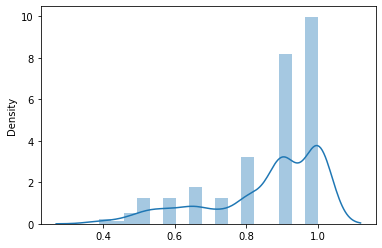

In [69]:
# Histogram
sns_plot = sns.distplot(Flow32x32)
if print_output:
    sns_plot.figure.savefig("{0}_histogram.png".format("Flow32x32"))

### Flow output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    
    Flow24x24 min = 0.5314409999999999, max = 1.0
    Flow24x24 key number pairs with minimum values:
        14 -> 22        (0.5314409999999999)
        13 -> 21        (0.5314409999999999)
        24 -> 16        (0.5314409999999999)
        21 -> 13        (0.5314409999999999)
        3 -> 11        (0.5314409999999999)
        10 -> 2        (0.5314409999999999)
        15 -> 23        (0.5314409999999999)
        1 -> 9        (0.5314409999999999)
        23 -> 15        (0.5314409999999999)
        22 -> 14        (0.5314409999999999)

    Flow32x32 min = 0.43046721000000004, max = 1.0
    Flow32x32 key number pairs with minimum values:
            30 -> 28        (0.43046721000000004)
            28 -> 30        (0.43046721000000004)
            25 -> 27        (0.43046721000000004)
            27 -> 25        (0.43046721000000004)
            25 -> 12        (0.45438205499999995)
            30 -> 13        (0.45438205499999995)
            27 -> 4        (0.45438205499999995)
            24 -> 31        (0.45438205499999995)
            28 -> 21        (0.45438205499999995)
            13 -> 30        (0.4782969)

## Combine Speed, Strength, and Flow matrices  <a name="speedstrengthflow">

Factors24x24 min = 0.454382055, max = 1.0
Factors24x24 key number pairs with minimum values:
        16 -> 24        (0.454382055)
        24 -> 16        (0.454382055)
        9 -> 1        (0.454382055)
        1 -> 9        (0.454382055)
        23 -> 15        (0.4626602705769231)
        10 -> 2        (0.4626602705769231)
        15 -> 23        (0.4626602705769231)
        2 -> 10        (0.4626602705769231)
        4 -> 12        (0.47369789134615387)
        13 -> 21        (0.47369789134615387)
Factors24x24 key number pairs with maximum values:
        22 -> 11        (1.0)
        11 -> 14        (1.0)
        3 -> 14        (1.0)
        7 -> 18        (1.0)
        22 -> 22        (1.0)
        14 -> 14        (1.0)
        7 -> 7        (1.0)
        18 -> 18        (1.0)
        3 -> 22        (1.0)
        14 -> 11        (1.0)


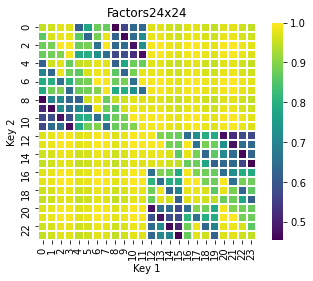

In [70]:
# 24 keys:
Factors24x24 = Flow24x24
if apply_strength:
    Factors24x24 = Strength24x24 * Factors24x24
if apply_speed:
    Factors24x24 = Speed24x24 * Factors24x24

# Print:
print_matrix_info(matrix_data=Factors24x24, matrix_label="Factors24x24", nkeys=24, nlines=10)
heatmap(data=Factors24x24, title="Factors24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Factors24x24.txt", "w+")
    file.write(str(Factors24x24))
    file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


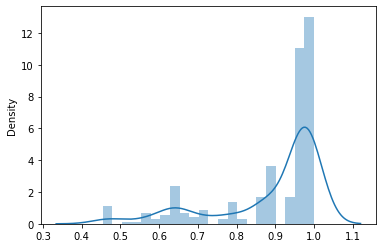

In [71]:
# Histogram
sns_plot = sns.distplot(Factors24x24)
if print_output:
    sns_plot.figure.savefig("{0}_histogram.png".format("Factors24x24"))

Factors32x32 min = 0.36804946455000004, max = 1.0
Factors32x32 key number pairs with minimum values:
        24 -> 31        (0.36804946455000004)
        25 -> 27        (0.38369529199038466)
        27 -> 4        (0.38369529199038466)
        27 -> 25        (0.38369529199038466)
        30 -> 28        (0.38369529199038466)
        30 -> 13        (0.38369529199038466)
        28 -> 30        (0.38369529199038466)
        28 -> 21        (0.38369529199038466)
        25 -> 12        (0.38369529199038466)
        31 -> 24        (0.4089438495)
Factors32x32 key number pairs with maximum values:
        14 -> 11        (1.0)
        18 -> 7        (1.0)
        7 -> 7        (1.0)
        14 -> 3        (1.0)
        14 -> 7        (1.0)
        22 -> 22        (1.0)
        7 -> 22        (1.0)
        14 -> 14        (1.0)
        18 -> 18        (1.0)
        22 -> 11        (1.0)


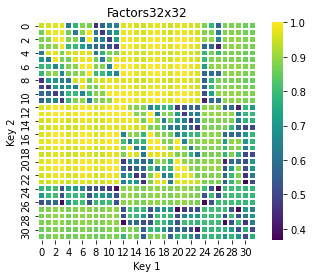

In [72]:
# 32 keys:
Factors32x32 = Flow32x32
if apply_strength:
    Factors32x32 = Strength32x32 * Factors32x32
if apply_speed:
    Factors32x32 = Speed32x32 * Factors32x32

# Print:
print_matrix_info(matrix_data=Factors32x32, matrix_label="Factors32x32", nkeys=32, nlines=10)
heatmap(data=Factors32x32, title="Factors32x32", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Factors32x32.txt", "w+")
    file.write(str(Factors32x32))
    file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


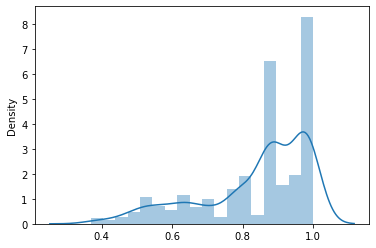

In [73]:
# Histogram
sns_plot = sns.distplot(Factors32x32)
if print_output:
    sns_plot.figure.savefig("{0}_histogram.png".format("Factors32x32"))

### Combined output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Factors24x24 min = 0.5048689499999999, max = 1.0
    Factors24x24 key number pairs with minimum values:
        9 -> 1        (0.5048689499999999)
        16 -> 24        (0.5048689499999999)
        24 -> 16        (0.5048689499999999)
        1 -> 9        (0.5048689499999999)
        2 -> 10        (0.5140669673076923)
        23 -> 15        (0.5140669673076923)
        15 -> 23        (0.5140669673076923)
        10 -> 2        (0.5140669673076923)
        13 -> 21        (0.5263309903846154)
        12 -> 4        (0.5263309903846154)
        
         Left:             Right:
     1  2  3  4 25   28 13 14 15 16 31 
     5  6  7  8 26   29 17 18 19 20 32
     9 10 11 12 27   30 21 22 23 24

    Factors32x32 min = 0.4263281022115385, max = 1.0
    Factors32x32 key number pairs with minimum values:
        25 -> 27        (0.4263281022115385)
        28 -> 30        (0.4263281022115385)
        27 -> 25        (0.4263281022115385)
        30 -> 28        (0.4263281022115385)
        24 -> 31        (0.43166295224999995)
        28 -> 21        (0.4500129967788461)
        30 -> 13        (0.4500129967788461)
        27 -> 4        (0.4500129967788461)
        25 -> 12        (0.4500129967788461)
        31 -> 24        (0.454382055)

## Step 1: Define the shape of the key layout to minimize lateral finger movements<a name="step1">

We will assign 24 letters to 8 columns of keys separated by two middle columns reserved for punctuation. These 8 columns require no lateral finger movements when touch typing, since there is one column per finger. The most comfortable keys include the left and right home rows (keys 5-8 and 17-20), the top-center keys (2,3 and 14,15) that allow the longer middle and ring fingers to uncurl upwards, as well as the bottom corner keys (9,12 and 21,24) that allow the shorter fingers to curl downwards. We will assign the two least frequent letters, Z and Q, to the two hardest-to-reach keys lying outside the 24-key columns in the upper right:

        Left:            Right:
     1  2  3  4       13 14 15 16  Z/Q
     5  6  7  8       17 18 19 20  Q/Z
     9 10 11 12       21 22 23 24

## Step 2: Arrange the most frequent letters based on comfort and bigram frequencies  <a name="step2">

We will assign letters to keys by choosing the arrangement with the highest score according to our scoring model. However, there are over four hundred septillion, or four hundred trillion trillion (26! = 403,291,461,126,605,635,584,000,000, or 4.032914611 E+26) possible arrangements of 26 letters (24! = 6.204484017 E+23), so we will arrange the letters in stages, based on ergonomics principles.
    
In prior experiments using the methods below, all vowels consistently automatically clustered together. Below, we will arrange vowels on one side and the most frequent consonants to the other side to encourage balance and alternation across hands. Since aside from the letters Z and Q there is symmetry across left and right sides, we will decide later which side the vowels and which side the most frequent consonants should go.

### Vowels
    
**E**, T, **A, O, I**, N, S, R, H, L, D, C, **U**, M, F, P, G, W, **Y**, B, V, K, X, J, Q, Z

The high-frequency bigrams that contain these vowels are listed below in bold, with more than 10 billion instances:

**OU, IO, EA, IE**, AI, IA, EI, UE, UA, AU, UI, OI, EO, OA, OE 
    
     OU  24531132241
     IO  23542263265
     EA  19403941063
     IE  10845731320
     AI   8922759715
     IA   8072199471   
     EI   5169898489
     UE   4158448570       
     UA   3844138094   
     AU   3356322923
     UI   2852182384
     OI   2474275212
     EO   2044268477
     OA   1620913259
     OE   1089254517 
   
We will assign the vowels (E,A,O,I,U) to the most comfortable keys (keys 5-8, 2-3, 12) on one side, with the letter E, the most frequent in the English language, assigned to either of the strongest keys (7 and 8, the middle and index fingers on the left home row). We will arrange the vowels such that any top-frequency bigram (more than 1 billion instances in Peter Norvig's analysis of Google data) reads from left to right (ex: EA, not AE) for ease of typing (roll-in from little to index finger vs. roll-out from index to little finger). These constraints lead to comfortable and efficient layouts:
    
    - - U -    - - - -    - O U -    - O - -    - - O -    - - O -    
    I O E A    I O E A    I - E A    I - E A    I - E A    - I E A    
    - - - -    - - - U    - - - -    - - - U    - - - U    - - - U

### Consonants

To maximize the number of bigrams we can comfortably type on the home row for the other hand, we consider all consonants (T, N, S, R, H, D, C) within the highest frequency bigrams (at least 10 billion instances in Norvig's analysis: TH, ND, ST, NT, CH, NS, CT, TR, RS, NC, RT, below which they occur in reverse, such as RT and TS):  
    
     TH 100,272,945,963  3.56% 
     ND  38,129,777,631  1.35%
     ST  29,704,461,829  1.05%
     NT  29,359,771,944  1.04%
     CH  16,854,985,236  0.60%
     NS  14,350,320,288   
     CT  12,997,849,406
     TR  12,006,693,396       
     RS  11,180,732,354   
     NC  11,722,631,112
     RT  10,198,055,461 
  
Of all possible 4-consonant sequences containing four of the seven consonants, we select those sequences that contain the highest possible number (5 or 6) of high-frequency bigrams (at least one billion instances in Norvig's analysis: TH, ND, ST, NT, CH, NS, CT, TR, RS, NC, RT, SH, LD, RD, LS, DS, LT, TL, RL, HR, NL, and SL). The resulting sequences and their bigrams are:

    RNST: RN, RS, RT, NS, NT, ST    
    NRST: NS, NT, RS, RT, ST    
    RSNT: RS, RN, RT, ST, NT   
    RSTH: RS, RT, ST, SH, TH   
    NSTH: NS, NT, ST, SH, TH    
    NCTH: NC, NT, CT, CH, TH 
    
The resulting six arrangements of five vowels on the left and six sequences of four consonants on the right gives us 36 initial layouts, each with 15 unassigned keys. Below, the three rows on the left and right side of the keyboard are represented as a linear string of letters, with unassigned keys denoted by “-”. All sequences on the right side will be reversed so that they read from right to left for ease of typing (right-hand roll-in from little to index finger vs. roll-out from index to little finger):

        Hand 1            Hand 2
    --U- IOEA ----    ---- TSNR ----
    --U- IOEA ----    ---- TSRN ----
    --U- IOEA ----    ---- TNSR ----
    --U- IOEA ----    ---- HTSR ----
    --U- IOEA ----    ---- HTSN ----
    --U- IOEA ----    ---- HTCN ----

    ---- IOEA ---U    ---- TSNR ----
    ---- IOEA ---U    ---- TSRN ----
    ---- IOEA ---U    ---- TNSR ----
    ---- IOEA ---U    ---- HTSR ----
    ---- IOEA ---U    ---- HTSN ----
    ---- IOEA ---U    ---- HTCN ----

    -OU- I-EA ----    ---- TSNR ----
    -OU- I-EA ----    ---- TSRN ----
    -OU- I-EA ----    ---- TNSR ----
    -OU- I-EA ----    ---- HTSR ----
    -OU- I-EA ----    ---- HTSN ----
    -OU- I-EA ----    ---- HTCN ----

    -O-- I-EA ---U    ---- TSNR ----
    -O-- I-EA ---U    ---- TSRN ----
    -O-- I-EA ---U    ---- TNSR ----
    -O-- I-EA ---U    ---- HTSR ----
    -O-- I-EA ---U    ---- HTSN ----
    -O-- I-EA ---U    ---- HTCN ----

    --O- I-EA ---U    ---- TSNR ----
    --O- I-EA ---U    ---- TSRN ----
    --O- I-EA ---U    ---- TNSR ----
    --O- I-EA ---U    ---- HTSR ----
    --O- I-EA ---U    ---- HTSN ----
    --O- I-EA ---U    ---- HTCN ----

    --O- -IEA ---U    ---- TSNR ----
    --O- -IEA ---U    ---- TSRN ----
    --O- -IEA ---U    ---- TNSR ----
    --O- -IEA ---U    ---- HTSR ----
    --O- -IEA ---U    ---- HTSN ----
    --O- -IEA ---U    ---- HTCN ----

## Step 3: Optimize assignment of the remaining letters <a name="step3">
    
We want to assign letters to the 15 unassigned keys in each of the above 36 layouts based on our scoring model. That would mean scoring all possible arrangements for each layout and choosing the arrangement with the highest score, but since there are over 1.3 trillion (15!) possible ways of arranging 15 letters, we will break up the assignment into two stages for the most frequent and least frequent remaining letters. 
    
### Most frequent letters
First we will compute scores for every possible arrangement of all but the least frequent 6 remaining letters (aside from Z and Q, in bold below), assigned to all but the least comfortable 6 keys. The least comfortable keys are assumed to be the corner keys accessed by the little fingers and the top corner keys accessed by the index finger.

E, T, A, O, I, N, S, **R, H, L, D, C**, U, **M, F, P, G, W**, Y, B, V, K, X, J, Q, Z

       Hand 1:          Hand 2:
     -  2  3  -        - 14 15  -
     x  x  x  x        x  x  x  x
     - 10 11 12       21 22 23  -
    
Since there are 9! = 362,880 combinations for each layout, we need to score and evaluate 13,063,680 combinations.  
    
To score each arrangement of letters, we construct a frequency matrix where we multiply a matrix containing the frequency of each ordered pair of letters (bigram) by our flow and strength matrices to compute a score. 

In [37]:
data_matrix = Factors24x24
keys18 = [2,3, 5,6,7,8, 10,11,12, 14,15, 17,18,19,20, 21,22,23]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = False
ntop = 0

letters = ['','U', 'I','O','E','A', '','','',    '','', 'T','S','N','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','U', 'I','O','E','A', '','','',    '','', 'T','S','R','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','U', 'I','O','E','A', '','','',    '','', 'T','N','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','U', 'I','O','E','A', '','','',    '','', 'H','T','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','U', 'I','O','E','A', '','','',    '','', 'H','T','S','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','U', 'I','O','E','A', '','','',    '','', 'H','T','C','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','', 'I','O','E','A', '','','U',    '','', 'T','S','N','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','', 'I','O','E','A', '','','U',    '','', 'T','S','R','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','', 'I','O','E','A', '','','U',    '','', 'T','N','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','', 'I','O','E','A', '','','U',    '','', 'H','T','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','', 'I','O','E','A', '','','U',    '','', 'H','T','S','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','', 'I','O','E','A', '','','U',    '','', 'H','T','C','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['O','U', 'I','','E','A', '','','',    '','', 'T','S','N','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['O','U', 'I','','E','A', '','','',    '','', 'T','S','R','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['O','U', 'I','','E','A', '','','',    '','', 'T','N','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['O','U', 'I','','E','A', '','','',    '','', 'H','T','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['O','U', 'I','','E','A', '','','',    '','', 'H','T','S','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['O','U', 'I','','E','A', '','','',    '','', 'H','T','C','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['O','', 'I','','E','A', '','','U',    '','', 'T','S','N','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['O','', 'I','','E','A', '','','U',    '','', 'T','S','R','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['O','', 'I','','E','A', '','','U',    '','', 'T','N','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['O','', 'I','','E','A', '','','U',    '','', 'H','T','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['O','', 'I','','E','A', '','','U',    '','', 'H','T','S','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['O','', 'I','','E','A', '','','U',    '','', 'H','T','C','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O', 'I','','E','A', '','','U',    '','', 'T','S','N','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O', 'I','','E','A', '','','U',    '','', 'T','S','R','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O', 'I','','E','A', '','','U',    '','', 'T','N','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O', 'I','','E','A', '','','U',    '','', 'H','T','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O', 'I','','E','A', '','','U',    '','', 'H','T','S','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O', 'I','','E','A', '','','U',    '','', 'H','T','C','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O', '','I','E','A', '','','U',    '','', 'T','S','N','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O', '','I','E','A', '','','U',    '','', 'T','S','R','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O', '','I','E','A', '','','U',    '','', 'T','N','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O', '','I','E','A', '','','U',    '','', 'H','T','S','R', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O', '','I','E','A', '','','U',    '','', 'H','T','S','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O', '','I','E','A', '','','U',    '','', 'H','T','C','N', '','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

0.93652037
P U I O E A H G F C M T S N R D L W
0.93640824
P U I O E A H G F C W T S R N M D L
0.93652720
G U I O E A P W F H C T N S R D L M
0.93653206
G U I O E A P W F C M H T S R L D N
0.93662606
G U I O E A P W F L D H T S N R M C
0.93662088
G U I O E A P W F L D H T C N R M S
0.93653577
P F I O E A H G U C M T S N R D L W
0.93642363
P F I O E A H G U C W T S R N M D L
0.93651773
P F I O E A H G U L C T N S R D M W
0.93651029
W F I O E A P G U C M H T S R L D N
0.93660429
W F I O E A P G U L D H T S N R M C
0.93659911
W F I O E A P G U L D H T C N R M S
0.93635652
O U I H E A P W G C M T S N R D F L
0.93624649
O U I H E A P G D C W T S R N M F L
0.93630492
O U I H E A P W G M F T N S R D L C
0.93631614
O U I P E A G W D M F H T S R N L C
0.93640681
O U I P E A G W D L C H T S N R M F
0.93633929
O U I P E A G W D L F H T C N R M S
0.93641002
O F I H E A P G U C M T S N R D L W


KeyboardInterrupt: 

#### Top-scoring layouts including most frequent letters

Each result below represents the top-scoring layout for one of the 36 vowel/consonant initializations above:

outward = 0.9, same_finger = 9^4:

    0.93652037  P U I O E A H G F C M T S N R D L W
    0.93640824  P U I O E A H G F C W T S R N M D L
    0.93652720  G U I O E A P W F H C T N S R D L M
    0.93653206  G U I O E A P W F C M H T S R L D N
    0.93662606  G U I O E A P W F L D H T S N R M C
    0.93662088  G U I O E A P W F L D H T C N R M S

    0.93653577  P F I O E A H G U C M T S N R D L W
    0.93642363  P F I O E A H G U C W T S R N M D L
    0.93651773  P F I O E A H G U L C T N S R D M W
    0.93651029  W F I O E A P G U C M H T S R L D N
    0.93660429  W F I O E A P G U L D H T S N R M C
    0.93659911  W F I O E A P G U L D H T C N R M S

    0.93635652  O U I H E A P W G C M T S N R D F L
    0.93624649  O U I H E A P G D C W T S R N M F L
    0.93630492  O U I H E A P W G M F T N S R D L C
    0.93631614  O U I P E A G W D M F H T S R N L C
    0.93640681  O U I P E A G W D L C H T S N R M F
    0.93633929  O U I P E A G W D L F H T C N R M S

    0.93641002  O F I H E A P G U C M T S N R D L W
    0.93629789  O F I H E A P G U C W T S R N M D L
    0.93639199  O F I H E A P G U L C T N S R D M W
    0.93629236  O F I D E A P G U M W H T S R N L C
    0.93635875  O W I D E A P G U L C H T S N R M F
    0.93631146  O F I D E A P G U L W H T C N R M S

    0.93678909  F O I H E A P G U C M T S N R D L W
    0.93667695  F O I H E A P G U C W T S R N M D L
    0.93677105  F O I H E A P G U L C T N S R D M W
    0.93682001  W O I C E A P G U M F H T S R L D N
    0.93686791  W O I C E A P G U L D H T S N R M F
    0.93673259  W O I S E A P G U L D H T C N R M F

    0.93685506  W O H I E A P G U C M T S N R D F L
    0.93669172  W O H I E A P G U D C T S R N M F L
    0.93680346  W O H I E A P G U M F T N S R D L C
    0.93673968  W O C I E A P G U M F H T S R L D N
    0.93678757  W O C I E A P G U L D H T S N R M F
    0.93669104  W O D I E A P G U L F H T C N R M S

outward = 0.9:

    P U I O E A H G F C M T S N R D L W
    P U I O E A H G F C W T S R N M D L
    P U I O E A H G F L C T N S R D M W
    G U I O E A P W F C M H T S R L D N
    G U I O E A P W F L D H T S N R M C
    G U I O E A P W F L D H T C N R M S

    P F I O E A H G U C M T S N R D L W
    P F I O E A H G U C W T S R N M D L
    P F I O E A H G U L C T N S R D M W
    W F I O E A P G U C M H T S R L D N
    W F I O E A P G U L D H T S N R M C
    W F I O E A P G U L D H T C N R M S

    O U I H E A P W G C M T S N R D F L
    O U I H E A P G D C W T S R N M F L
    O U I H E A P W G M F T N S R D L C
    O U I P E A G W D M F H T S R N L C
    O U I P E A G W D L C H T S N R M F
    O U I P E A G W D L F H T C N R M S
    
    O F I H E A P G U C M T S N R D L W
    O F I H E A P G U C W T S R N M D L
    O F I H E A P G U L C T N S R D M W
    O F I D E A P G U M W H T S R N L C
    O W I D E A P G U L C H T S N R M F
    O F I D E A P G U L W H T C N R M S

    F O I H E A P G U C M T S N R D L W
    F O I H E A P G U C W T S R N M D L
    F O I H E A P G U L C T N S R D M W
    W O I C E A P G U M F H T S R L D N
    W O I C E A P G U L D H T S N R M F
    W O I S E A P G U L D H T C N R M F

    W O H I E A P G U C M T S N R D F L
    W O H I E A P G U C D T S R N L F M
    W O H I E A P G U M F T N S R D L C
    W O C I E A P G U M F H T S R L D N
    W O C I E A P G U L D H T S N R M F
    W O D I E A P G U L F H T C N R M S

outward = 0.95:

    G U I O E A P W F C H T S N R D M L
    G U I O E A P W F H C T S R N D L M
    G U I O E A P W F H C T N S R D L M
    G U I O E A P W D M F H T S R N L C
    G U I O E A P W F L D H T S N R M C
    G U I O E A P W F L D H T C N R M S

    W F I O E A P G U C H T S N R D M L
    W F I O E A P G U H C T S R N D L M
    W F I O E A P G U H C T N S R D L M
    W F I O E A P G U M C H T S R N D L
    W F I O E A P G U L D H T S N R M C
    W F I O E A P G U L D H T C N R M S
   
    O U I H E A P W G C M T S N R D F L    
    O U I H E A P G D C W T S R N M F L
    O U I P E A G W D H C T N S R M L F
    O U I P E A G W D M F H T S R N L C
    O U I P E A G W D L C H T S N R M F
    O U I S E A G W P L D H T C N R M F

    O F I H E A P G U C M T S N R D L W
    O F I H E A P G U C W T S R N M D L
    O F I H E A P G U L C T N S R D M W
    O F I D E A P G U M W H T S R N L C
    O W I D E A P G U L C H T S N R M F
    O F I D E A P G U L W H T C N R M S

    F O I H E A P G U C M T S N R D L W
    F O I H E A P G U C W T S R N M D L
    W O I C E A P G U H M T N S R D L F
    W O I C E A P G U M F H T S R N D L
    W O I C E A P G U L D H T S N R M F    0.95044784
    W O I S E A P G U L D H T C N R M F

    - W O -    - L D -
    I C E A    H T S N
    - P G U    R M F -   

    W O H I E A P G U C M T S N R D F L
    W O H I E A P G U C D T S R N L F M
    W O C I E A P G U H M T N S R D L F
    W O C I E A P G U M F H T S R N D L
    W O C I E A P G U L D H T S N R M F
    W O D I E A P G U L F H T C N R M S

### Least frequent letters
Next we will compute scores for every possible arrangement of the least frequent 8 letters besides Z and Q, reassigning 2 previous letter assignments and incorporating 6 unused letters (in bold below), after substituting in the results above:

E, T, A, O, I, N, S, R, H, L, D, C, U, M, F, P, **G, W, Y, B, V, K, X, J**, Q, Z

       Hand 1:          Hand 2:
     1  x  x  4        13 x  x 16
     x  x  x  x        x  x  x  x
     9  x  x 12        21 x  x 24   
     
Since there are 8! = 40,320 possible combinations, and we have 36 layouts, we need to score and evaluate an additional 1,451,520 layouts.

letters = ['P','U','I','O','E','A','H','G','F','C','M','T','S','N','R','D','L','W']
letters = ['P','U','I','O','E','A','H','G','F','C','W','T','S','R','N','M','D','L']
letters = ['G','U','I','O','E','A','P','W','F','H','C','T','N','S','R','D','L','M']
letters = ['G','U','I','O','E','A','P','W','F','C','M','H','T','S','R','L','D','N']
letters = ['G','U','I','O','E','A','P','W','F','L','D','H','T','S','N','R','M','C']
letters = ['G','U','I','O','E','A','P','W','F','L','D','H','T','C','N','R','M','S']
letters = ['P','F','I','O','E','A','H','G','U','C','M','T','S','N','R','D','L','W']
letters = ['P','F','I','O','E','A','H','G','U','C','W','T','S','R','N','M','D','L']
letters = ['P','F','I','O','E','A','H','G','U','L','C','T','N','S','R','D','M','W']
letters = ['W','F','I','O','E','A','P','G','U','C','M','H','T','S','R','L','D','N']
letters = ['W','F','I','O','E','A','P','G','U','L','D','H','T','S','N','R','M','C']
letters = ['W','F','I','O','E','A','P','G','U','L','D','H','T','C','N','R','M','S']
letters = ['O','U','I','H','E','A','P','W','G','C','M','T','S','N','R','D','F','L']
letters = ['O','U','I','H','E','A','P','G','D','C','W','T','S','R','N','M','F','L']
letters = ['O','U','I','H','E','A','P','W','G','M','F','T','N','S','R','D','L','C']
letters = ['O','U','I','P','E','A','G','W','D','M','F','H','T','S','R','N','L','C']
letters = ['O','U','I','P','E','A','G','W','D','L','C','H','T','S','N','R','M','F']
letters = ['O','U','I','P','E','A','G','W','D','L','F','H','T','C','N','R','M','S']
letters = ['O','F','I','H','E','A','P','G','U','C','M','T','S','N','R','D','L','W']
letters = ['O','F','I','H','E','A','P','G','U','C','W','T','S','R','N','M','D','L']
letters = ['O','F','I','H','E','A','P','G','U','L','C','T','N','S','R','D','M','W']
letters = ['O','F','I','D','E','A','P','G','U','M','W','H','T','S','R','N','L','C']
letters = ['O','W','I','D','E','A','P','G','U','L','C','H','T','S','N','R','M','F']
letters = ['O','F','I','D','E','A','P','G','U','L','W','H','T','C','N','R','M','S']
letters = ['F','O','I','H','E','A','P','G','U','C','M','T','S','N','R','D','L','W']
letters = ['F','O','I','H','E','A','P','G','U','C','W','T','S','R','N','M','D','L']
letters = ['F','O','I','H','E','A','P','G','U','L','C','T','N','S','R','D','M','W']
letters = ['W','O','I','C','E','A','P','G','U','M','F','H','T','S','R','L','D','N']
letters = ['W','O','I','C','E','A','P','G','U','L','D','H','T','S','N','R','M','F']
letters = ['W','O','I','S','E','A','P','G','U','L','D','H','T','C','N','R','M','F']
letters = ['W','O','H','I','E','A','P','G','U','C','M','T','S','N','R','D','F','L']
letters = ['W','O','H','I','E','A','P','G','U','D','C','T','S','R','N','M','F','L']
letters = ['W','O','H','I','E','A','P','G','U','M','F','T','N','S','R','D','L','C']
letters = ['W','O','C','I','E','A','P','G','U','M','F','H','T','S','R','L','D','N']
letters = ['W','O','C','I','E','A','P','G','U','L','D','H','T','S','N','R','M','F']
letters = ['W','O','D','I','E','A','P','G','U','L','F','H','T','C','N','R','M','S']

newest:

letters = ['P','U','I','O','E','A','H','G','F','C','M','T','S','N','R','D','L','W']
letters = ['P','U','I','O','E','A','H','G','F','C','W','T','S','R','N','M','D','L']
letters = ['G','U','I','O','E','A','P','W','F','H','C','T','N','S','R','D','L','M']
letters = ['G','U','I','O','E','A','P','W','F','C','M','H','T','S','R','L','D','N']
letters = ['G','U','I','O','E','A','P','W','F','L','D','H','T','S','N','R','M','C']
letters = ['G','U','I','O','E','A','P','W','F','L','D','H','T','C','N','R','M','S']
letters = ['P','F','I','O','E','A','H','G','U','C','M','T','S','N','R','D','L','W']
letters = ['P','F','I','O','E','A','H','G','U','C','W','T','S','R','N','M','D','L']
letters = ['P','F','I','O','E','A','H','G','U','L','C','T','N','S','R','D','M','W']
letters = ['W','F','I','O','E','A','P','G','U','C','M','H','T','S','R','L','D','N']
letters = ['W','F','I','O','E','A','P','G','U','L','D','H','T','S','N','R','M','C']
letters = ['W','F','I','O','E','A','P','G','U','L','D','H','T','C','N','R','M','S']
letters = ['O','U','I','H','E','A','P','W','G','C','M','T','S','N','R','D','F','L']
letters = ['O','U','I','H','E','A','P','G','D','C','W','T','S','R','N','M','F','L']
letters = ['O','U','I','H','E','A','P','W','G','M','F','T','N','S','R','D','L','C']
letters = ['O','U','I','P','E','A','G','W','D','M','F','H','T','S','R','N','L','C']
letters = ['O','U','I','P','E','A','G','W','D','L','C','H','T','S','N','R','M','F']
letters = ['O','U','I','P','E','A','G','W','D','L','F','H','T','C','N','R','M','S']
letters = ['O','F','I','H','E','A','P','G','U','C','M','T','S','N','R','D','L','W']
letters = ['O','F','I','H','E','A','P','G','U','C','W','T','S','R','N','M','D','L']
letters = ['O','F','I','H','E','A','P','G','U','L','C','T','N','S','R','D','M','W']
letters = ['O','F','I','D','E','A','P','G','U','M','W','H','T','S','R','N','L','C']
letters = ['O','W','I','D','E','A','P','G','U','L','C','H','T','S','N','R','M','F']
letters = ['O','F','I','D','E','A','P','G','U','L','W','H','T','C','N','R','M','S']
letters = ['F','O','I','H','E','A','P','G','U','C','M','T','S','N','R','D','L','W']
letters = ['F','O','I','H','E','A','P','G','U','C','W','T','S','R','N','M','D','L']
letters = ['F','O','I','H','E','A','P','G','U','L','C','T','N','S','R','D','M','W']
letters = ['W','O','I','C','E','A','P','G','U','M','F','H','T','S','R','L','D','N']
letters = ['W','O','I','C','E','A','P','G','U','L','D','H','T','S','N','R','M','F']
letters = ['W','O','I','S','E','A','P','G','U','L','D','H','T','C','N','R','M','F']
letters = ['W','O','H','I','E','A','P','G','U','C','M','T','S','N','R','D','F','L']
letters = ['W','O','H','I','E','A','P','G','U','D','C','T','S','R','N','M','F','L']
letters = ['W','O','H','I','E','A','P','G','U','M','F','T','N','S','R','D','L','C']
letters = ['W','O','C','I','E','A','P','G','U','M','F','H','T','S','R','L','D','N']
letters = ['W','O','C','I','E','A','P','G','U','L','D','H','T','S','N','R','M','F']
letters = ['W','O','D','I','E','A','P','G','U','L','F','H','T','C','N','R','M','S']

new:

letters = ['P','U','I','O','E','A','H','G','F','C','M','T','S','N','R','D','L','W']
letters = ['P','U','I','O','E','A','H','G','F','C','W','T','S','R','N','M','D','L']
letters = ['P','U','I','O','E','A','H','G','F','L','C','T','N','S','R','D','M','W']
letters = ['G','U','I','O','E','A','P','W','F','C','M','H','T','S','R','L','D','N']
letters = ['G','U','I','O','E','A','P','W','F','L','D','H','T','S','N','R','M','C']
letters = ['G','U','I','O','E','A','P','W','F','L','D','H','T','C','N','R','M','S']

letters = ['P','F','I','O','E','A','H','G','U','C','M','T','S','N','R','D','L','W']
letters = ['P','F','I','O','E','A','H','G','U','C','W','T','S','R','N','M','D','L']
letters = ['P','F','I','O','E','A','H','G','U','L','C','T','N','S','R','D','M','W']
letters = ['W','F','I','O','E','A','P','G','U','C','M','H','T','S','R','L','D','N']
letters = ['W','F','I','O','E','A','P','G','U','L','D','H','T','S','N','R','M','C']
letters = ['W','F','I','O','E','A','P','G','U','L','D','H','T','C','N','R','M','S']

letters = ['O','U','I','H','E','A','P','W','G','C','M','T','S','N','R','D','F','L']
letters = ['O','U','I','H','E','A','P','G','D','C','W','T','S','R','N','M','F','L']
letters = ['O','U','I','H','E','A','P','W','G','M','F','T','N','S','R','D','L','C']
letters = ['O','U','I','P','E','A','G','W','D','M','F','H','T','S','R','N','L','C']
letters = ['O','U','I','P','E','A','G','W','D','L','C','H','T','S','N','R','M','F']
letters = ['O','U','I','P','E','A','G','W','D','L','F','H','T','C','N','R','M','S']

letters = ['O','F','I','H','E','A','P','G','U','C','M','T','S','N','R','D','L','W']
letters = ['O','F','I','H','E','A','P','G','U','C','W','T','S','R','N','M','D','L']
letters = ['O','F','I','H','E','A','P','G','U','L','C','T','N','S','R','D','M','W']
letters = ['O','F','I','D','E','A','P','G','U','M','W','H','T','S','R','N','L','C']
letters = ['O','W','I','D','E','A','P','G','U','L','C','H','T','S','N','R','M','F']
letters = ['O','F','I','D','E','A','P','G','U','L','W','H','T','C','N','R','M','S']

letters = ['F','O','I','H','E','A','P','G','U','C','M','T','S','N','R','D','L','W']
letters = ['F','O','I','H','E','A','P','G','U','C','W','T','S','R','N','M','D','L']
letters = ['F','O','I','H','E','A','P','G','U','L','C','T','N','S','R','D','M','W']
letters = ['W','O','I','C','E','A','P','G','U','M','F','H','T','S','R','L','D','N']
letters = ['W','O','I','C','E','A','P','G','U','L','D','H','T','S','N','R','M','F']
letters = ['W','O','I','S','E','A','P','G','U','L','D','H','T','C','N','R','M','F']

letters = ['W','O','H','I','E','A','P','G','U','C','M','T','S','N','R','D','F','L']
letters = ['W','O','H','I','E','A','P','G','U','C','D','T','S','R','N','L','F','M']
letters = ['W','O','H','I','E','A','P','G','U','M','F','T','N','S','R','D','L','C']
letters = ['W','O','C','I','E','A','P','G','U','M','F','H','T','S','R','L','D','N']
letters = ['W','O','C','I','E','A','P','G','U','L','D','H','T','S','N','R','M','F']
letters = ['W','O','D','I','E','A','P','G','U','L','F','H','T','C','N','R','M','S']

old:

letters = ['','G','U','','I','O','E','A','','P','W','','','C','H','','T','S','N','R','','M','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','G','U','','I','O','E','A','','P','W','','','H','C','','T','S','R','N','','L','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','G','U','','I','O','E','A','','P','W','','','H','C','','T','N','S','R','','L','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','G','U','','I','O','E','A','','P','W','','','M','F','','H','T','S','R','','L','C','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','G','U','','I','O','E','A','','P','W','','','L','D','','H','T','S','N','','M','C','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','G','U','','I','O','E','A','','P','W','','','L','D','','H','T','C','N','','M','S','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','W','F','','I','O','E','A','','P','G','','','C','H','','T','S','N','R','','M','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','F','','I','O','E','A','','P','G','','','H','C','','T','S','R','N','','L','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','F','','I','O','E','A','','P','G','','','H','C','','T','N','S','R','','L','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','F','','I','O','E','A','','P','G','','','M','C','','H','T','S','R','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','F','','I','O','E','A','','P','G','','','L','D','','H','T','S','N','','M','C','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','F','','I','O','E','A','','P','G','','','L','D','','H','T','C','N','','M','S','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','H','E','A','','P','W','','','C','M','','T','S','N','R','','F','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','U','','I','H','E','A','','P','G','','','C','W','','T','S','R','N','','F','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','U','','I','P','E','A','','G','W','','','H','C','','T','N','S','R','','L','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','U','','I','P','E','A','','G','W','','','M','F','','H','T','S','R','','L','C','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','U','','I','P','E','A','','G','W','','','L','C','','H','T','S','N','','M','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','U','','I','S','E','A','','G','W','','','L','D','','H','T','C','N','','M','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','F','','I','H','E','A','','P','G','','','C','M','','T','S','N','R','','L','W','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','F','','I','H','E','A','','P','G','','','C','W','','T','S','R','N','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','F','','I','H','E','A','','P','G','','','L','C','','T','N','S','R','','M','W','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','F','','I','D','E','A','','P','G','','','M','W','','H','T','S','R','','L','C','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','W','','I','D','E','A','','P','G','','','L','C','','H','T','S','N','','M','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','F','','I','D','E','A','','P','G','','','L','W','','H','T','C','N','','M','S','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','F','O','','I','H','E','A','','P','G','','','C','M','','T','S','N','R','','L','W','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','F','O','','I','H','E','A','','P','G','','','C','W','','T','S','R','N','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','I','C','E','A','','P','G','','','H','M','','T','N','S','R','','L','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','I','C','E','A','','P','G','','','M','F','','H','T','S','R','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','I','C','E','A','','P','G','','','L','D','','H','T','S','N','','M','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','I','S','E','A','','P','G','','','L','D','','H','T','C','N','','M','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','W','O','','H','I','E','A','','P','G','','','C','M','','T','S','N','R','','F','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','H','I','E','A','','P','G','','','C','D','','T','S','R','N','','F','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','C','I','E','A','','P','G','','','H','M','','T','N','S','R','','L','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','C','I','E','A','','P','G','','','M','F','','H','T','S','R','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','C','I','E','A','','P','G','','','L','D','','H','T','S','N','','M','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','D','I','E','A','','P','G','','','L','F','','H','T','C','N','','M','S','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)


In [56]:
data_matrix = Factors24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J','']
verbose = False
ntop = 0

letters = ['','P','U','','I','O','E','A','','H','G','','','C','M','','T','S','N','R','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','P','U','','I','O','E','A','','H','G','','','C','W','','T','S','R','N','','M','D','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','G','U','','I','O','E','A','','P','W','','','H','C','','T','N','S','R','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','G','U','','I','O','E','A','','P','W','','','C','M','','H','T','S','R','','L','D','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','G','U','','I','O','E','A','','P','W','','','L','D','','H','T','S','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','G','U','','I','O','E','A','','P','W','','','L','D','','H','T','C','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','P','F','','I','O','E','A','','H','G','','','C','M','','T','S','N','R','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','P','F','','I','O','E','A','','H','G','','','C','W','','T','S','R','N','','M','D','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','P','F','','I','O','E','A','','H','G','','','L','C','','T','N','S','R','','D','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','F','','I','O','E','A','','P','G','','','C','M','','H','T','S','R','','L','D','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','F','','I','O','E','A','','P','G','','','L','D','','H','T','S','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','F','','I','O','E','A','','P','G','','','L','D','','H','T','C','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','H','E','A','','P','W','','','C','M','','T','S','N','R','','D','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','U','','I','H','E','A','','P','G','','','C','W','','T','S','R','N','','M','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','U','','I','H','E','A','','P','W','','','M','F','','T','N','S','R','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','U','','I','P','E','A','','G','W','','','M','F','','H','T','S','R','','N','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','U','','I','P','E','A','','G','W','','','L','C','','H','T','S','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','U','','I','P','E','A','','G','W','','','L','F','','H','T','C','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','F','','I','H','E','A','','P','G','','','C','M','','T','S','N','R','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','F','','I','H','E','A','','P','G','','','C','W','','T','S','R','N','','M','D','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','F','','I','H','E','A','','P','G','','','L','C','','T','N','S','R','','D','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','F','','I','D','E','A','','P','G','','','M','W','','H','T','S','R','','N','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','W','','I','D','E','A','','P','G','','','L','C','','H','T','S','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','O','F','','I','D','E','A','','P','G','','','L','W','','H','T','C','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','F','O','','I','H','E','A','','P','G','','','C','M','','T','S','N','R','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','F','O','','I','H','E','A','','P','G','','','C','W','','T','S','R','N','','M','D','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','F','O','','I','H','E','A','','P','G','','','L','C','','T','N','S','R','','D','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','I','C','E','A','','P','G','','','M','F','','H','T','S','R','','L','D','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','I','C','E','A','','P','G','','','L','D','','H','T','S','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','I','S','E','A','','P','G','','','L','D','','H','T','C','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','W','O','','H','I','E','A','','P','G','','','C','M','','T','S','N','R','','D','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','H','I','E','A','','P','G','','','D','C','','T','S','R','N','','M','F','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','H','I','E','A','','P','G','','','M','F','','T','N','S','R','','D','L','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','C','I','E','A','','P','G','','','M','F','','H','T','S','R','','L','D','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','C','I','E','A','','P','G','','','L','D','','H','T','S','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['','W','O','','D','I','E','A','','P','G','','','L','F','','H','T','C','N','','R','M','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

0.89118276
J P U X I O E A K H G Y V C M W T S N R F D L B
0.89110242
J P U X I O E A K H G Y V C W F T S R N L M D B
0.89099918
J G U K I O E A Y P W X F H C V T N S R M D L B
0.89117124
J G U K I O E A Y P W X V C M B H T S R F L D N
0.89114648
J G U K I O E A Y P W X V L D B H T S N F R M C
0.89123308
J G U K I O E A Y P W X V L D B H T C N S R M F
0.89113702
J P F K I O E A Y H G U V C M X T S N R B D L W
0.89107625
J P F K I O E A Y H G U V C W X T S R N L M D B
0.89091198
J P F K I O E A Y H G U B L C X T N S R V D M W
0.89111929
J W F K I O E A Y P G U V C M X H T S R B L D N
0.89107212
J W F K I O E A Y P G U V L D X H T S N C R M B
0.89117445
J W F K I O E A Y P G U V L D X H T C N S R M B
0.89106552
J O U Y I H E A K P W X L C M B T S N R G D F V
0.89111498
J O U Y I H E A K P G X D C W V T S R N L M F B
0.89086115
J O U Y I H E A K P W X B M F V T N S R G D L C
0.89108628
J O U Y I P E A K G W X B M F V H T S R D N L C
0.89109866
J O U Y I P E A K G W X V L C B H T S N D R M

KeyboardInterrupt: 

### Optimized layouts with fixed initializations

Each result below represents the top-scoring layout for one of the 36 vowel/consonant initializations above:

outward = 0.9, same_finger = 0.9^4

    0.89118276  J P U X I O E A K H G Y V C M W T S N R F D L B
    0.89110242  J P U X I O E A K H G Y V C W F T S R N L M D B
    0.89099918  J G U K I O E A Y P W X F H C V T N S R M D L B
    0.89117124  J G U K I O E A Y P W X V C M B H T S R F L D N
    0.89114648  J G U K I O E A Y P W X V L D B H T S N F R M C
    0.89123308  J G U K I O E A Y P W X V L D B H T C N S R M F

    0.89113702  J P F K I O E A Y H G U V C M X T S N R B D L W
    0.89107625  J P F K I O E A Y H G U V C W X T S R N L M D B
    0.89091198  J P F K I O E A Y H G U B L C X T N S R V D M W
    0.89111929  J W F K I O E A Y P G U V C M X H T S R B L D N
    0.89107212  J W F K I O E A Y P G U V L D X H T S N C R M B
    0.89117445  J W F K I O E A Y P G U V L D X H T C N S R M B

    0.89106552  J O U Y I H E A K P W X L C M B T S N R G D F V
    0.89111498  J O U Y I H E A K P G X D C W V T S R N L M F B
    0.89086115  J O U Y I H E A K P W X B M F V T N S R G D L C
    0.89108628  J O U Y I P E A K G W X B M F V H T S R D N L C
    0.89109866  J O U Y I P E A K G W X V L C B H T S N D R M F
    0.89109427  J O U Y I P E A K G W X D L F V H T C N S R M B

    0.89111482  J O F U I H E A K P G Y V C M X T S N R B D L W
    0.89105405  J O F U I H E A K P G Y V C W X T S R N L M D B
    0.89088978  J O F U I H E A K P G Y B L C X T N S R V D M W
    0.89093185  J O F U I D E A K P G Y V M W X H T S R B N L C
    0.89098749  J O W U I D E A K P G Y V L C X H T S N F R M B
    0.89104696  J O F U I D E A K P G Y V L W X H T C N S R M B

    0.89133595  J F O U I H E A K P G Y V C M X T S N R B D L W
    0.89127518  J F O U I H E A K P G Y V C W X T S R N L M D B
    0.89111091  J F O U I H E A K P G Y B L C X T N S R V D M W
    0.89133279  J W O U I C E A Y P G K V M F X H T S R B L D N
    0.89127279  J W O U I C E A Y P G K V L D X H T S N F R M B
    0.89118921  J W O U I S E A K P G Y V L D X H T C N F R M B

    0.89136899  J W O U H I E A K P G Y V C M X T S N R L D F B
    0.89137011  J W O U H I E A K P G Y V D C X T S R N L M F B
    0.89115245  J W O U H I E A K P G Y V M F X T N S R C D L B
    0.89130565  J W O U C I E A K P G Y V M F X H T S R B L D N
    0.89124565  J W O U C I E A K P G Y V L D X H T S N F R M B
    0.89127164  J W O U D I E A K P G Y V L F X H T C N S R M B

    J W O U  V D C X
    H I E A  T S R N
    K P G Y  L M F B

older:

    0.89647548  J P U X I O E A K H G Y F C M V T S N R D L W B
    0.89643284  J P U X I O E A K H G Y F C W V T S R N M D L B
    0.89647462  J P U X I O E A K H G Y F L C B T N S R D M W V
    0.89646114  J G U K I O E A Y P W X F C M V H T S R L D N B
    0.89652840  J G U K I O E A Y P W X V L D B H T S N R M C F
    0.89651896  J G U K I O E A Y P W X V L D B H T C N R M S F

    0.89644868  J P F K I O E A Y H G U V C M X T S N R D L W B
    0.89640545  J P F K I O E A Y H G U V C W X T S R N M D L B
    0.89642225  J P F K I O E A Y H G U V L C B T N S R D M W X
    0.89645121  J W F K I O E A Y P G U V C M X H T S R L D N B
    0.89648630  J W F K I O E A Y P G U V L D X H T S N R M C B
    0.89648475  J W F K I O E A Y P G U V L D X H T C N R M S B
    
    0.89635632  J O U Y I H E A K P W X G C M V T S N R D F L B
    0.89640492  J O U Y I H E A K P G X M C W V T S R N D F L B
    0.89631307  J O U Y I H E A K P W X V M F B T N S R D L C G
    0.89644242  J O U Y I P E A K G W X V M F B H T S R D L C N
    0.89644861  J O U Y I P E A K G W X D L C V H T S N R M F B
    0.89639692  J O U Y I P E A K G W X D L F V H T C N R M S B

    0.89642958  J O F U I H E A K P G Y V C M X T S N R D L W B
    0.89638634  J O F U I H E A K P G Y V C W X T S R N M D L B
    0.89640315  J O F U I H E A K P G Y V L C B T N S R D M W X
    0.89633468  J O F U I D E A K P G Y V M W X H T S R N L C B
    0.89636813  J O W U I D E A K P G Y V L C X H T S N R M F B
    0.89635186  J O F U I D E A K P G Y V L W X H T C N R M S B

    0.89661428  J F O U I H E A K P G Y V C M X T S N R D L W B
    0.89657105  J F O U I H E A K P G Y V C W X T S R N M D L B
    0.89658785  J F O U I H E A K P G Y V L C B T N S R D M W X
    0.89658710  J W O U I C E A K P G Y V M F X H T S R L D N B
    0.89661566  J W O U I C E A K P G Y V L D X H T S N R M F B
    0.89652400  J W O U I S E A K P G Y V L D X H T C N R M F B

    0.89665544  J W O U H I E A K P G Y V C M X T S N R D F L B
    0.89660944  J W O U H I E A K P G Y V C D X T S R N L F M B
    0.89662377  J W O U H I E A K P G Y V M F X T N S R D L C B
    0.89658119  J W O U C I E A K P G Y V M F X H T S R L D N B
    0.89660975  J W O U C I E A K P G Y V L D X H T S N R M F B
    0.89657006  J W O U D I E A K P G Y V L F X H T C N R M S B
    
    J W O U  V C M X
    H I E A  T S N R
    K P G Y  D F L B

old:

    0.90442431  J G U K I O E A Y P W X F C H V T S N R D M L B
    0.90439101  J G U K I O E A Y P W X F H C V T S R N D L M B
    0.90448565  J G U K I O E A Y P W X F H C V T N S R D L M B
    0.90443542  J G U K I O E A Y P W X V M F B H T S R D L C N
    0.90446634  J G U K I O E A Y P W X V L D B H T S N R M C F
    0.90445616  J G U K I O E A Y P W X V L D B H T C N R M S F

    0.90441647  J W F K I O E A Y P G U V C H X T S N R D M L B
    0.90438467  J W F K I O E A Y P G U V H C X T S R N D L M B
    0.90447748  J W F K I O E A Y P G U V H C X T N S R D L M B
    0.90440793  J W F K I O E A Y P G U V M C X H T S R N D L B
    0.90443969  J W F K I O E A Y P G U V L D X H T S N R M C B
    0.90443745  J W F K I O E A Y P G U V L D X H T C N R M S B

    0.90429093  J O U Y I H E A K P W X G C M V T S N R D F L B
    0.90433390  J O U Y I H E A K P G X M C W V T S R N D F L B
    0.90443224  J O U Y I P E A K G W X M H C V T N S R D L F B
    0.90435858  J O U Y I P E A K G W X V M F B H T S R D L C N
    0.90437582  J O U Y I P E A K G W X D L C V H T S N R M F B
    0.90441170  J O U Y I S E A K G W X V L D B H T C N R M F P

    0.90436007  J O F U I H E A K P G Y V C M X T S N R D L W B
    0.90432329  J O F U I H E A K P G Y V C W X T S R N M D L B
    0.90435874  J O F U I H E A K P G Y B L C X T N S R D M W V
    0.90434077  J O F U I D E A K P G Y V M W X H T S R N L C B
    0.90433543  J O W U I D E A K P G Y V L C X H T S N R M F B
    0.90432645  J O F U I D E A K P G Y V L W X H T C N R M S B

    0.90456554  J F O U I H E A K P G Y V C M X T S N R D L W B
    0.90452877  J F O U I H E A K P G Y V C W X T S R N M D L B
    0.90457650  J W O U I C E A K P G Y V H M X T N S R D L F B

    J W O U  V H M X
    I C E A  T N S R
    K P G Y  D L F B

    0.90455948  J W O U I C E A K P G Y V M F X H T S R N D L B
    0.90458400  J W O U I C E A K P G Y V L D X H T S N R M F B
    0.90451963  J W O U I S E A K P G Y V L D X H T C N R M F B

    0.90457624  J W O U H I E A K P G Y V C M X T S N R D F L B
    0.90453172  J W O U H I E A K P G Y V C D X T S R N L F M B
    0.90456751  J W O U C I E A K P G Y V H M X T N S R D L F B
    0.90455050  J W O U C I E A K P G Y V M F X H T S R N D L B
    0.90457501  J W O U C I E A K P G Y V L D X H T S N R M F B
    0.90453266  J W O U D I E A K P G Y V L F X H T C N R M S B

['J','P','U','X','I','O','E','A','K','H','G','Y','V','C','M','W','T','S','N','R','F','D','L','B'],
['J','P','U','X','I','O','E','A','K','H','G','Y','V','C','W','F','T','S','R','N','L','M','D','B'],
['J','G','U','K','I','O','E','A','Y','P','W','X','F','H','C','V','T','N','S','R','M','D','L','B'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','C','M','B','H','T','S','R','F','L','D','N'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','L','D','B','H','T','S','N','F','R','M','C'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','L','D','B','H','T','C','N','S','R','M','F'],
['J','P','F','K','I','O','E','A','Y','H','G','U','V','C','M','X','T','S','N','R','B','D','L','W'],
['J','P','F','K','I','O','E','A','Y','H','G','U','V','C','W','X','T','S','R','N','L','M','D','B'],
['J','P','F','K','I','O','E','A','Y','H','G','U','B','L','C','X','T','N','S','R','V','D','M','W'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','C','M','X','H','T','S','R','B','L','D','N'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','L','D','X','H','T','S','N','C','R','M','B'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','L','D','X','H','T','C','N','S','R','M','B'],
['J','O','U','Y','I','H','E','A','K','P','W','X','L','C','M','B','T','S','N','R','G','D','F','V'],
['J','O','U','Y','I','H','E','A','K','P','G','X','D','C','W','V','T','S','R','N','L','M','F','B'],
['J','O','U','Y','I','H','E','A','K','P','W','X','B','M','F','V','T','N','S','R','G','D','L','C'],
['J','O','U','Y','I','P','E','A','K','G','W','X','B','M','F','V','H','T','S','R','D','N','L','C'],
['J','O','U','Y','I','P','E','A','K','G','W','X','V','L','C','B','H','T','S','N','D','R','M','F'],
['J','O','U','Y','I','P','E','A','K','G','W','X','D','L','F','V','H','T','C','N','S','R','M','B'],
['J','O','F','U','I','H','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','B','D','L','W'],
['J','O','F','U','I','H','E','A','K','P','G','Y','V','C','W','X','T','S','R','N','L','M','D','B'],
['J','O','F','U','I','H','E','A','K','P','G','Y','B','L','C','X','T','N','S','R','V','D','M','W'],
['J','O','F','U','I','D','E','A','K','P','G','Y','V','M','W','X','H','T','S','R','B','N','L','C'],
['J','O','W','U','I','D','E','A','K','P','G','Y','V','L','C','X','H','T','S','N','F','R','M','B'],
['J','O','F','U','I','D','E','A','K','P','G','Y','V','L','W','X','H','T','C','N','S','R','M','B'],
['J','F','O','U','I','H','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','B','D','L','W'],
['J','F','O','U','I','H','E','A','K','P','G','Y','V','C','W','X','T','S','R','N','L','M','D','B'],
['J','F','O','U','I','H','E','A','K','P','G','Y','B','L','C','X','T','N','S','R','V','D','M','W'],
['J','W','O','U','I','C','E','A','Y','P','G','K','V','M','F','X','H','T','S','R','B','L','D','N'],
['J','W','O','U','I','C','E','A','Y','P','G','K','V','L','D','X','H','T','S','N','F','R','M','B'],
['J','W','O','U','I','S','E','A','K','P','G','Y','V','L','D','X','H','T','C','N','F','R','M','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','L','D','F','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','D','C','X','T','S','R','N','L','M','F','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','M','F','X','T','N','S','R','C','D','L','B'],
['J','W','O','U','C','I','E','A','K','P','G','Y','V','M','F','X','H','T','S','R','B','L','D','N'],
['J','W','O','U','C','I','E','A','K','P','G','Y','V','L','D','X','H','T','S','N','F','R','M','B'],
['J','W','O','U','D','I','E','A','K','P','G','Y','V','L','F','X','H','T','C','N','S','R','M','B']

### Further optimize layouts by exchanging more letters

If we relax the above fixed initializations and permit further exchange of letters, then we can search for even higher-scoring layouts. As a final optimization step we exchange letters, 8 keys at a time (8! = 40,320) selected in 24 different ways, in each of the above 36 layouts, to score a total of 34,836,480 more combinations. We allow the following keys to exchange letters:

    1. Center of the top and bottom rows on both sides
    2. Top and bottom rows on the left side 
    3. Top and bottom rows on the right side
    4. Bottom rows
    5. Top rows
    6. Top left and bottom right rows 
    7. Top right and bottom left rows
    8. Left half of the top and bottom rows on both sides 
    9. Right half of the top and bottom rows on both sides
    10. Left half of non-home rows on the left and right half of the same rows on the right 
    11. Right half of non-home rows on the left and left half of the same rows on the right 
    12. The eight corners
    13. Repeat 1-12
    
    Indices:
    
     0  1  2  3    12 13 14 15
     4  5  6  7    16 17 18 19
     8  9 10 11    20 21 22 23   

In [ ]:
data_matrix = Factors24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = False
ntop = 0

list_of_letters = [['J','P','U','X','I','O','E','A','K','H','G','Y','V','C','M','W','T','S','N','R','F','D','L','B'],
['J','P','U','X','I','O','E','A','K','H','G','Y','V','C','W','F','T','S','R','N','L','M','D','B'],
['J','G','U','K','I','O','E','A','Y','P','W','X','F','H','C','V','T','N','S','R','M','D','L','B'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','C','M','B','H','T','S','R','F','L','D','N'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','L','D','B','H','T','S','N','F','R','M','C'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','L','D','B','H','T','C','N','S','R','M','F'],
['J','P','F','K','I','O','E','A','Y','H','G','U','V','C','M','X','T','S','N','R','B','D','L','W'],
['J','P','F','K','I','O','E','A','Y','H','G','U','V','C','W','X','T','S','R','N','L','M','D','B'],
['J','P','F','K','I','O','E','A','Y','H','G','U','B','L','C','X','T','N','S','R','V','D','M','W'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','C','M','X','H','T','S','R','B','L','D','N'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','L','D','X','H','T','S','N','C','R','M','B'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','L','D','X','H','T','C','N','S','R','M','B'],
['J','O','U','Y','I','H','E','A','K','P','W','X','L','C','M','B','T','S','N','R','G','D','F','V'],
['J','O','U','Y','I','H','E','A','K','P','G','X','D','C','W','V','T','S','R','N','L','M','F','B'],
['J','O','U','Y','I','H','E','A','K','P','W','X','B','M','F','V','T','N','S','R','G','D','L','C'],
['J','O','U','Y','I','P','E','A','K','G','W','X','B','M','F','V','H','T','S','R','D','N','L','C'],
['J','O','U','Y','I','P','E','A','K','G','W','X','V','L','C','B','H','T','S','N','D','R','M','F'],
['J','O','U','Y','I','P','E','A','K','G','W','X','D','L','F','V','H','T','C','N','S','R','M','B'],
['J','O','F','U','I','H','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','B','D','L','W'],
['J','O','F','U','I','H','E','A','K','P','G','Y','V','C','W','X','T','S','R','N','L','M','D','B'],
['J','O','F','U','I','H','E','A','K','P','G','Y','B','L','C','X','T','N','S','R','V','D','M','W'],
['J','O','F','U','I','D','E','A','K','P','G','Y','V','M','W','X','H','T','S','R','B','N','L','C'],
['J','O','W','U','I','D','E','A','K','P','G','Y','V','L','C','X','H','T','S','N','F','R','M','B'],
['J','O','F','U','I','D','E','A','K','P','G','Y','V','L','W','X','H','T','C','N','S','R','M','B'],
['J','F','O','U','I','H','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','B','D','L','W'],
['J','F','O','U','I','H','E','A','K','P','G','Y','V','C','W','X','T','S','R','N','L','M','D','B'],
['J','F','O','U','I','H','E','A','K','P','G','Y','B','L','C','X','T','N','S','R','V','D','M','W'],
['J','W','O','U','I','C','E','A','Y','P','G','K','V','M','F','X','H','T','S','R','B','L','D','N'],
['J','W','O','U','I','C','E','A','Y','P','G','K','V','L','D','X','H','T','S','N','F','R','M','B'],
['J','W','O','U','I','S','E','A','K','P','G','Y','V','L','D','X','H','T','C','N','F','R','M','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','L','D','F','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','D','C','X','T','S','R','N','L','M','F','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','M','F','X','T','N','S','R','C','D','L','B'],
['J','W','O','U','C','I','E','A','K','P','G','Y','V','M','F','X','H','T','S','R','B','L','D','N'],
['J','W','O','U','C','I','E','A','K','P','G','Y','V','L','D','X','H','T','S','N','F','R','M','B'],
['J','W','O','U','D','I','E','A','K','P','G','Y','V','L','F','X','H','T','C','N','S','R','M','B']]

list_of_letters_ALL = [['J','P','U','X','I','O','E','A','K','H','G','Y','F','C','M','V','T','S','N','R','D','L','W','B'],
['J','P','U','X','I','O','E','A','K','H','G','Y','F','C','W','V','T','S','R','N','M','D','L','B'],
['J','P','U','X','I','O','E','A','K','H','G','Y','F','L','C','B','T','N','S','R','D','M','W','V'],
['J','G','U','K','I','O','E','A','Y','P','W','X','F','C','M','V','H','T','S','R','L','D','N','B'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','L','D','B','H','T','S','N','R','M','C','F'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','L','D','B','H','T','C','N','R','M','S','F'],
['J','P','F','K','I','O','E','A','Y','H','G','U','V','C','M','X','T','S','N','R','D','L','W','B'],
['J','P','F','K','I','O','E','A','Y','H','G','U','V','C','W','X','T','S','R','N','M','D','L','B'],
['J','P','F','K','I','O','E','A','Y','H','G','U','V','L','C','B','T','N','S','R','D','M','W','X'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','C','M','X','H','T','S','R','L','D','N','B'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','L','D','X','H','T','S','N','R','M','C','B'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','L','D','X','H','T','C','N','R','M','S','B'],
['J','O','U','Y','I','H','E','A','K','P','W','X','G','C','M','V','T','S','N','R','D','F','L','B'],
['J','O','U','Y','I','H','E','A','K','P','G','X','M','C','W','V','T','S','R','N','D','F','L','B'],
['J','O','U','Y','I','H','E','A','K','P','W','X','V','M','F','B','T','N','S','R','D','L','C','G'],
['J','O','U','Y','I','P','E','A','K','G','W','X','V','M','F','B','H','T','S','R','D','L','C','N'],
['J','O','U','Y','I','P','E','A','K','G','W','X','D','L','C','V','H','T','S','N','R','M','F','B'],
['J','O','U','Y','I','P','E','A','K','G','W','X','D','L','F','V','H','T','C','N','R','M','S','B'],
['J','O','F','U','I','H','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','D','L','W','B'],
['J','O','F','U','I','H','E','A','K','P','G','Y','V','C','W','X','T','S','R','N','M','D','L','B'],
['J','O','F','U','I','H','E','A','K','P','G','Y','V','L','C','B','T','N','S','R','D','M','W','X'],
['J','O','F','U','I','D','E','A','K','P','G','Y','V','M','W','X','H','T','S','R','N','L','C','B'],
['J','O','W','U','I','D','E','A','K','P','G','Y','V','L','C','X','H','T','S','N','R','M','F','B'],
['J','O','F','U','I','D','E','A','K','P','G','Y','V','L','W','X','H','T','C','N','R','M','S','B'],
['J','F','O','U','I','H','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','D','L','W','B'],
['J','F','O','U','I','H','E','A','K','P','G','Y','V','C','W','X','T','S','R','N','M','D','L','B'],
['J','F','O','U','I','H','E','A','K','P','G','Y','V','L','C','B','T','N','S','R','D','M','W','X'],
['J','W','O','U','I','C','E','A','K','P','G','Y','V','M','F','X','H','T','S','R','L','D','N','B'],
['J','W','O','U','I','C','E','A','K','P','G','Y','V','L','D','X','H','T','S','N','R','M','F','B'],
['J','W','O','U','I','S','E','A','K','P','G','Y','V','L','D','X','H','T','C','N','R','M','F','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','D','F','L','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','C','D','X','T','S','R','N','L','F','M','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','M','F','X','T','N','S','R','D','L','C','B'],
['J','W','O','U','C','I','E','A','K','P','G','Y','V','M','F','X','H','T','S','R','L','D','N','B'],
['J','W','O','U','C','I','E','A','K','P','G','Y','V','L','D','X','H','T','S','N','R','M','F','B'],
['J','W','O','U','D','I','E','A','K','P','G','Y','V','L','F','X','H','T','C','N','R','M','S','B']]
    
OLD_095_list_of_letters = [['J','G','U','K','I','O','E','A','Y','P','W','X','F','C','H','V','T','S','N','R','D','M','L','B'],
['J','G','U','K','I','O','E','A','Y','P','W','X','F','H','C','V','T','S','R','N','D','L','M','B'],
['J','G','U','K','I','O','E','A','Y','P','W','X','F','H','C','V','T','N','S','R','D','L','M','B'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','M','F','B','H','T','S','R','D','L','C','N'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','L','D','B','H','T','S','N','R','M','C','F'],
['J','G','U','K','I','O','E','A','Y','P','W','X','V','L','D','B','H','T','C','N','R','M','S','F'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','C','H','X','T','S','N','R','D','M','L','B'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','H','C','X','T','S','R','N','D','L','M','B'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','H','C','X','T','N','S','R','D','L','M','B'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','M','C','X','H','T','S','R','N','D','L','B'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','L','D','X','H','T','S','N','R','M','C','B'],
['J','W','F','K','I','O','E','A','Y','P','G','U','V','L','D','X','H','T','C','N','R','M','S','B'],
['J','O','U','Y','I','H','E','A','K','P','W','X','G','C','M','V','T','S','N','R','D','F','L','B'],
['J','O','U','Y','I','H','E','A','K','P','G','X','M','C','W','V','T','S','R','N','D','F','L','B'],
['J','O','U','Y','I','P','E','A','K','G','W','X','M','H','C','V','T','N','S','R','D','L','F','B'],
['J','O','U','Y','I','P','E','A','K','G','W','X','V','M','F','B','H','T','S','R','D','L','C','N'],
['J','O','U','Y','I','P','E','A','K','G','W','X','D','L','C','V','H','T','S','N','R','M','F','B'],
['J','O','U','Y','I','S','E','A','K','G','W','X','V','L','D','B','H','T','C','N','R','M','F','P'],
['J','O','F','U','I','H','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','D','L','W','B'],
['J','O','F','U','I','H','E','A','K','P','G','Y','V','C','W','X','T','S','R','N','M','D','L','B'],
['J','O','F','U','I','H','E','A','K','P','G','Y','B','L','C','X','T','N','S','R','D','M','W','V'],
['J','O','F','U','I','D','E','A','K','P','G','Y','V','M','W','X','H','T','S','R','N','L','C','B'],
['J','O','W','U','I','D','E','A','K','P','G','Y','V','L','C','X','H','T','S','N','R','M','F','B'],
['J','O','F','U','I','D','E','A','K','P','G','Y','V','L','W','X','H','T','C','N','R','M','S','B'],
['J','F','O','U','I','H','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','D','L','W','B'],
['J','F','O','U','I','H','E','A','K','P','G','Y','V','C','W','X','T','S','R','N','M','D','L','B'],
['J','W','O','U','I','C','E','A','K','P','G','Y','V','H','M','X','T','N','S','R','D','L','F','B'],
['J','W','O','U','I','C','E','A','K','P','G','Y','V','M','F','X','H','T','S','R','N','D','L','B'],
['J','W','O','U','I','C','E','A','K','P','G','Y','V','L','D','X','H','T','S','N','R','M','F','B'],
['J','W','O','U','I','S','E','A','K','P','G','Y','V','L','D','X','H','T','C','N','R','M','F','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','C','M','X','T','S','N','R','D','F','L','B'],
['J','W','O','U','H','I','E','A','K','P','G','Y','V','C','D','X','T','S','R','N','L','F','M','B'],
['J','W','O','U','C','I','E','A','K','P','G','Y','V','H','M','X','T','N','S','R','D','L','F','B'],
['J','W','O','U','C','I','E','A','K','P','G','Y','V','M','F','X','H','T','S','R','N','D','L','B'],
['J','W','O','U','C','I','E','A','K','P','G','Y','V','L','D','X','H','T','S','N','R','M','F','B'],
['J','W','O','U','D','I','E','A','K','P','G','Y','V','L','F','X','H','T','C','N','R','M','S','B']]

for count, letters in enumerate(list_of_letters):
    
    score = score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose)
    print('Initial score: {0}'.format(score)) 
    print(*letters) 
    top_permutation = letters
    
    for i in [1,2]:
        
        if i == 1:
            s = "(1/2) "
        elif i == 2:
            s = "(2/2) "
        
        print(s + '1. Center top and bottom.')
        top_permutation[1] = ''
        top_permutation[2] = ''
        top_permutation[9] = ''
        top_permutation[10] = ''
        top_permutation[13] = ''
        top_permutation[14] = ''
        top_permutation[21] = ''
        top_permutation[22] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist()

        print(s + '2. Top and bottom rows on the left') 
        top_permutation[0] = ''
        top_permutation[1] = ''
        top_permutation[2] = ''
        top_permutation[3] = ''
        top_permutation[8] = ''
        top_permutation[9] = ''
        top_permutation[10] = ''
        top_permutation[11] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist()

        print(s + '3. Top and bottom rows on the right')
        top_permutation[12] = ''
        top_permutation[13] = ''
        top_permutation[14] = ''
        top_permutation[15] = ''
        top_permutation[20] = ''
        top_permutation[21] = ''
        top_permutation[22] = ''
        top_permutation[23] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist()

        print(s + '4. Bottom rows')
        top_permutation[8] = ''
        top_permutation[9] = ''
        top_permutation[10] = ''
        top_permutation[11] = ''
        top_permutation[20] = ''
        top_permutation[21] = ''
        top_permutation[22] = ''
        top_permutation[23] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist()

        print(s + '5. Top rows')
        top_permutation[0] = ''
        top_permutation[1] = ''
        top_permutation[2] = ''
        top_permutation[3] = ''
        top_permutation[12] = ''
        top_permutation[13] = ''
        top_permutation[14] = ''
        top_permutation[15] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist()

        print(s + '6. Top left and bottom right rows') 
        top_permutation[0] = ''
        top_permutation[1] = ''
        top_permutation[2] = ''
        top_permutation[3] = ''
        top_permutation[20] = ''
        top_permutation[21] = ''
        top_permutation[22] = ''
        top_permutation[23] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist()

        print(s + '7. Top right and bottom left rows') 
        top_permutation[12] = ''
        top_permutation[13] = ''
        top_permutation[14] = ''
        top_permutation[15] = ''
        top_permutation[8] = ''
        top_permutation[9] = ''
        top_permutation[10] = ''
        top_permutation[11] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist()
        
        print(s + '8. Left half of the top and bottom rows on both sides') 
        top_permutation[0] = ''
        top_permutation[1] = ''
        top_permutation[8] = ''
        top_permutation[9] = ''
        top_permutation[12] = ''
        top_permutation[13] = ''
        top_permutation[20] = ''
        top_permutation[21] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist()
       
        print(s + '9. Right half of the top and bottom rows on both sides') 
        top_permutation[2] = ''
        top_permutation[3] = ''
        top_permutation[10] = ''
        top_permutation[11] = ''
        top_permutation[14] = ''
        top_permutation[15] = ''
        top_permutation[22] = ''
        top_permutation[23] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist() 
        
        print(s + '10. Left half of top and bottom rows on the left and right half of the same rows on the right') 
        top_permutation[0] = ''
        top_permutation[1] = ''
        top_permutation[8] = ''
        top_permutation[9] = ''
        top_permutation[14] = ''
        top_permutation[15] = ''
        top_permutation[22] = ''
        top_permutation[23] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist() 
        
        print(s + '11. Right half of top and bottom rows on the left and left half of the same rows on the right') 
        top_permutation[2] = ''
        top_permutation[3] = ''
        top_permutation[10] = ''
        top_permutation[11] = ''
        top_permutation[12] = ''
        top_permutation[13] = ''
        top_permutation[20] = ''
        top_permutation[21] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist() 
        
        print(s + '12. Corners')
        top_permutation[0] = ''
        top_permutation[3] = ''
        top_permutation[8] = ''
        top_permutation[11] = ''
        top_permutation[12] = ''
        top_permutation[15] = ''
        top_permutation[20] = ''
        top_permutation[23] = ''
        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
        top_permutation = top_permutation.tolist()

#        print(s + '13. Left and right home rows') 
#        top_permutation[4] = ''
#        top_permutation[5] = ''
#        top_permutation[6] = ''
#        top_permutation[7] = ''
#        top_permutation[16] = ''
#        top_permutation[17] = ''
#        top_permutation[18] = ''
#        top_permutation[19] = ''
#        top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
#        top_permutation = top_permutation.tolist()

    print('')
    print('    -------- DONE ({0}/{1})--------'.format(count+1, len(list_of_letters))) 
    print('')


Initial score: 0.046292964701209964
J P U X I O E A K H G Y V C M W T S N R F D L B
(1/2) 1. Center top and bottom.
0.89118276
J P U X I O E A K H G Y V C M W T S N R F D L B
(1/2) 2. Top and bottom rows on the left
0.89126666
J K U X I O E A P H Y G V C M W T S N R F D L B
(1/2) 3. Top and bottom rows on the right
0.89134100
J K U X I O E A P H Y G V C M W T S N R D F L B
(1/2) 4. Bottom rows
0.89134100
J K U X I O E A P H Y G V C M W T S N R D F L B
(1/2) 5. Top rows
0.89134100
J K U X I O E A P H Y G V C M W T S N R D F L B
(1/2) 6. Top left and bottom right rows
0.89134100
J K U X I O E A P H Y G V C M W T S N R D F L B
(1/2) 7. Top right and bottom left rows
0.89134100
J K U X I O E A P H Y G V C M W T S N R D F L B
(1/2) 8. Left half of the top and bottom rows on both sides
0.89134100
J K U X I O E A P H Y G V C M W T S N R D F L B
(1/2) 9. Right half of the top and bottom rows on both sides
0.89134100
J K U X I O E A P H Y G V C M W T S N R D F L B
(1/2) 10. Left half of top and

0.89131142
J G U X I O E A P K Y W V L M B H T S R F D C N
(1/2) 3. Top and bottom rows on the right
0.89138972
J G U X I O E A P K Y W V M F B H T S R L D C N
(1/2) 4. Bottom rows
0.89138972
J G U X I O E A P K Y W V M F B H T S R L D C N
(1/2) 5. Top rows
0.89138972
J G U X I O E A P K Y W V M F B H T S R L D C N
(1/2) 6. Top left and bottom right rows
0.89138972
J G U X I O E A P K Y W V M F B H T S R L D C N
(1/2) 7. Top right and bottom left rows
0.89140989
J G U X I O E A P K Y F V M W B H T S R L D C N
(1/2) 8. Left half of the top and bottom rows on both sides
0.89140989
J G U X I O E A P K Y F V M W B H T S R L D C N
(1/2) 9. Right half of the top and bottom rows on both sides
0.89140989
J G U X I O E A P K Y F V M W B H T S R L D C N
(1/2) 10. Left half of top and bottom rows on the left and right half of the same rows on the right
0.89140989
J G U X I O E A P K Y F V M W B H T S R L D C N
(1/2) 11. Right half of top and bottom rows on the left and left half of the same rows 

### Optimized layouts after further exchange of letters (redundancies removed)

---- The 36 initialized layouts reduce to 26:

outward = 0.9, same_finger = 0.9^4

1-18 (1):

    0.89134100  J K U X I O E A P H Y G V C M W T S N R D F L B
    0.89130450  J K U X I O E A P H Y G L C D B T S R N M V W F
    0.89138462  J G U X I O E A P K Y F M H C W T N S R D L V B
    0.89140989  J G U X I O E A P K Y F V M W B H T S R L D C N
    0.89143985  J G U X I O E A P K Y F L D C B H T S N R M V W

19-36 (2):

    0.89160226  P G O U I H E A Y K J X V C M W T S N R D F L B
    0.89156577  P G O U I H E A Y K J X L C D B T S R N M V W F
    0.89159407  P G O U I H E A Y K J X F L C B T N S R D M V W
    0.89149139  P G O U I D E A Y K J X M L F B H T S R N V C W
    0.89153307  P G O U I D E A Y K J X V L C B H T S N R M F W


31-36 (3):

    0.89166007  G P O U H I E A K Y J X V C M W T S N R D F L B
    0.89162358  G P O U H I E A K Y J X L C D B T S R N M V W F
    0.89165188  G P O U H I E A K Y J X F L C B T N S R D M V W
    0.89155476  J P O U C I E A G Y K X V M W B H T S R L D F N
    0.89160553  J P O U C I E A G Y K X L D W B H T S N R M F V

    G P O U  V C M W
    H I E A  T S N R
    K Y J X  D F L B

older:

1-18 (1):

    0.89655812  J G U K I O E A H X Y P V C F W T S N R D L M B
    0.89654807  J G U X I O E A H K Y F V C D W T S R N L M B P
    0.89654350  J G U K I O E A H X Y P F L C B T N S R D M V W
    0.89660312  J G U K I O E A P X Y F V M W B H T S R L D C N
    0.89663198  K G W Y I O E A P X J U L D C B H T S N R M F V
    0.89659415  J G U K I O E A P X Y F L D W V H T C N R M S B
    
    0.89655812  J G U K I O E A H X Y P V C F W T S N R D L M B
    0.89654807  J G U X I O E A H K Y F V C D W T S R N L M B P
    0.89657422  J G U K I O E A P X Y F M H C W T N S R D L V B
    0.89660312  J G U K I O E A P X Y F V M W B H T S R L D C N
    0.89663299  J K W X I O E A B G Y U L D C V H T S N R M F P
    0.89659415  J G U K I O E A P X Y F L D W V H T C N R M S B
    
    0.89679429  P G O U I H E A X K J Y V C F W T S N R D L M B


19-36 (2):

    0.89679429  P G O U I H E A X K J Y V C F W T S N R D L M B
    0.89676088  P G O U I H E A X K J Y L C D B T S R N M V W F
    0.89677967  P G O U I H E A X K J Y F L C B T N S R D M V W
    0.89667428  P G O U I D E A X K J Y M L F B H T S R N V C W
    0.89671627  P G O U I D E A X K J Y V L C B H T S N R M F W
    0.89669162  P G O U I D E A X K J Y V L W B H T C N R M S F
    
    0.89679429  P G O U I H E A X K J Y V C F W T S N R D L M B
    0.89676088  P G O U I H E A X K J Y L C D B T S R N M V W F
    0.89670339  P G O U I C E A K Y J X M H F W T N S R D L V B
    0.89672416  P G O U I C E A K Y J X V M W B H T S R L D F N
    0.89677150  P G O U I C E A K Y J X L D W B H T S N R M F V
    0.89670613  W G O U I S E A K X J Y V L D B H T C N R M F P
    
    0.89685101  G P O U H I E A K Y J X V C F W T S N R D L M B
    0.89681760  G P O U H I E A K Y J X L C D B T S R N M V W F
    0.89683639  G P O U H I E A K Y J X F L C B T N S R D M V W
    0.89673416  J P O U C I E A G Y K X V M W B H T S R L D F N
    0.89678150  J P O U C I E A G Y K X L D W B H T S N R M F V
    0.89673855  G P O U D I E A K Y J X V L W B H T C N R M S F

top: 

    G P O U  V C F W
    H I E A  T S N R
    K Y J X  D L M B  0.89685101 

top before:

    J P O U  M H F W
    C I E A  T N S R 
    G Y K X  D L V B  0.90476924

old:

0.90454009  J G U K I O E A P X Y F V C H W T S N R D L M B
0.90450492  J G U K I O E A P X Y F V H C W T S R N D L M B
0.90461933  J G U K I O E A P X Y F M H C W T N S R D L V B
0.90454455  J G U K I O E A P X Y D M L F B H T S R N V C W
0.90459090  J G U K I O E A P X Y F L D C B H T S N R M V W
0.90455765  J G U K I O E A P X Y F L D W V H T C N R M S B
0.90455017  J G U X I O E A P K Y F L D W V H T C N R M S B
0.90472094  P G O U I H E A Y K J X V C F W T S N R D L M B
0.90468964  P G O U I H E A Y K J X L C D B T S R N M V W F
0.90473781  B G O U I P E A X K J Y M H C W T N S R D L F V
0.90467862  W G O U I P E A X K J Y M L F B H T S R N D C V
0.90472965  W G O U I P E A X K J Y L D C B H T S N R M F V
0.90469684  B G O U I S E A K X J Y L D W V H T C N R M F P
0.90473230  P G O U I H E A Y K J X F L C B T N S R D M V W
0.90468762  P G O U I D E A Y K J X M L F B H T S R N V C W
0.90469006  P G O U I D E A Y K J X L C W B H T S N R M F V
0.90466640  P G O U I D E A Y K J X V L W B H T C N R M S F
0.90475080  P G O U I C E A K Y J X M H F W T N S R D L V B
0.90471021  P G O U I C E A K Y J X M L F B H T S R N D V W
0.90474185  P G O U I C E A K Y J X L D W B H T S N R M F V
0.90476323  J P O U H I E A K Y X G V C F W T S N R D L M B
0.90471843  B Y O U H I E A K X J G V C D W T S R N L F M P
0.90476924  J P O U C I E A G Y K X M H F W T N S R D L V B
0.90472866  J P O U C I E A G Y K X M L F B H T S R N D V W
0.90476029  J P O U C I E A G Y K X L D W B H T S N R M F V
0.90470824  G P O U D I E A K Y J X V L W B H T C N R M S F

The highest-scoring layouts:

    J P O U  M H F W
    C I E A  T N S R 
    G Y K X  D L V B  0.90476924

    J P O U  V C F W
    H I E A  T S N R 
    K Y X G  D L M B  0.90476323

    J P O U  L D W B
    C I E A  H T S N 
    G Y K X  R M F V  0.90476029  

Previously:

    Y P O U  M C F W
    H I E A  T R N S
    V K J X  D L B G

    J P O U  M C W V
    H I E A  T R N S
    K Y X G  D L B F

### Assign letters Q and Z to keys 112 and 113 and test left/right swap

In [ ]:
layout1 = ['J','P','O','U','C','I','E','A','G','Y','K','X','M','H','F','W','T','N','S','R','D','L','V','B', "'",',','-', '"','.','?', 'Z','Q']
layout2 = ['J','P','O','U','C','I','E','A','G','Y','K','X','M','H','F','W','T','N','S','R','D','L','V','B', "'",',','-', '"','.','?', 'Q','Z']
layout3 = ['M','H','F','W','T','N','S','R','D','L','V','B','J','P','O','U','C','I','E','A','G','Y','K','X', "'",',','-', '"','.','?', 'Z','Q']
layout4 = ['M','H','F','W','T','N','S','R','D','L','V','B','J','P','O','U','C','I','E','A','G','Y','K','X', "'",',','-', '"','.','?', 'Q','Z']
data_matrix = Factors32x32
s1 = score_layout(data_matrix, layout1, bigrams, bigram_frequencies, verbose=False)
s2 = score_layout(data_matrix, layout2, bigrams, bigram_frequencies, verbose=False)
s3 = score_layout(data_matrix, layout3, bigrams, bigram_frequencies, verbose=False)
s4 = score_layout(data_matrix, layout4, bigrams, bigram_frequencies, verbose=False)
print('L,R; Z,Q: {0}'.format(s1))
print('R,L; Q,Z: {0}'.format(s2))
print('L,R; Z,Q: {0}'.format(s3))
print('R,L; Q,Z: {0}'.format(s4))

In [ ]:
layout1 = ['Y','P','O','U','H','I','E','A','V','K','J','X', 'M','C','F','W','T','R','N','S','D','L','B','G', "'",',','-', '"','.','?', 'Z','Q']
layout2 = ['Y','P','O','U','H','I','E','A','V','K','J','X', 'M','C','F','W','T','R','N','S','D','L','B','G', "'",',','-', '"','.','?', 'Q','Z']
data_matrix = Factors32x32
s1 = score_layout(data_matrix, layout1, bigrams, bigram_frequencies, verbose=False)
s2 = score_layout(data_matrix, layout2, bigrams, bigram_frequencies, verbose=False)
print('L,R; Z,Q: {0}'.format(s1))
print('R,L; Q,Z: {0}'.format(s2))


In [ ]:
layout1 = ['Y','P','O','U','H','I','E','A','V','K','J','X','M','C','F','W','T','R','N','S','D','L','B','G']
layout2 = ['G','P','O','U','H','I','E','A','K','Y','J','X','V','C','F','W','T','S','N','R','D','L','M','B']
data_matrix = Factors24x24
s1 = score_layout(data_matrix, layout1, bigrams, bigram_frequencies, verbose=False)
s2 = score_layout(data_matrix, layout2, bigrams, bigram_frequencies, verbose=False)
print('1: {0}'.format(s1))
print('2: {0}'.format(s2))


    L,R; Z,Q: 0.026521354417862276
    R,L; Q,Z: 0.02652116546552737
    L,R; Z,Q: 0.02615095959310365
    R,L; Q,Z: 0.02615257719362169

The Engram layout's letters:

    J P O U  M H F W Z
    C I E A  T N S R Q
    G Y K X  D L V B  


## Step 4: Stability Tests <a name="step4">
    
We will run three stability tests on the winning layouts:
    
    1. Compare score of the winning layout after rearranging random letters 
    2. Compare ranking of all final layouts based on interkey speed
    3. Compare ranking of all final layouts after removing each scoring parameter

The first test is to see if allowing random sets of eight letters to rearrange in every possible combination improves the score of the winning layout. In the second test, we rescore all of the final layouts, replacing the flow matrix with the inter-key speed matrix to see if this affects their ranking. In the third test we remove each Engram scoring parameter one at a time and rescore all of the final layouts to see if this affects their ranking.

### Stability Test 1. Compare score of the winning layout after rearranging random letters

In [ ]:
data_matrix = Factors24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = False
ntop = 0

letters = ['Y','P','O','U','H','I','E','A','V','K','J','X', 'M','C','F','W','T','R','N','S','D','L','B','G']

nunber_of_tests = 1000
size_random_set = 8
indices = [0,1,2,3, 8,9,10,11, 12,13,14,15, 20,21,22,23]
#indices = [0,1,2,3, 4,5,6,7, 8,9,10,11, 12,13,14,15, 16,17,18,19, 20,21,22,23]

for i in range(nunber_of_tests):

    letters_copy = letters.copy()

    random_indices = []
    while np.size(random_indices) < size_random_set:
        random_index = indices[np.int( np.round( (np.size(indices) - 1) * np.random.random(1) )[0])]
        if random_index not in random_indices:
            random_indices.append(random_index)
    
    for irand in random_indices:
        letters_copy[np.int(irand)] = ''

    #print('')
    #print('Random indices: {0}'.format(random_indices))
    #print('Letters: {0}'.format(letters_copy))

    top_permutation_test1, letter_permutations_test1, scores_test1 = permute_optimize(letters_copy, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)


#### Stability Test 1 results: 

After randomly selecting eight letters from the top-scoring layout, creating layouts from every permutation of these letters, and computing their scores, we get identical results as the original layout. We repeated this test 100 times.

### Stability Test 2: Compare ranking of all final layouts based on interkey speed

The Speed matrix contains left-right averaged versions of the normalized interkey stroke times derived from the study (averaged to compensate for right-handedness of participants in the study):

"Estimation of digraph costs for keyboard layout optimization", 
A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015.     

In [ ]:
Factors24x24_new = Speed24x24
data_matrix = Factors24x24_new
verbose = False

list_of_letters = [['Y','P','O','X','H','I','E','A','G','K','J','U','F','C','M','W','T','S','N','R','D','V','B','L'],
    ['Y','G','U','X','I','O','E','A','P','K','J','D','V','M','C','W','H','T','S','N','L','B','F','R'],
    ['X','P','U','Y','O','I','E','A','H','K','J','F','G','C','L','B','T','S','R','N','D','V','W','M'],
    ['Y','P','O','X','H','I','E','A','G','K','J','U','V','L','D','W','T','S','C','N','M','F','B','R'],
    ['Y','P','O','X','H','I','E','A','G','K','J','U','W','D','L','B','T','C','S','N','M','F','V','R'],
    ['Y','P','O','X','H','I','E','A','G','K','J','U','V','L','D','F','R','T','C','N','S','W','B','M'],
    ['Y','P','O','X','H','I','E','A','G','K','J','U','V','D','M','W','C','T','N','R','S','B','F','L'],
    ['X','P','U','Y','O','I','E','A','H','K','J','F','G','D','L','B','C','T','R','N','S','V','W','M'],
    ['Y','G','U','X','I','O','E','A','P','K','J','D','B','L','M','W','H','T','C','N','S','V','F','R']]

for letters in list_of_letters:
    
    #print('Letters: {0}'.format(letters))

    score = score_layout(data_matrix, letters,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))


#### Stability Test 2 results: 

Replacing Factors24x24 with the Speed matrix when scoring changes the ranking of the layouts, but the top-scored layout stays in top place:

    1  0.047893492070816585
    7  0.04785581394047941
    2  0.04788460534737956
    8  0.0478256565979786
    9  0.04782531823052567
    3  0.047871391338431164
    5  0.04786003123779349
    6  0.0478599075622853
    4  0.04786657411732643
    
Multiplying the Factors24x24 matrix by the Strength matrix when scoring changes the position of only one layout in the ranking of the layouts, and the top-scored layout remains in first place:
        
    1  0.04451764837996277
    5  0.044338195884679035
    2  0.04439261339939324
    3  0.044344387643041445
    4  0.04434220552303007
    6  0.04430774236516413
    7  0.04430674825218268
    8  0.0441930152502403
    9  0.044162132214259915

Replacing Factors24x24 with the Strength matrix by itself when scoring changes the ranking of the layouts, and the top-scored layout drops to third place:
    
    3  0.046632538212919336
    9  0.04636923172195741
    8  0.046392192845358435
    4  0.046598847890122634
    5  0.046489851584343427
    1  0.046766576874421234
    2  0.04664212648625751
    7  0.046414937888770304
    6  0.04645855904778065


### Stability Test 3: Compare ranking of all final layouts after removing each scoring parameter

In [ ]:
# Create new data_matrices:
params_lists = []
params0 = 0.9 * np.ones(6)
for i in range(6):
    params_list = params0.copy()
    params_list[i] = '1'
    params_lists.append(params_list)
    #print(params_lists)

for P in params_lists:

    print('Parameters: {0}'.format(P))

    #Flow24x24 = create_24x24_flow_matrix(same_hand, same_finger, not_home_row, skip_row, outward, adjacent_offset, shorter_above, side_above)
    Factors24x24_new = create_24x24_flow_matrix(1.0,P[0],1.0,P[1],P[2],P[3],P[4],P[5])

    if apply_strength:
        Factors24x24_new = Strength24x24 * Factors24x24_new
    if apply_speed:
        Factors24x24_new = Speed24x24 * Factors24x24_new

    data_matrix = Factors24x24_new

    verbose = False

    list_of_letters = [['Y','P','O','X','H','I','E','A','G','K','J','U','F','C','M','W','T','S','N','R','D','V','B','L'],
        ['Y','G','U','X','I','O','E','A','P','K','J','D','V','M','C','W','H','T','S','N','L','B','F','R'],
        ['X','P','U','Y','O','I','E','A','H','K','J','F','G','C','L','B','T','S','R','N','D','V','W','M'],
        ['Y','P','O','X','H','I','E','A','G','K','J','U','V','L','D','W','T','S','C','N','M','F','B','R'],
        ['Y','P','O','X','H','I','E','A','G','K','J','U','W','D','L','B','T','C','S','N','M','F','V','R'],
        ['Y','P','O','X','H','I','E','A','G','K','J','U','V','L','D','F','R','T','C','N','S','W','B','M'],
        ['Y','P','O','X','H','I','E','A','G','K','J','U','V','D','M','W','C','T','N','R','S','B','F','L'],
        ['X','P','U','Y','O','I','E','A','H','K','J','F','G','D','L','B','C','T','R','N','S','V','W','M'],
        ['Y','G','U','X','I','O','E','A','P','K','J','D','B','L','M','W','H','T','C','N','S','V','F','R']]

    for letters in list_of_letters:

        #print('Letters: {0}'.format(letters))
        
        score = score_layout(data_matrix, letters,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))


#### Stability Test 3 reults:

Removing each scoring parameter results in the top-scoring layout staying in first place:

    same_finger
    Parameters: [1.  0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]
    0.044659138950058686
    0.04450890793122707
    0.0445683851252781
    0.04449376066881008
    0.0444914039306669
    0.04447954347990379
    0.044441862917255305
    0.04437013000051153
    0.04435612293400218
    
    roll_out
    Parameters: [0.9 1.  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
    0.04483519479356587
    0.04472127592896476
    0.04479065660243393
    0.04465720848509772
    0.04464911167651796
    0.04466883911287722
    0.04466734512738753
    0.04463621966273051
    0.044591579675131304

    not_home_row
    Parameters: [0.9 0.9 1.  0.9 0.9 0.9 0.9 0.9 0.9]
    0.04729921052794759
    0.04722720082551514
    0.04725197573192884
    0.04729535766901103
    0.047292125570735574
    0.047251308133121984
    0.04723293359172548
    0.04720212951585155
    0.04719010136988248
    
    skip_home_row 
    Parameters: [0.9 0.9 0.9 1.  0.9 0.9 0.9 0.9 0.9]
    0.04466735706537571
    0.0444864378123248
    0.044514432098149086
    0.04451631900362364
    0.0445115996206484
    0.04448214150101738
    0.04447007964981333
    0.04432119448960584
    0.04432760497785567
    
    side_top
    Parameters: [0.9 0.9 0.9 0.9 1.  0.9 0.9 0.9 0.9]
    0.044981543210976235
    0.04475811091441146
    0.04485929761973561
    0.04475610003925365
    0.04475701194631845
    0.044782404384206526
    0.04471125672280924
    0.04466046901764468
    0.0445961897708845
    
    side_up_1away_down
    Parameters: [0.9 0.9 0.9 0.9 0.9 1.  0.9 0.9 0.9]
    0.04460613017522399
    0.04444765035750149
    0.04450181848310145
    0.0444310998554193
    0.044432807729179305
    0.04440331274753842
    0.04439541087201848
    0.04430152956699746
    0.04428087750913276
    
    side_up_2away_down
    Parameters: [0.9 0.9 0.9 0.9 0.9 0.9 1.  0.9 0.9]
    0.04460857795019283
    0.04443684987479579
    0.04451061768101435
    0.04443646663675468
    0.0444333499251023
    0.0444166109389095
    0.0443966066745228
    0.044307169853576626
    0.04427362063755531
    
    center_bottom
    Parameters: [0.9 0.9 0.9 0.9 0.9 0.9 0.9 1.  0.9]
    0.044852285439829435
    0.044744247076570064
    0.044745611920697925
    0.04473955031686124
    0.044734061652889956
    0.04466273681788413
    0.044694373777388496
    0.04454688680759243
    0.04457563780046704
    
    ring_up_middle_down
    Parameters: [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 1. ]
    0.044621342155926974
    0.044466217786071176
    0.04451626645765981
    0.04444902869900452
    0.04445208622567924
    0.04441767257371178
    0.0444033543809191
    0.04431820234822011
    0.044279003951750516
    

### Stability Test results
    
Test 1: The top-scored layout remains at the top, attesting to its stability.

Test 2: The top-scored layout remains at the top, attesting to its efficiency with respect to speed.

Test 3: The top-scored layout remains at the top, attesting to its robustness to parameter perturbations.

We will therefore choose the top-scoring layout as our Engram layout:

    Y P O X    F C M W Q
    H I E A    T S N R Z
    G K J U    D V B L


## Step 5: Arrange non-letter characters in easy-to-remember places <a name="step5">
    
Now that we have all 26 letters accounted for, we turn our attention to non-letter characters, taking into account frequency of punctuation and ease of recall.

### Frequency of punctuation marks

  - Statistical values of punctuation frequency in 20 English-speaking countries (Table 1): <br>
Sun, Kun & Wang, Rong. (2018). Frequency Distributions of Punctuation Marks in English: Evidence from Large-scale Corpora. English Today. 10.1017/S0266078418000512. <br> 
https://www.researchgate.net/publication/328512136_Frequency_Distributions_of_Punctuation_Marks_in_English_Evidence_from_Large-scale_Corpora
  <br>"frequency of punctuation marks attested for twenty English-speaking countries and regions... The data were acquired through GloWbE."
  "The corpus of GloWbE (2013) is a large English corpus collecting international English from the internet, containing about 1.9 billion words of text from twenty different countries. For further information on the corpora used, see https://corpus.byu.edu/."
  
  - Google N-grams and Twitter analysis: <br>
"Punctuation Input on Touchscreen Keyboards: Analyzing Frequency of Use and Costs" <br>
S Malik, L Findlater - College Park: The Human-Computer Interaction Lab. 2013 <br>
https://www.cs.umd.edu/sites/default/files/scholarly_papers/Malik.pdf <br>
 "the Twitter corpora included substantially higher punctuation use than the Google corpus,  <br>
 comprising 7.5% of characters in the mobile tweets and 7.6% in desktop versus only 4.4%...  <br>
With the Google corpus,only 6 punctuation symbols (. -’ ( ) “) appeared more frequently than [q]"

  - "Frequencies for English Punctuation Marks" by Vivian Cook <br>
http://www.viviancook.uk/Punctuation/PunctFigs.htm  <br>
 "Based on a writing system corpus some 459 thousand words long.  <br> 
 This includes three novels of different types (276 thousand words),  <br>
 selections of articles from two newspapers (55 thousand), <br> 
one bureaucratic report (94 thousand), and assorted academic papers <br>
on language topics (34 thousand). More information is in <br>
Cook, V.J. (2013) ‘Standard punctuation and the punctuation of the street’ <br>
in M. Pawlak and L. Aronin (eds.), Essential Topics in Applied Linguistics and Multilingualism,  <br>
 Springer International Publishing Switzerland (2013), 267-290"

  - "A Statistical Study of Current Usage in Punctuation": <br>
Ruhlen, H., & Pressey, S. (1924). A Statistical Study of Current Usage in Punctuation. The English Journal, 13(5), 325-331. doi:10.2307/802253

  - "Computer Languages Character Frequency"
by Xah Lee.  <br>
Date: 2013-05-23. Last updated: 2020-06-29. <br>
http://xahlee.info/comp/computer_language_char_distribution.html <br>
NOTE: biased toward C (19.8%) and Py (18.5%), which have high use of "_".

Frequency: 

             Sun:     Malik:   Ruhlen:    Cook:            Xah:
              /1M   N-gram %   /10,000   /1,000       All%  JS%   Py%

    .    42840.02      1.151       535     65.3       6.6   9.4  10.3
    ,    44189.96                  556     61.6       5.8   8.9   7.5
    "                  2.284        44     26.7       3.9   1.6   6.2
    '     2980.35      0.200        40     24.3       4.4   4.0   8.6
    -     9529.78      0.217        21     15.3       4.1   1.9   3.0
    ()    4500.81      0.140         7                7.4   9.8   8.1
    ;     1355.22      0.096        22      3.2       3.8   8.6
    z                  0.09                   -         -
    :     3221.82      0.087        11      3.4       3.5   2.8   4.7
    ?     4154.78      0.032        14      5.6       0.3
    /                  0.019                          4.0   4.9   1.1
    !     2057.22      0.013         3      3.3       0.4
    _                  0.001                         11.0   2.9  10.5
    =                                                 4.4  10.7   5.4
    *                                                 3.6   2.1
    >                                                 3.0         1.4
    $                                                 2.7   1.6
    #                                                 2.2         3.2
    {}                                                1.9   4.2
    <                                                 1.3
    &                                                 1.3
    \                                                 1.2         1.1
    []                                                0.9   1.9   1.2
    @                                                 0.8
    |                                                 0.6
    +                                                 0.6   1.9
    %                                                 0.4

### Add punctuation keys and number keys

We will assign the most frequent punctuation according to Sun, et al (2018) to the six keys in the middle two columns:  . , " ' - ? ; : () ! _

             Y  P  O  X   '   "   F  C  M  W  Q
             H  I  E  A   ,   .   T  S  N  R  Z
             G  K  J  U   -   ?   D  V  B  L

We will use the Shift key to group similar punctuation marks (separating and joining marks in the left middle column and closing marks in the right middle column):

             Y  P  O  X  '(   ")  F  C  M  W  Q
             H  I  E  A  ,;   .:  T  S  N  R  Z
             G  K  J  U  -_   ?!  D  V  B  L
 
**Separating marks (left)**: The comma separates text in lists; the semicolon can be used in place of the comma to separate items in a list (especially if these items contain commas); open parenthesis sets off an explanatory word, phrase, or sentence. 

**Joining marks (left)**: The apostrophe joins words as contractions; the hyphen joins words as compounds; the underscore joins words in cases where whitespace characters are not permitted (such as in variables or file names). 

**Closing marks (right)**: A sentence usually ends with a period, question mark, or exclamation mark. The colon ends one statement but precedes the following: an explanation, quotation, list, etc. Double quotes and close parenthesis closes a word, clause, or sentence separated by an open parenthesis.

**Number keys**: 
The numbers are flanked to the left and right by [square brackets], and {curly brackets} accessed by the Shift key. Each of the numbers is paired with a mathematical or logic symbol accessed by the Shift key:
    
          {  |  =  ~  +    <   >    ^  &  %  *  }  \
          [  1  2  3  4    5   6    7  8  9  0  ]  /

    1: | (vertical bar or "pipe" represents the logical OR operator: 1 stroke, looks like the number one)
    2: = (equal: 2 strokes, like the Chinese character for "2")
    3: ~ (tilde: "almost equal", often written with 3 strokes, like the Chinese character for "3")
    4: + (plus: has four quadrants; resembles "4")
    5 & 6: < > ("less/greater than"; these angle brackets are directly above the other bracket keys)
    7: ^ (caret for logical XOR operator as well as exponentiation; resembles "7")
    8: & (ampersand: logical AND operator; resembles "8")
    9: % (percent: related to division; resembles "9")
    0: * (asterisk: for multiplication; resembles "0") 

The three remaining keys in many common keyboards (flanking the upper right hand corner Backspace key) are displaced in special keyboards, such as the Kinesis Advantage and Ergodox. For the top right key, we will assign the forward slash and backslash: / \\. For the remaining two keys, we will assign two symbols that in modern usage have significance in social media: the hash/pound sign and the "at sign". The hash or hashtag identifies digital content on a specific topic (the Shift key accesses the dollar sign). The "at sign" identifies a location or affiliation (such as in email addresses) and acts as a "handle" to identify users in popular social media platforms and online forums.

The resulting Engram layout:

          {  |  =  ~  +    <   >    ^  &  %  *  }  \
          [  1  2  3  4    5   6    7  8  9  0  ]  /

             Y  P  O  X  '(   ")  F  C  M  W  Q  #$  @
             H  I  E  A  ,;   .:  T  S  N  R  Z
             G  K  J  U  -_   ?!  D  V  B  L
 